OS:Windows

라이브러리 버전 : pip freeze

In [ ]:
pip freeze

absl-py==1.2.0
aiohttp @ file:///C:/ci/aiohttp_1646806572557/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
anaconda-navigator==2.2.0
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1637161053845/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/ci/astroid_1628063282661/work
astropy @ file:///C:/ci/astropy_1650634291321/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
async-generator==1.10
async-timeout @ file:///tmp/build/80754af9/async-timeout_1637851218186/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/at


python-lsp-jsonrpc==1.0.0
python-lsp-server==1.2.4
python-slugify @ file:///tmp/build/80754af9/python-slugify_1620405669636/work
python-snappy @ file:///C:/ci/python-snappy_1610133405910/work
pytz==2021.3
pyviz-comms @ file:///tmp/build/80754af9/pyviz_comms_1623747165329/work
PyWavelets @ file:///C:/ci/pywavelets_1648728084106/work
pywin32==302
pywin32-ctypes @ file:///C:/ci/pywin32-ctypes_1607553594546/work
pywinpty @ file:///C:/ci_310/pywinpty_1644230983541/work/target/wheels/pywinpty-2.0.2-cp39-none-win_amd64.whl
PyYAML==6.0
pyzmq @ file:///C:/ci/pyzmq_1638435148211/work
QDarkStyle @ file:///tmp/build/80754af9/qdarkstyle_1617386714626/work
qstylizer @ file:///tmp/build/80754af9/qstylizer_1617713584600/work/dist/qstylizer-0.1.10-py2.py3-none-any.whl
QtAwesome @ file:///tmp/build/80754af9/qtawesome_1637160816833/work
qtconsole @ file:///opt/conda/conda-bld/qtconsole_1649078897110/work
QtPy @ file:///opt/conda/conda-bld/qtpy_1649073884068/work
queuelib==1.5.0
regex @ file:///C:/ci/reg

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# < Chapter 1 > 외부 데이터 수집




## 서울시 강수량 외부 데이터

In [ ]:
# 첫번째로 서울시 강수량 외부데이터를 수집하였으며, 서울시의 강수량이 한강 주요 다리의 수위에 직접적인 영향을 미친다고 판단하였음.
# 기상청 공공데이터를 수집하였으며, 결측치인 값들은 강수가 발생하지 않은 것으로 판단하여 0으로 대체하였음.
# 출처 : 기상청 기상자료개방포털 https://data.kma.go.kr/stcs/grnd/grndRnList.do?pgmNo=69

In [ ]:
강수량 = pd.read_csv('data/외부데이터/서울역대강수량.csv', encoding = 'cp949', usecols=[1])
강수량 = 강수량.fillna(0)
서울시강수량 = pd.DataFrame()
for i in range(len(강수량)):
    for j in range(144):
        서울시강수량 = pd.concat([서울시강수량,강수량.iloc[i]], ignore_index = True, axis=0)
서울시강수량.columns = ['강수량(mm)']
서울시강수량.to_csv('data/서울시강수량.csv')

,강수량(mm)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
276331,0.0
276332,0.0
276333,0.0
276334,0.0


## 광진교 수위 외부 데이터

In [ ]:
# 두번째 외부데이터로 광진교의 수위 데이터를 수집하였으며, 광진교 역시 한강에 위치한 주요 다리 중 하나이기에 예측해야하는 4개의 대교들과 유사한 특성을 지녔을 것으로 판단하였음.
# 광진교 수위 데이터는 한강홍수통제소에서 크롤링을 통해 수집하였음.

In [ ]:
### 광진교 수위 데이터 크롤링 코드
### Chrome Webdriver manager를 통해 Selenium 설치
#pip install webdriver-manager

### Selenium 실행을 위한 모듈 import
import random
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
import time

### 한공홍수통제소 홈페이지에서 최대 14일까지의 광진교 수위 데이터를 제공하기 때문에 한달을 3번으로 분할하여 데이터를 수집함. 
### 코드의 편의성을 위해 2012-05-01 00:00 부터 2022-10-31 23:50 까지의 데이터를 수집하는 코드를 작성하였고, 분석 대상 기간이 아닌 데이터는 제외하였음.
### 날짜별 csv 파일을 저장하는 형태로 크롤링을 진행하였고, 각 파일을 합쳐 하나의 csv로 저장함. 



start = time.time()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--incognito")

browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
browser.get('http://hrfco.go.kr/popup/waterlevelPopup.do?Obscd=1018640&Obsnm=%EC%84%9C%EC%9A%B8%EC%8B%9C(%EA%B4%91%EC%A7%84%EA%B5%90)&Sdt=2022-08-23%2019:10&Edt=2022-08-23%2019:10')
browser.implicitly_wait(10)


for year in range(2012, 2023):
    
    for month in range(5, 11):
        
        for day in [1, 15, 29]:
            
            if month in [5, 7, 8, 10]:
                
                if day == 29:
                    
                    start_date = f'{year}-{month}-{day} 00:00'
                    end_date = f'{year}-{month}-31 23:50'
                    
                    element1 = browser.find_element(By.XPATH, '/html/body/div[2]/div[1]/fieldset[1]/input[1]')
                    element1.clear()
                    element1.send_keys(start_date)

                    element2 = browser.find_element(By.XPATH, '/html/body/div[2]/div[1]/fieldset[1]/input[2]')
                    element2.clear()
                    element2.send_keys(end_date)


                    element3 = browser.find_element(By.XPATH, '/html/body/div[2]/span/ul/li[1]/button')
                    element3.click()


                    time.sleep(5)


                    element4 = browser.find_element(By.XPATH, '/html/body/div[2]/span/ul/li[2]/button')
                    element4.click()
                    
                    time.sleep(1)
                    
                else:
                    
                    start_date = f'{year}-{month}-{day} 00:00'
                    end_date = f'{year}-{month}-{day+13} 23:50'
                    
                    element1 = browser.find_element(By.XPATH, '/html/body/div[2]/div[1]/fieldset[1]/input[1]')
                    element1.clear()
                    element1.send_keys(start_date)

                    element2 = browser.find_element(By.XPATH, '/html/body/div[2]/div[1]/fieldset[1]/input[2]')
                    element2.clear()
                    element2.send_keys(end_date)


                    element3 = browser.find_element(By.XPATH, '/html/body/div[2]/span/ul/li[1]/button')
                    element3.click()


                    time.sleep(5)


                    element4 = browser.find_element(By.XPATH, '/html/body/div[2]/span/ul/li[2]/button')
                    element4.click()
                    
                    time.sleep(1)
            
            else:
                
                if day == 29:
                    
                    start_date = f'{year}-{month}-{day} 00:00'
                    end_date = f'{year}-{month}-30 23:50'
                    
                    element1 = browser.find_element(By.XPATH, '/html/body/div[2]/div[1]/fieldset[1]/input[1]')
                    element1.clear()
                    element1.send_keys(start_date)

                    element2 = browser.find_element(By.XPATH, '/html/body/div[2]/div[1]/fieldset[1]/input[2]')
                    element2.clear()
                    element2.send_keys(end_date)


                    element3 = browser.find_element(By.XPATH, '/html/body/div[2]/span/ul/li[1]/button')
                    element3.click()


                    time.sleep(5)


                    element4 = browser.find_element(By.XPATH, '/html/body/div[2]/span/ul/li[2]/button')
                    element4.click()
                    
                    time.sleep(1)
                
                else:
                    
                    start_date = f'{year}-{month}-{day} 00:00'
                    end_date = f'{year}-{month}-{day+13} 23:50'
                    
                    element1 = browser.find_element(By.XPATH, '/html/body/div[2]/div[1]/fieldset[1]/input[1]')
                    element1.clear()
                    element1.send_keys(start_date)

                    element2 = browser.find_element(By.XPATH, '/html/body/div[2]/div[1]/fieldset[1]/input[2]')
                    element2.clear()
                    element2.send_keys(end_date)


                    element3 = browser.find_element(By.XPATH, '/html/body/div[2]/span/ul/li[1]/button')
                    element3.click()


                    time.sleep(5)


                    element4 = browser.find_element(By.XPATH, '/html/body/div[2]/span/ul/li[2]/button')
                    element4.click()
                    
                    time.sleep(1)

## 타겟값 실제 수위 데이터

In [ ]:
##외부데이터 - y_test
#출처 : 한강홍수통제소 http://www.hrfco.go.kr/sumun/waterlevelList.do

## 강화대교 조위 시간차 외부 데이터

In [ ]:
##외부데이터 - 강화대교_조위_4월 29,30일
#출처 : 한강홍수통제소 http://www.hrfco.go.kr/sumun/waterlevelList.do

## 팔당댐 시간차 외부 데이터

In [ ]:
##외부데이터 - 팔당댐_4월 29,30일
#출처 : 한강홍수통제소 http://www.hrfco.go.kr/sumun/damList.do

# < Chapter 2 > 1차 결측치 처리

In [ ]:
data = pd.read_csv('data/rawdata.csv')
data

In [ ]:
# 결측치가 존재하는 칼럼들을 대상으로 결측치 처리를 진행하였으며, 결측치의 인덱스(날짜)를 분석해본 결과, 비연속적으로 존재하는 인덱스와 연속적인(2번 이상 연속) 인덱스 모두 존재하였음. 
# 1차 결측치 처리를 요약하자면, 비연속적인 결측치를 먼저 처리하고, 연속적인 결측치들의 집합을 시계열 예측 모델을 통해 처리하는 과정임.
# 다시 말해, 비연속적으로 존재하는 결측치의 경우 보간법을 이용하여 결측치를 처리한 후, 결측치인 인덱스가 두번 이상으로 연속적으로 존재하는 경우에는 SAMIRA를 통해 결측치를 처리함.
# SARIMA의 경우 하루 전날, 즉, 선행하는 144개의 값들을 통해 예측을 진행하였음.

In [ ]:
# 결측치가 존재하는 모든 독립 변수에 대하여 동일한 방식으로 1차 결측치 처리를 진행하였음.

# 방류량 결측치 처리

In [ ]:
bangryu = data[['날짜', '방류량']]

In [ ]:
bangryu.날짜 = pd.to_datetime(bangryu.날짜)
bangryu

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\2796824354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangryu.날짜 = pd.to_datetime(bangryu.날짜)


,날짜,방류량
0,2012-05-01 00:00:00,555.00
1,2012-05-01 00:10:00,562.90
2,2012-05-01 00:20:00,576.40
3,2012-05-01 00:30:00,563.10
4,2012-05-01 00:40:00,576.40
...,...,...
276331,2022-07-18 23:10:00,259.23
276332,2022-07-18 23:20:00,260.46
276333,2022-07-18 23:30:00,259.37
276334,2022-07-18 23:40:00,259.13


In [ ]:
bangryu[bangryu['방류량'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,방류량
13200,2012-07-31 16:00:00,NaN
68081,2014-08-13 18:50:00,NaN
68083,2014-08-13 19:10:00,NaN
68084,2014-08-13 19:20:00,NaN
68085,2014-08-13 19:30:00,NaN
...,...,...
272217,2022-06-20 09:30:00,NaN
272218,2022-06-20 09:40:00,NaN
272219,2022-06-20 09:50:00,NaN
272220,2022-06-20 10:00:00,NaN


In [ ]:
nan_index = list(bangryu[bangryu['방류량'].isnull()].index)

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_sarima.extend(nan_index[-2:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

bangryu_interpolate = bangryu.copy()
bangryu_interpolate = bangryu_interpolate.set_index('날짜')
bangryu_interpolate = bangryu_interpolate.iloc[index_interpolate_, :]
bangryu_interpolate

,방류량
날짜,
2012-07-31 15:50:00,775.40
2012-07-31 16:00:00,NaN
2012-07-31 16:10:00,777.60
2014-08-13 18:40:00,776.80
2014-08-13 18:50:00,NaN
...,...
2021-10-06 08:20:00,NaN
2021-10-06 08:30:00,336.00
2022-06-16 00:30:00,137.33


In [ ]:
# 보간

bangryu_interpolate.interpolate(method='time', inplace=True)
bangryu_interpolate   # 보간 결과 확인

,방류량
날짜,
2012-07-31 15:50:00,775.400
2012-07-31 16:00:00,776.500
2012-07-31 16:10:00,777.600
2014-08-13 18:40:00,776.800
2014-08-13 18:50:00,762.400
...,...
2021-10-06 08:20:00,335.000
2021-10-06 08:30:00,336.000
2022-06-16 00:30:00,137.330


In [ ]:
bangryu_interpolate.isnull().sum()

방류량    0
dtype: int64

In [ ]:
bangryu = bangryu.set_index('날짜')
bangryu.loc[bangryu_interpolate.index] = bangryu_interpolate
bangryu.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

방류량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

68083

In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[68083, 68084, 68085, 68086, 68087], [68089, 68090, 68091, 68092, 68093], [68095, 68096, 68097, 68098, 68099], [68101, 68102, 68103, 68104], [81560, 81561, 81562, 81563], [81565, 81566, 81567, 81568], [123622, 123623], [123625, 123626, 123627, 123628, 123629], [132986, 132987, 132988, 132989], [132991, 132992, 132993, 132994, 132995], [132997, 132998, 132999], [133003, 133004], [156158, 156159], [165428, 165429, 165430, 165431, 165432, 165433, 165434, 165435, 165436, 165437, 165438, 165439, 165440, 165441, 165442, 165443, 165444, 165445, 165446, 165447, 165448, 165449, 165450, 165451, 165452, 165453, 165454, 165455, 165456, 165457, 165458, 165459, 165460, 165461, 165462, 165463, 165464, 165465], [166263, 166264], [174173, 174174], [186388, 186389, 186390, 186391], [186424, 186425, 186426, 186427, 186428, 186429, 186430, 186431, 186432, 186433, 186434, 186435, 186436, 186437, 186438, 186439, 186440, 186441, 186442, 186443, 186444, 186445, 186446, 186447, 186448, 186449, 186450, 186451,

In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
len(total) #결측치 처리해야 하는 구간의 수

38

In [ ]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(bangryu[start-60:start], seasonal=True)
  bangryu.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,0,4)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\sjkan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_param

In [ ]:
# 결측치가 모두 처리되었는지 확인

bangryu.isnull().sum()

방류량    0
dtype: int64

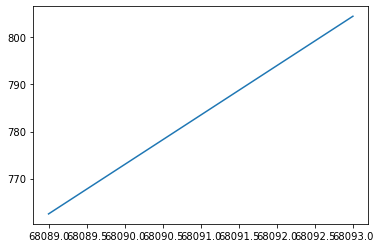

In [ ]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[1], bangryu.iloc[total[1], 0])
plt.show()

# 강화대교 조위 결측치 처리

In [ ]:
gangwha = data[['날짜', '강화대교_조위']]

In [ ]:
gangwha.날짜 = pd.to_datetime(gangwha.날짜)
gangwha

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\4062866498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangwha.날짜 = pd.to_datetime(gangwha.날짜)


,날짜,강화대교_조위
0,2012-05-01 00:00:00,445.0
1,2012-05-01 00:10:00,449.0
2,2012-05-01 00:20:00,451.0
3,2012-05-01 00:30:00,452.0
4,2012-05-01 00:40:00,450.0
...,...,...
276331,2022-07-18 23:10:00,510.0
276332,2022-07-18 23:20:00,492.0
276333,2022-07-18 23:30:00,475.0
276334,2022-07-18 23:40:00,458.0


In [ ]:
gangwha[gangwha['강화대교_조위'].isnull()]   # 4927개의 결측치 : 순서대로 채우기

,날짜,강화대교_조위
193,2012-05-02 08:10:00,NaN
307,2012-05-03 03:10:00,NaN
1359,2012-05-10 10:30:00,NaN
1377,2012-05-10 13:30:00,NaN
1378,2012-05-10 13:40:00,NaN
...,...,...
267172,2022-05-16 08:40:00,NaN
270004,2022-06-05 00:40:00,NaN
270383,2022-06-07 15:50:00,NaN
272504,2022-06-22 09:20:00,NaN


In [ ]:
nan_index = list(gangwha[gangwha['강화대교_조위'].isnull()].index)

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-2:])
nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

gangwha_interpolate = gangwha.copy()
gangwha_interpolate = gangwha_interpolate.set_index('날짜')
gangwha_interpolate = gangwha_interpolate.iloc[index_interpolate_, :]
gangwha_interpolate

,강화대교_조위
날짜,
2012-05-02 08:00:00,139.0
2012-05-02 08:10:00,NaN
2012-05-02 08:20:00,124.0
2012-05-03 03:00:00,555.0
2012-05-03 03:10:00,NaN
...,...
2022-06-22 09:20:00,NaN
2022-06-22 09:30:00,347.0
2022-07-04 13:30:00,291.0


In [ ]:
# 보간

gangwha_interpolate.interpolate(method='time', inplace=True)
gangwha_interpolate   # 보간 결과 확인

,강화대교_조위
날짜,
2012-05-02 08:00:00,139.0
2012-05-02 08:10:00,131.5
2012-05-02 08:20:00,124.0
2012-05-03 03:00:00,555.0
2012-05-03 03:10:00,555.5
...,...
2022-06-22 09:20:00,328.0
2022-06-22 09:30:00,347.0
2022-07-04 13:30:00,291.0


In [ ]:
gangwha_interpolate.isnull().sum()

강화대교_조위    0
dtype: int64

In [ ]:
gangwha = gangwha.set_index('날짜')
gangwha.loc[gangwha_interpolate.index] = gangwha_interpolate
gangwha.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

강화대교_조위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

1377

In [ ]:
gangwha

,강화대교_조위
날짜,
2012-05-01 00:00:00,445.0
2012-05-01 00:10:00,449.0
2012-05-01 00:20:00,451.0
2012-05-01 00:30:00,452.0
2012-05-01 00:40:00,450.0
...,...
2022-07-18 23:10:00,510.0
2022-07-18 23:20:00,492.0
2022-07-18 23:30:00,475.0


In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
temp = index_sarima[-6:]
#print(temp)
total.append(temp)
print(total)

[[1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 15

In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
# 1일, 즉 직전 144 row를 반영하여 결측치 처리

for range in total[:-2]:
  start = range[0]
  model = pm.auto_arima(gangwha[start-60:start], seasonal=True)
  gangwha.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [ ]:
for range in [total[-2]]:
  start = range[0]
  model = pm.auto_arima(gangwha[start-4032:start], seasonal=True)
  gangwha.iloc[range, 0] = model.predict(len(range))

In [ ]:
for range in [total[-1]]:
  start = range[0]
  model = pm.auto_arima(gangwha[start-60:start], seasonal=True)
  gangwha.iloc[range, 0] = model.predict(len(range))

In [ ]:
# 결측치가 모두 처리되었는지 확인

gangwha.isnull().sum()

강화대교_조위    0
dtype: int64

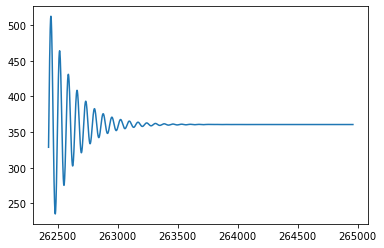

In [ ]:
# 결측치 처리 형태 확인 (일곱 번째 구간)

plt.plot(total[-2], gangwha.iloc[total[-2], 0])
plt.show()

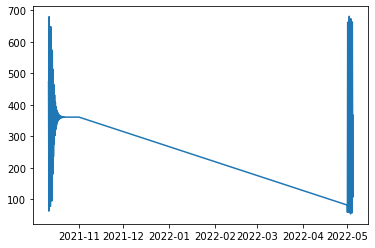

In [ ]:
plt.plot(gangwha[262000:265500])

# 청담대교 유량 결측치 처리

In [ ]:
chungdam = data[['날짜', '청담대교_유량']]

In [ ]:
chungdam.날짜 = pd.to_datetime(chungdam.날짜)
chungdam

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\1174405392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chungdam.날짜 = pd.to_datetime(chungdam.날짜)


,날짜,청담대교_유량
0,2012-05-01 00:00:00,469.05
1,2012-05-01 00:10:00,498.00
2,2012-05-01 00:20:00,490.68
3,2012-05-01 00:30:00,476.21
4,2012-05-01 00:40:00,476.21
...,...,...
276331,2022-07-18 23:10:00,319.84
276332,2022-07-18 23:20:00,314.01
276333,2022-07-18 23:30:00,387.55
276334,2022-07-18 23:40:00,454.91


In [ ]:
chungdam[chungdam['청담대교_유량'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,청담대교_유량
80994,2015-05-11 11:00:00,NaN
80995,2015-05-11 11:10:00,NaN
80996,2015-05-11 11:20:00,NaN
80997,2015-05-11 11:30:00,NaN
80998,2015-05-11 11:40:00,NaN
...,...,...
273775,2022-07-01 05:10:00,NaN
273776,2022-07-01 05:20:00,NaN
273777,2022-07-01 05:30:00,NaN
273778,2022-07-01 05:40:00,NaN


In [ ]:
nan_index = list(chungdam[chungdam['청담대교_유량'].isnull()].index)

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_sarima.extend(nan_index[-2:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

chungdam_interpolate = chungdam.copy()
chungdam_interpolate = chungdam_interpolate.set_index('날짜')
chungdam_interpolate = chungdam_interpolate.iloc[index_interpolate_, :]
chungdam_interpolate

,청담대교_유량
날짜,
2015-05-26 07:30:00,243.29
2015-05-26 07:40:00,NaN
2015-05-26 07:50:00,243.29
2015-05-26 07:50:00,243.29
2015-05-26 08:00:00,NaN
...,...
2022-06-21 10:10:00,NaN
2022-06-21 10:20:00,243.29
2022-06-21 10:20:00,243.29


In [ ]:
# 보간

chungdam_interpolate.interpolate(method='time', inplace=True)
chungdam_interpolate   # 보간 결과 확인

,청담대교_유량
날짜,
2015-05-26 07:30:00,243.29
2015-05-26 07:40:00,243.29
2015-05-26 07:50:00,243.29
2015-05-26 07:50:00,243.29
2015-05-26 08:00:00,243.29
...,...
2022-06-21 10:10:00,243.29
2022-06-21 10:20:00,243.29
2022-06-21 10:20:00,243.29


In [ ]:
chungdam_interpolate.isnull().sum()

청담대교_유량    0
dtype: int64

In [ ]:
chungdam = chungdam.set_index('날짜')
chungdam.loc[chungdam_interpolate.index] = chungdam_interpolate
chungdam.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

청담대교_유량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

80994

In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[80994, 80995, 80996, 80997, 80998, 80999, 81000, 81001, 81002, 81003, 81004, 81005, 81006, 81007], [83021, 83022], [83138, 83139], [83141, 83142, 83143, 83144], [83146, 83147, 83148], [83151, 83152, 83153, 83154], [83156, 83157, 83158, 83159, 83160, 83161, 83162, 83163, 83164, 83165, 83166, 83167, 83168, 83169, 83170, 83171, 83172, 83173, 83174, 83175], [83228, 83229, 83230, 83231], [83237, 83238, 83239, 83240], [83248, 83249, 83250, 83251, 83252, 83253, 83254, 83255], [83259, 83260, 83261, 83262, 83263, 83264, 83265, 83266, 83267, 83268, 83269, 83270, 83271, 83272, 83273, 83274, 83275, 83276, 83277, 83278, 83279, 83280, 83281, 83282, 83283, 83284, 83285, 83286, 83287, 83288, 83289, 83290, 83291, 83292, 83293, 83294, 83295, 83296, 83297, 83298, 83299, 83300, 83301, 83302, 83303, 83304, 83305, 83306, 83307, 83308, 83309], [83311, 83312, 83313, 83314, 83315, 83316, 83317, 83318, 83319, 83320, 83321, 83322, 83323, 83324, 83325, 83326, 83327, 83328, 83329, 83330, 83331, 83332, 83333, 833

In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
len(total) #결측치 처리해야 하는 구간의 수

586

In [ ]:
# 전체 다 1일, 즉 직전 144개의 row을 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(chungdam[start-60:start], seasonal=True)
  chungdam.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,0,1)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper

In [ ]:
# 결측치가 모두 처리되었는지 확인

chungdam.isnull().sum()

청담대교_유량    0
dtype: int64

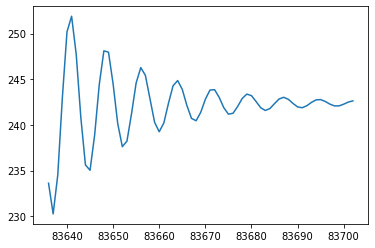

In [ ]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[13], chungdam.iloc[total[13], 0])
plt.show()

In [ ]:
#total[13] #여기서 i번째 구간 범위 찻아서 아래에 좀 더 넓게 대입

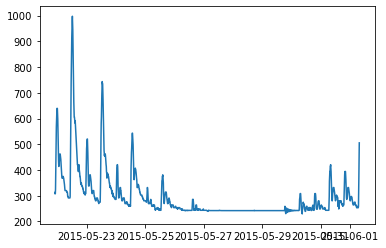

In [ ]:
plt.plot(chungdam[82500:84000])

# 한강대교 유량 결측치 처리

In [ ]:
hangang = data[['날짜', '한강대교_유량']]

In [ ]:
hangang.날짜 = pd.to_datetime(hangang.날짜)
hangang

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\2676308309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hangang.날짜 = pd.to_datetime(hangang.날짜)


,날짜,한강대교_유량
0,2012-05-01 00:00:00,729.80
1,2012-05-01 00:10:00,731.48
2,2012-05-01 00:20:00,726.42
3,2012-05-01 00:30:00,726.42
4,2012-05-01 00:40:00,707.17
...,...,...
276331,2022-07-18 23:10:00,-456.41
276332,2022-07-18 23:20:00,-717.30
276333,2022-07-18 23:30:00,-843.37
276334,2022-07-18 23:40:00,-1023.37


In [ ]:
hangang[hangang['한강대교_유량'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,한강대교_유량
91352,2015-07-22 09:20:00,NaN
91353,2015-07-22 09:30:00,NaN
91354,2015-07-22 09:40:00,NaN
91355,2015-07-22 09:50:00,NaN
91356,2015-07-22 10:00:00,NaN
...,...,...
262130,2021-10-12 08:20:00,NaN
262131,2021-10-12 08:30:00,NaN
262132,2021-10-12 08:40:00,NaN
262133,2021-10-12 08:50:00,NaN


In [ ]:
nan_index = list(hangang[hangang['한강대교_유량'].isnull()].index)

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_sarima.extend(nan_index[-2:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

hangang_interpolate = hangang.copy()
hangang_interpolate = hangang_interpolate.set_index('날짜')
hangang_interpolate = hangang_interpolate.iloc[index_interpolate_, :]
hangang_interpolate

,한강대교_유량
날짜,
2020-10-15 10:30:00,473.29
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,505.24


In [ ]:
# 보간

hangang_interpolate.interpolate(method='time', inplace=True)
hangang_interpolate   # 보간 결과 확인

,한강대교_유량
날짜,
2020-10-15 10:30:00,473.290
2020-10-15 10:40:00,489.265
2020-10-15 10:50:00,505.240


In [ ]:
hangang_interpolate.isnull().sum()

한강대교_유량    0
dtype: int64

In [ ]:
hangang = hangang.set_index('날짜')
hangang.loc[hangang_interpolate.index] = hangang_interpolate
hangang.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

한강대교_유량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

91352

In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[91352, 91353, 91354, 91355, 91356, 91357, 91358, 91359, 91360, 91361, 91362, 91363, 91364, 91365, 91366, 91367, 91368, 91369, 91370, 91371, 91372], [91377, 91378, 91379, 91380, 91381, 91382, 91383, 91384, 91385, 91386, 91387, 91388, 91389, 91390, 91391, 91392, 91393, 91394, 91395, 91396, 91397, 91398, 91399, 91400, 91401, 91402, 91403, 91404, 91405, 91406, 91407, 91408, 91409, 91410, 91411, 91412, 91413, 91414, 91415, 91416, 91417, 91418, 91419, 91420, 91421, 91422, 91423, 91424, 91425, 91426, 91427, 91428, 91429, 91430, 91431, 91432, 91433, 91434, 91435, 91436, 91437, 91438, 91439, 91440, 91441, 91442, 91443, 91444, 91445, 91446, 91447, 91448, 91449, 91450, 91451, 91452, 91453, 91454, 91455, 91456, 91457, 91458, 91459, 91460, 91461, 91462, 91463, 91464, 91465, 91466, 91467, 91468, 91469, 91470, 91471, 91472, 91473, 91474, 91475, 91476, 91477, 91478, 91479, 91480, 91481, 91482, 91483, 91484, 91485, 91486, 91487, 91488, 91489, 91490, 91491, 91492, 91493, 91494, 91495, 91496, 91497, 91

In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
len(total) #결측치 처리해야 하는 구간의 수

14

In [ ]:
# 전체 다 조위 cycle(28일, 즉 직전 144*28=4032개의 row)을 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(hangang[start-60:start], seasonal=True)
  hangang.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [ ]:
# 결측치가 모두 처리되었는지 확인

hangang.isnull().sum()

한강대교_유량    0
dtype: int64

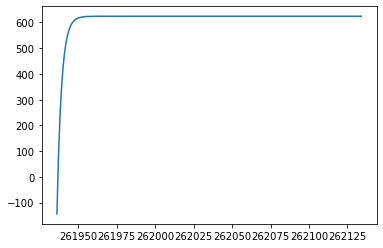

In [ ]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[13], hangang.iloc[total[13], 0])
plt.show()

# 행주대교 유량 결측치 처리

In [ ]:
haengju = data[['날짜', '행주대교_유량']]

In [ ]:
haengju.날짜 = pd.to_datetime(haengju.날짜)
haengju

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\3631846245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haengju.날짜 = pd.to_datetime(haengju.날짜)


,날짜,행주대교_유량
0,2012-05-01 00:00:00,540.18
1,2012-05-01 00:10:00,540.18
2,2012-05-01 00:20:00,540.18
3,2012-05-01 00:30:00,552.17
4,2012-05-01 00:40:00,564.29
...,...,...
276331,2022-07-18 23:10:00,974.40
276332,2022-07-18 23:20:00,1006.88
276333,2022-07-18 23:30:00,1039.90
276334,2022-07-18 23:40:00,1073.46


In [ ]:
haengju[haengju['행주대교_유량'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,행주대교_유량
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [ ]:
nan_index = list(haengju[haengju['행주대교_유량'].isnull()].index)

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

haengju_interpolate = haengju.copy()
haengju_interpolate = haengju_interpolate.set_index('날짜')
haengju_interpolate = haengju_interpolate.iloc[index_interpolate_, :]
haengju_interpolate

,행주대교_유량
날짜,
2020-10-15 10:30:00,762.23
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,734.09


In [ ]:
# 보간

haengju_interpolate.interpolate(method='time', inplace=True)
haengju_interpolate   # 보간 결과 확인

,행주대교_유량
날짜,
2020-10-15 10:30:00,762.23
2020-10-15 10:40:00,748.16
2020-10-15 10:50:00,734.09


In [ ]:
haengju_interpolate.isnull().sum()

행주대교_유량    0
dtype: int64

In [ ]:
haengju = haengju.set_index('날짜')
haengju.loc[haengju_interpolate.index] = haengju_interpolate
haengju.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

행주대교_유량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

140613

In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [ ]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(haengju[start-144:start], seasonal=True)
  haengju.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [ ]:
# 결측치가 모두 처리되었는지 확인

haengju.isnull().sum()

행주대교_유량    0
dtype: int64

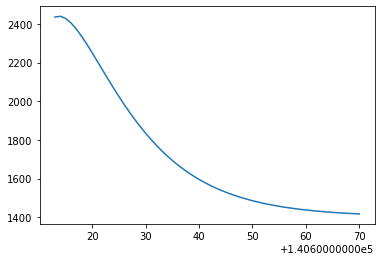

In [ ]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[0], haengju.iloc[total[0], 0])
plt.show()

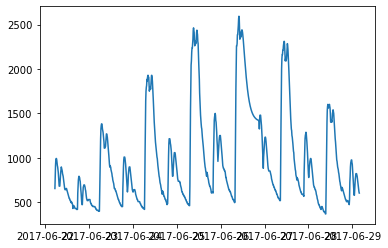

In [ ]:
plt.plot(haengju[140000:141000])

# 청담대교 수위 결측치 처리

In [ ]:
청담 = data[['날짜', '청담대교_수위']]

In [ ]:
청담.날짜 = pd.to_datetime(청담.날짜)
청담

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\2565458255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  청담.날짜 = pd.to_datetime(청담.날짜)


,날짜,청담대교_수위
0,2012-05-01 00:00:00,310.7
1,2012-05-01 00:10:00,314.7
2,2012-05-01 00:20:00,313.7
3,2012-05-01 00:30:00,311.7
4,2012-05-01 00:40:00,311.7
...,...,...
276331,2022-07-18 23:10:00,0.0
276332,2022-07-18 23:20:00,0.0
276333,2022-07-18 23:30:00,0.0
276334,2022-07-18 23:40:00,0.0


In [ ]:
청담[청담['청담대교_수위'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,청담대교_수위
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [ ]:
nan_index = list(청담[청담['청담대교_수위'].isnull()].index)

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

청담_보간 = 청담.copy()
청담_보간 = 청담_보간.set_index('날짜')
청담_보간 = 청담_보간.iloc[index_interpolate_, :]
청담_보간

,청담대교_수위
날짜,
2020-10-15 10:30:00,317.7
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,314.7


In [ ]:
# 보간

청담_보간.interpolate(method='time', inplace=True)
청담_보간   # 보간 결과 확인

,청담대교_수위
날짜,
2020-10-15 10:30:00,317.7
2020-10-15 10:40:00,316.2
2020-10-15 10:50:00,314.7


In [ ]:
청담_보간.isnull().sum()

청담대교_수위    0
dtype: int64

In [ ]:
청담.loc[청담_보간.index] = 청담_보간
청담.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

청담대교_수위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

140613

In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [ ]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(청담[start-65:start], seasonal=True)
  청담.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [ ]:
# 결측치가 모두 처리되었는지 확인

청담.isnull().sum()

청담대교_수위    0
dtype: int64

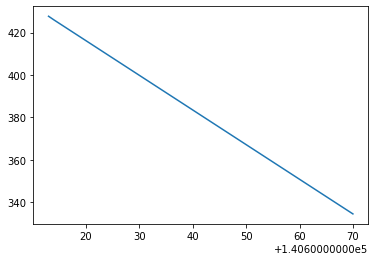

In [ ]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[0], 청담.iloc[total[0], 0])
plt.show()

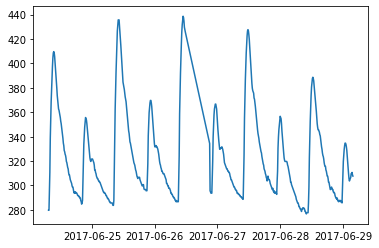

In [ ]:
plt.plot(청담[140300:141000])
#plt.plot(청담[140820:140960])

# 잠수교 수위 결측치 처리

In [ ]:
잠수 = data[['날짜', '잠수교_수위']]

In [ ]:
잠수.날짜 = pd.to_datetime(잠수.날짜)
잠수

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\3140268960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  잠수.날짜 = pd.to_datetime(잠수.날짜)


,날짜,잠수교_수위
0,2012-05-01 00:00:00,300.2
1,2012-05-01 00:10:00,300.2
2,2012-05-01 00:20:00,301.2
3,2012-05-01 00:30:00,301.2
4,2012-05-01 00:40:00,301.2
...,...,...
276331,2022-07-18 23:10:00,0.0
276332,2022-07-18 23:20:00,0.0
276333,2022-07-18 23:30:00,0.0
276334,2022-07-18 23:40:00,0.0


In [ ]:
잠수[잠수['잠수교_수위'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,잠수교_수위
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [ ]:
nan_index = list(잠수[잠수['잠수교_수위'].isnull()].index)

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

잠수_보간 = 잠수.copy()
잠수_보간 = 잠수_보간.set_index('날짜')
잠수_보간 = 잠수_보간.iloc[index_interpolate_, :]
잠수_보간

,잠수교_수위
날짜,
2020-10-15 10:30:00,330.2
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,326.2


In [ ]:
# 보간

잠수_보간.interpolate(method='time', inplace=True)
잠수_보간   # 보간 결과 확인

,잠수교_수위
날짜,
2020-10-15 10:30:00,330.2
2020-10-15 10:40:00,328.2
2020-10-15 10:50:00,326.2


In [ ]:
잠수_보간.isnull().sum()

잠수교_수위    0
dtype: int64

In [ ]:
잠수 = 잠수.set_index('날짜')
잠수.loc[잠수_보간.index] = 잠수_보간
잠수.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

잠수교_수위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

140613

In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [ ]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(잠수[start-150:start], seasonal=True)
  잠수.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [ ]:
# 결측치가 모두 처리되었는지 확인

잠수.isnull().sum()

잠수교_수위    0
dtype: int64

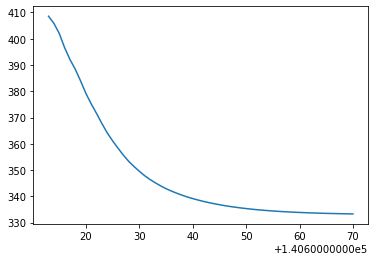

In [ ]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[0], 잠수.iloc[total[0], 0])
plt.show()

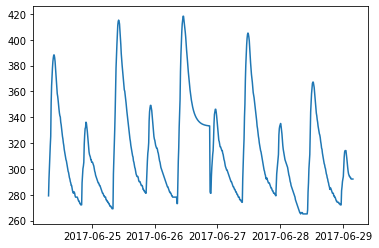

In [ ]:
plt.plot(잠수[140300:141000])

# 한강대교 수위 결측치 처리

In [ ]:
한강 = data[['날짜', '한강대교_수위']]

In [ ]:
한강.날짜 = pd.to_datetime(한강.날짜)
한강

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\2998615949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  한강.날짜 = pd.to_datetime(한강.날짜)


,날짜,한강대교_수위
0,2012-05-01 00:00:00,290.0
1,2012-05-01 00:10:00,290.0
2,2012-05-01 00:20:00,290.0
3,2012-05-01 00:30:00,290.0
4,2012-05-01 00:40:00,291.0
...,...,...
276331,2022-07-18 23:10:00,0.0
276332,2022-07-18 23:20:00,0.0
276333,2022-07-18 23:30:00,0.0
276334,2022-07-18 23:40:00,0.0


In [ ]:
한강[한강['한강대교_수위'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,한강대교_수위
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [ ]:
nan_index = list(한강[한강['한강대교_수위'].isnull()].index)

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

한강_보간 = 한강.copy()
한강_보간 = 한강_보간.set_index('날짜')
한강_보간 = 한강_보간.iloc[index_interpolate_, :]
한강_보간

,한강대교_수위
날짜,
2020-10-15 10:30:00,312.0
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,308.0


In [ ]:
# 보간

한강_보간.interpolate(method='time', inplace=True)
한강_보간   # 보간 결과 확인

,한강대교_수위
날짜,
2020-10-15 10:30:00,312.0
2020-10-15 10:40:00,310.0
2020-10-15 10:50:00,308.0


In [ ]:
한강_보간.isnull().sum()

한강대교_수위    0
dtype: int64

In [ ]:
한강 = 한강.set_index('날짜')
한강.loc[한강_보간.index] = 한강_보간
한강.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

한강대교_수위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

140613

In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [ ]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(한강[start-72:start], seasonal=True)
  한강.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [ ]:
# 결측치가 모두 처리되었는지 확인

한강.isnull().sum()

한강대교_수위    0
dtype: int64

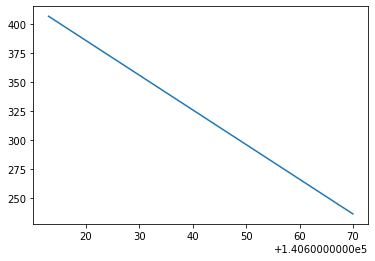

In [ ]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[0], 한강.iloc[total[0], 0])
plt.show()

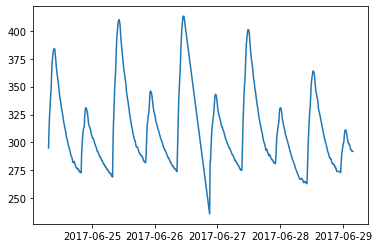

In [ ]:
plt.plot(한강[140300:141000])

# 행주대교 수위 결측치 처리

In [ ]:
행주 = data[['날짜', '행주대교_수위']]

In [ ]:
행주.날짜 = pd.to_datetime(행주.날짜)
행주

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\232517616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  행주.날짜 = pd.to_datetime(행주.날짜)


,날짜,행주대교_수위
0,2012-05-01 00:00:00,275.3
1,2012-05-01 00:10:00,275.3
2,2012-05-01 00:20:00,275.3
3,2012-05-01 00:30:00,276.3
4,2012-05-01 00:40:00,277.3
...,...,...
276331,2022-07-18 23:10:00,0.0
276332,2022-07-18 23:20:00,0.0
276333,2022-07-18 23:30:00,0.0
276334,2022-07-18 23:40:00,0.0


In [ ]:
행주[행주['행주대교_수위'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,행주대교_수위
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [ ]:
nan_index = list(행주[행주['행주대교_수위'].isnull()].index)

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

행주_보간 = 행주.copy()
행주_보간 = 행주_보간.set_index('날짜')
행주_보간 = 행주_보간.iloc[index_interpolate_, :]
행주_보간

,행주대교_수위
날짜,
2020-10-15 10:30:00,292.3
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,290.3


In [ ]:
# 보간

행주_보간.interpolate(method='time', inplace=True)
행주_보간   # 보간 결과 확인

,행주대교_수위
날짜,
2020-10-15 10:30:00,292.3
2020-10-15 10:40:00,291.3
2020-10-15 10:50:00,290.3


In [ ]:
행주_보간.isnull().sum()

행주대교_수위    0
dtype: int64

In [ ]:
행주 = 행주.set_index('날짜')
행주.loc[행주_보간.index] = 행주_보간
행주.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

행주대교_수위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

140613

In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [ ]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(행주[start-388:start], seasonal=True)
  행주.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [ ]:
# 결측치가 모두 처리되었는지 확인

행주.isnull().sum()

행주대교_수위    0
dtype: int64

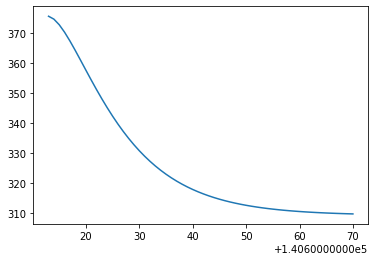

In [ ]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[0], 행주.iloc[total[0], 0])
plt.show()

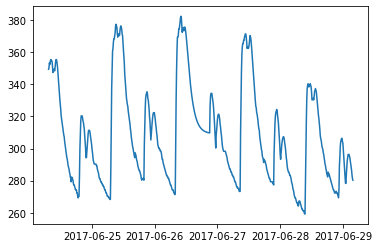

In [ ]:
plt.plot(행주[140300:141000])

# < Chapter 2.5 >rawdata_arima, newdata 생성

In [ ]:
# chapter 1에서 수집한 외부데이터를 csv파일로 변환 후, raw data에 합치는 과정을 진행하였음.


In [ ]:
광진교_수위 = pd.read_csv('data/외부데이터/광진교_수위.csv', encoding = 'cp949')
광진교_수위.날짜 = pd.to_datetime(광진교_수위.날짜)
광진교_수위 = 광진교_수위.set_index('날짜')
광진교_수위

C:\Users\sjkan\AppData\Local\Temp\ipykernel_11972\1099726902.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  광진교_수위 = pd.read_csv('data/외부데이터/광진교_수위.csv', encoding = 'cp949')


,광진교_수위
날짜,
2012-05-01 00:00:00,1.2
2012-05-01 00:10:00,1.2
2012-05-01 00:20:00,1.2
2012-05-01 00:30:00,1.2
2012-05-01 00:40:00,1.2
...,...
2022-07-18 23:10:00,1.12
2022-07-18 23:20:00,1.12
2022-07-18 23:30:00,1.12


# 광진교 수위 결측치 처리

In [ ]:
# 광진교 수위 결측치 처리 역시 1차 결측치 처리와 동일한 방법으로 진행함.

In [ ]:
광진 = 광진교_수위.reset_index()
광진

,날짜,광진교_수위
0,2012-05-01 00:00:00,1.2
1,2012-05-01 00:10:00,1.2
2,2012-05-01 00:20:00,1.2
3,2012-05-01 00:30:00,1.2
4,2012-05-01 00:40:00,1.2
...,...,...
276331,2022-07-18 23:10:00,1.12
276332,2022-07-18 23:20:00,1.12
276333,2022-07-18 23:30:00,1.12
276334,2022-07-18 23:40:00,1.12


In [ ]:
idx = 광진[광진['광진교_수위'] == '-']['광진교_수위'].index
idx

Int64Index([140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620,
            140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628,
            140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636,
            140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644,
            140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652,
            140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660,
            140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668,
            140669, 140670, 236080],
           dtype='int64')

In [ ]:
import numpy as np
for i in idx:
    광진.loc[i,'광진교_수위']=np.NaN
광진

,날짜,광진교_수위
0,2012-05-01 00:00:00,1.2
1,2012-05-01 00:10:00,1.2
2,2012-05-01 00:20:00,1.2
3,2012-05-01 00:30:00,1.2
4,2012-05-01 00:40:00,1.2
...,...,...
276331,2022-07-18 23:10:00,1.12
276332,2022-07-18 23:20:00,1.12
276333,2022-07-18 23:30:00,1.12
276334,2022-07-18 23:40:00,1.12


In [ ]:
광진[광진['광진교_수위'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,광진교_수위
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [ ]:
nan_index = idx

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-1:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

광진_보간 = 광진.copy()
광진_보간 = 광진_보간.set_index('날짜')
광진_보간 = 광진_보간.iloc[index_interpolate_, :]
광진_보간

,광진교_수위
날짜,
2020-10-15 10:30:00,1.07
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,1.07


In [ ]:
# 보간

광진_보간.iloc[1]=1.07
광진_보간   # 보간 결과 확인

,광진교_수위
날짜,
2020-10-15 10:30:00,1.07
2020-10-15 10:40:00,1.07
2020-10-15 10:50:00,1.07


In [ ]:
광진_보간.isnull().sum()

광진교_수위    0
dtype: int64

In [ ]:
광진 = 광진.set_index('날짜')
광진.loc[광진_보간.index] = 광진_보간
광진.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

광진교_수위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

140613

In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      #print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
len(total) #결측치 처리해야 하는 구간의 수

1

In [ ]:
# 전체 다 1일, 즉 직전 144개의 row를 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(광진[start-72:start], seasonal=True)
  광진.iloc[range, 0] = model.predict(len(range))
  #print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [ ]:
# 결측치가 모두 처리되었는지 확인

광진.isnull().sum()

광진교_수위    0
dtype: int64

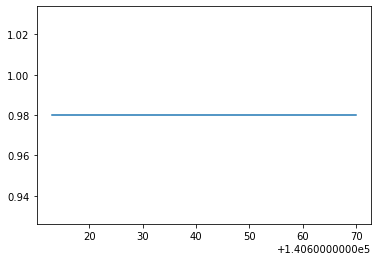

In [ ]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(range, 광진.iloc[range, 0])
plt.show()

In [ ]:
광진 = 광진.reset_index()
광진.날짜 = pd.to_datetime(광진.날짜)
광진 = 광진.set_index('날짜')
광진

,광진교_수위
날짜,
2012-05-01 00:00:00,1.2
2012-05-01 00:10:00,1.2
2012-05-01 00:20:00,1.2
2012-05-01 00:30:00,1.2
2012-05-01 00:40:00,1.2
...,...
2022-07-18 23:10:00,1.12
2022-07-18 23:20:00,1.12
2022-07-18 23:30:00,1.12


In [ ]:
서울시강수량 = pd.read_csv('data/외부데이터/서울시강수량.csv', usecols=[1])
서울시강수량 = pd.concat([data['날짜'], 서울시강수량], axis = 1)
서울시강수량.날짜 = pd.to_datetime(서울시강수량.날짜)
서울시강수량 = 서울시강수량.set_index('날짜')
서울시강수량

,강수량(mm)
날짜,
2012-05-01 00:00:00,0.0
2012-05-01 00:10:00,0.0
2012-05-01 00:20:00,0.0
2012-05-01 00:30:00,0.0
2012-05-01 00:40:00,0.0
...,...
2022-07-18 23:10:00,0.0
2022-07-18 23:20:00,0.0
2022-07-18 23:30:00,0.0


In [ ]:
data = pd.read_csv('data/rawdata.csv')
data.날짜 = pd.to_datetime(data.날짜)
data2 = data.set_index('날짜')
rawdata_arima = pd.concat([서울시강수량,bangryu,gangwha,chungdam,hangang,haengju,청담,잠수,한강,행주,광진], ignore_index = True, axis = 1)
rawdata_arima.columns = ['강수량(mm)','방류량','강화대교_조위','청담대교_유량','한강대교_유량','행주대교_유량','청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위','광진교_수위']
rawdata_arima = rawdata_arima.reset_index()
rawdata_arima

,날짜,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,광진교_수위
0,2012-05-01 00:00:00,0.0,555.00,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,1.2
1,2012-05-01 00:10:00,0.0,562.90,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,1.2
2,2012-05-01 00:20:00,0.0,576.40,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,1.2
3,2012-05-01 00:30:00,0.0,563.10,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,1.2
4,2012-05-01 00:40:00,0.0,576.40,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10:00,0.0,259.23,510.0,319.84,-456.41,974.40,0.0,0.0,0.0,0.0,1.12
276332,2022-07-18 23:20:00,0.0,260.46,492.0,314.01,-717.30,1006.88,0.0,0.0,0.0,0.0,1.12
276333,2022-07-18 23:30:00,0.0,259.37,475.0,387.55,-843.37,1039.90,0.0,0.0,0.0,0.0,1.12
276334,2022-07-18 23:40:00,0.0,259.13,458.0,454.91,-1023.37,1073.46,0.0,0.0,0.0,0.0,1.12


In [ ]:
rawdata_arima.isnull().sum()

날짜         0
강수량(mm)    0
방류량        0
강화대교_조위    0
청담대교_유량    0
한강대교_유량    0
행주대교_유량    0
청담대교_수위    0
잠수교_수위     0
한강대교_수위    0
행주대교_수위    0
광진교_수위     0
dtype: int64

In [ ]:
rawdata_arima.to_csv('data/rawdata_arima.csv', encoding = 'cp949')

In [ ]:
수위 = pd.read_csv('data/외부데이터/y_test.csv', encoding = 'cp949')
수위.날짜 = pd.to_datetime(수위.날짜)
수위['청담대교_수위'] = 수위['청담대교_수위'] * 100
수위['잠수교_수위'] = 수위['잠수교_수위'] * 100
수위['한강대교_수위'] = 수위['한강대교_수위'] * 100
수위['행주대교_수위'] = 수위['행주대교_수위'] * 100
수위

,날짜,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2022-06-01 00:00:00,279.0,276.0,274.0,269.0
1,2022-06-01 00:10:00,281.0,277.0,274.0,267.0
2,2022-06-01 00:20:00,284.0,277.0,274.0,264.0
3,2022-06-01 00:30:00,285.0,277.0,274.0,261.0
4,2022-06-01 00:40:00,284.0,278.0,274.0,259.0
...,...,...,...,...,...
6907,2022-07-18 23:10:00,288.0,295.0,299.0,306.0
6908,2022-07-18 23:20:00,287.0,303.0,304.0,308.0
6909,2022-07-18 23:30:00,299.0,307.0,309.0,310.0
6910,2022-07-18 23:40:00,309.0,311.0,314.0,312.0


In [ ]:
수위2 = pd.concat([rawdata_arima[['날짜','청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']][:-6912],수위], ignore_index=True, axis = 0)
수위2

,날짜,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00:00,310.7,300.2,290.0,275.3
1,2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2,2012-05-01 00:20:00,313.7,301.2,290.0,275.3
3,2012-05-01 00:30:00,311.7,301.2,290.0,276.3
4,2012-05-01 00:40:00,311.7,301.2,291.0,277.3
...,...,...,...,...,...
276331,2022-07-18 23:10:00,288.0,295.0,299.0,306.0
276332,2022-07-18 23:20:00,287.0,303.0,304.0,308.0
276333,2022-07-18 23:30:00,299.0,307.0,309.0,310.0
276334,2022-07-18 23:40:00,309.0,311.0,314.0,312.0


In [ ]:
newdata = pd.concat([수위2['날짜'],rawdata_arima[['강수량(mm)','방류량','강화대교_조위','청담대교_유량','한강대교_유량','행주대교_유량','광진교_수위']],수위2[['청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']]], axis = 1)
newdata

,날짜,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,광진교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00:00,0.0,555.00,445.0,469.05,729.80,540.18,1.2,310.7,300.2,290.0,275.3
1,2012-05-01 00:10:00,0.0,562.90,449.0,498.00,731.48,540.18,1.2,314.7,300.2,290.0,275.3
2,2012-05-01 00:20:00,0.0,576.40,451.0,490.68,726.42,540.18,1.2,313.7,301.2,290.0,275.3
3,2012-05-01 00:30:00,0.0,563.10,452.0,476.21,726.42,552.17,1.2,311.7,301.2,290.0,276.3
4,2012-05-01 00:40:00,0.0,576.40,450.0,476.21,707.17,564.29,1.2,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10:00,0.0,259.23,510.0,319.84,-456.41,974.40,1.12,288.0,295.0,299.0,306.0
276332,2022-07-18 23:20:00,0.0,260.46,492.0,314.01,-717.30,1006.88,1.12,287.0,303.0,304.0,308.0
276333,2022-07-18 23:30:00,0.0,259.37,475.0,387.55,-843.37,1039.90,1.12,299.0,307.0,309.0,310.0
276334,2022-07-18 23:40:00,0.0,259.13,458.0,454.91,-1023.37,1073.46,1.12,309.0,311.0,314.0,312.0


In [ ]:
newdata.isnull().sum()

날짜         0
강수량(mm)    0
방류량        0
강화대교_조위    0
청담대교_유량    0
한강대교_유량    0
행주대교_유량    0
광진교_수위     0
청담대교_수위    0
잠수교_수위     0
한강대교_수위    0
행주대교_수위    0
dtype: int64

In [ ]:
newdata.to_csv('data/newdata.csv', encoding = 'cp949')

# 파생컬럼 생성 - 시간차 적용(강화대교_조위, 방류량)

In [ ]:
# 지리학적 특성에서 본다면 팔당댐에서 방류한 물은 동쪽에서 서쪽 방향으로 한강을 따라 서해로 빠져나가게 됨.
# 팔당댐에서 방류한 물이 강화대교와 한강 주요 대교에 도착하기 까지 걸리는 시간이 존재하기에, 이를 같은 시간선 상에서 보면 안된다고 판단하였음.
# 따라서 강화대교 조위 데이터를 뒤로 미뤄 시간차를 두었고, 시간차로 인해 공백이 발생하는 row를 처리하기 위해 4월 데이터를 수집하였음.
# 팔당댐 방류량 데이터도 강화대교와 마찬가지로 시간차를 두었고, 이를 위해 4월 데이터를 수집하였음.
# 데이터를 수집 후, 시간차를 적용하여 새로 만든 데이터를 파생컬럼으로 생성하여 새로운 독립변수 컬럼으로 추가함.

## 강화대교 조위

In [ ]:
newdata = pd.read_csv('data/newdata.csv', encoding = 'cp949')

In [ ]:
#시간차 적용을 위한 4월 데이터(조위df) 불러오기

from glob import glob

w_list = sorted(glob("data/외부데이터/강화대교_조위_4월 29,30일/*.csv"))
w_list

['data/외부데이터/강화대교_조위_4월 29,30일\\2012.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2013.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2014.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2015.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2016.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2017.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2018.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2019.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2020.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2021.csv',
 'data/외부데이터/강화대교_조위_4월 29,30일\\2022.csv']

In [ ]:
idx = [0]
for i in range(1430):
  if (i+1) % 10 == 0:
    idx.append(i+1)

idx2 = []
for i in range(12):
  idx2.append(i*144)

tmp3 = []

for i in range(11):
  a = pd.read_csv(w_list[i], encoding='cp949', usecols = [0,1])
  a = a[:1440]
  tmp3.append(a.iloc[idx].set_index(pd.Index(list(range(i+idx2[i],i+idx2[i]+144)))))

조위df = pd.concat([tmp3[0],tmp3[1],tmp3[2],tmp3[3],tmp3[4],tmp3[5],tmp3[6],tmp3[7],tmp3[8],tmp3[9],tmp3[10]])
조위df.columns = ['날짜', '강화대교_조위']

조위df[조위df['강화대교_조위']=='-']

,날짜,강화대교_조위
1435,2021-04-30 21:40,-
1591,2022-04-30 23:30,-


In [ ]:
조위df.loc[1435]['강화대교_조위'] = 544
조위df.loc[1591]['강화대교_조위'] = 143

In [ ]:
#다리별 시간차 계산

idx3 = []
for i in range(12):
  idx3.append(i*26496)

ttmp = []
for i in range(0, 144): 
  
  push_num = i
  
  tmp = []
  for j in range(11):
    if j != 10:
      tmp.append(pd.concat([조위df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:idx3[j+1]-push_num][['날짜','강화대교_조위']]], ignore_index=True))
    else:
      tmp.append(pd.concat([조위df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:-push_num][['날짜','강화대교_조위']]], ignore_index=True))

  push_result = pd.concat(
        [tmp[0],tmp[1],tmp[2],tmp[3],tmp[4],tmp[5],tmp[6],tmp[7],tmp[8],tmp[9],tmp[10]], ignore_index=True
    )

  mm = pd.concat([push_result[['강화대교_조위']],newdata[['청담대교_수위','잠수교_수위', '한강대교_수위', '행주대교_수위']]], axis=1)
  mm['강화대교_조위'] = mm['강화대교_조위'].astype(float, errors = 'raise')
  nn = mm[:269424]
  push_cor2 = nn.corr()
  
  #print(i, push_cor2.iloc[:,0][1]) #마지막 원소 변경 1,2,3,4
  #ttmp.append(push_cor2.iloc[:,0][1])

  #1번: 청담대교 24 0.31093762145783016    -> 24 0.31008707402679253
  #2번: 잠수교 23 0.3353496289111793       -> 23 0.3344169953069493
  #3번: 한강대교 23 0.34832966441668634    -> 23 0.3475333064344359
  #4번: 행주대교 20 0.3684983352127144     -> 20 0.36719794049834076
  #시간적 순서가 직관과 맞음

  #하나만 꼽으라면 23 -> 23
  print(i, push_cor2.sum()[0])
  ttmp.append(push_cor2.sum()[0])

0 1.0793507420482251
1 1.142769772213913
2 1.207660777137531
3 1.2752539712176643
4 1.345236529923926
5 1.4172370749299965
6 1.4908193478782708
7 1.5654839637324864
8 1.6406672037941137
9 1.7157399923912298
10 1.7900129482669476
11 1.8627475022821538
12 1.933160282339072
13 2.0004444887059534
14 2.063799705730097
15 2.1224452761312316
16 2.1756330682161225
17 2.2226675794356257
18 2.262935366395367
19 2.2959203127591588
20 2.321211253712258
21 2.338514135829233
22 2.3476507334440115
23 2.348566655685426
24 2.3413226398893885
25 2.326087688825877
26 2.3031254966090984
27 2.272772699848008
28 2.235422399841325
29 2.191516014513862
30 2.14154049825084
31 2.0860283150370043
32 2.0255464764909097
33 1.960685483800176
34 1.8920472600279667
35 1.8202534667851984
36 1.745937533799943
37 1.6697384671552342
38 1.5923030410379793
39 1.5142812921943307
40 1.4363211318140228
41 1.3590652079536314
42 1.2831477372662146
43 1.2091810862064023
44 1.1377383789579292
45 1.0693429064993567
46 1.0044559107

In [ ]:
#파일 저장

push_num = 23
  
tmp = []
for j in range(11):
  if j != 10:
    tmp.append(pd.concat([조위df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:idx3[j+1]-push_num][['날짜','강화대교_조위']]], ignore_index=True))
  else:
    tmp.append(pd.concat([조위df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:-push_num][['날짜','강화대교_조위']]], ignore_index=True))

push_result = pd.concat(
      [tmp[0],tmp[1],tmp[2],tmp[3],tmp[4],tmp[5],tmp[6],tmp[7],tmp[8],tmp[9],tmp[10]], ignore_index=True
)

mm = pd.concat([push_result[['강화대교_조위']],newdata[['청담대교_수위','잠수교_수위', '한강대교_수위', '행주대교_수위']]], axis=1)
mm['강화대교_조위'] = mm['강화대교_조위'].astype(float, errors = 'raise')
nn = mm[:269424]
push_cor2 = nn.corr()
push_cor2

,강화대교_조위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
강화대교_조위,1.000000,0.309298,0.334418,0.347528,0.357322
청담대교_수위,0.309298,1.000000,0.991150,0.990986,0.949497
잠수교_수위,0.334418,0.991150,1.000000,0.995218,0.957848
한강대교_수위,0.347528,0.990986,0.995218,1.000000,0.972335
행주대교_수위,0.357322,0.949497,0.957848,0.972335,1.000000


In [ ]:
result = push_result.강화대교_조위
result

0           193
1           199
2           207
3           215
4           226
          ...  
276331    407.0
276332    431.0
276333    453.0
276334    476.0
276335    499.0
Name: 강화대교_조위, Length: 276336, dtype: object

In [ ]:
result.to_csv("data/파생컬럼/강화대교_조위_시간차.csv", index = False, encoding = 'cp949', columns = ['강화대교_조위'])

## 방류량

In [ ]:
#시간차 적용을 위한 4월 데이터(조위df) 불러오기

from glob import glob

w_list = sorted(glob("data/외부데이터/팔당댐_4월 29,30일/*.csv"))
w_list

['data/외부데이터/팔당댐_4월 29,30일\\2012.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2013.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2014.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2015.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2016.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2017.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2018.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2019.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2020.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2021.csv',
 'data/외부데이터/팔당댐_4월 29,30일\\2022.csv']

In [ ]:
idx = [0]
for i in range(287):
  idx.append(i)

idx2 = []
for i in range(12):
  idx2.append(i*288)

tmp3 = []

for i in range(11):
  a = pd.read_csv(w_list[i], encoding='cp949', usecols = [0,3])
  tmp3.append(a.iloc[idx].set_index(pd.Index(list(range(i+idx2[i],i+idx2[i]+288)))))

팔당df = pd.concat([tmp3[0],tmp3[1],tmp3[2],tmp3[3],tmp3[4],tmp3[5],tmp3[6],tmp3[7],tmp3[8],tmp3[9],tmp3[10]])
팔당df.columns = ['날짜', '방류량']
팔당df

팔당df[팔당df['방류량']=='-']

,날짜,방류량
1087,2015-04-30 12:30,-
2115,2019-04-29 15:10,-
2988,2022-04-29 16:10,-


In [ ]:
팔당df.loc[1087]['방류량'] = 168.2
팔당df.loc[2115]['방류량'] = 368
팔당df.loc[2988]['방류량'] = 125.1

In [ ]:
idx3 = []
for i in range(12):
  idx3.append(i*26496)

ttmp = []
for i in range(0, 288): 
  
  push_num = i
  
  tmp = []
  for j in range(11):
    if j != 10:
      tmp.append(pd.concat([팔당df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:idx3[j+1]-push_num][['날짜','방류량']]], ignore_index=True))
    else:
      tmp.append(pd.concat([팔당df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:-push_num][['날짜','방류량']]], ignore_index=True))

  push_result = pd.concat(
        [tmp[0],tmp[1],tmp[2],tmp[3],tmp[4],tmp[5],tmp[6],tmp[7],tmp[8],tmp[9],tmp[10]], ignore_index=True
    )

  mm = pd.concat([push_result[['방류량']],newdata[['청담대교_수위','잠수교_수위', '한강대교_수위', '행주대교_수위']]], axis=1)
  mm['방류량'] = mm['방류량'].astype(float, errors = 'raise')
  nn = mm[:269424]
  push_cor2 = nn.corr()
  
  
  #print(i, push_cor2.iloc[:,0][2]) #마지막 원소 변경 1,2,3,4
  #ttmp.append(push_cor2.iloc[:,0][2])

  #1번: 청담대교 15 0.8970553300325268 -> 15 0.8970394478572508
  #2번: 잠수교   19 0.8748510916903229
  #3번: 한강대교 20 0.8635804208734675
  #4번: 행주대교 21 0.8088005740767352
  #시간적 순서가 직관과 맞음

  #하나만 꼽으라면 19
  print(i, push_cor2.sum()[0])
  ttmp.append(push_cor2.sum()[0])

0 4.4108680959312
1 4.411348784398636
2 4.414304579390693
3 4.417212705383015
4 4.420066329223367
5 4.422857733335674
6 4.425567071111318
7 4.428163344832547
8 4.430606932622472
9 4.432888100068218
10 4.435001917320518
11 4.4369055781979325
12 4.4385893371462215
13 4.440054385835812
14 4.441286630523859
15 4.44228696537453
16 4.443036272929255
17 4.443567496313968
18 4.443832048699757
19 4.443871479651424
20 4.443670094155962
21 4.443222230095935
22 4.44253882180466
23 4.441635466895465
24 4.440521916216472
25 4.439182487770576
26 4.437635459018186
27 4.435894834145289
28 4.433973219161103
29 4.431888392033015
30 4.429626979303972
31 4.4272070573558695
32 4.424637858873679
33 4.42194232435717
34 4.4191120653052565
35 4.416167515441033
36 4.413107771595901
37 4.4099428607937945
38 4.406686865308404
39 4.403347245530859
40 4.399935275545564
41 4.396440834609995
42 4.3928559010120605
43 4.389195112611445
44 4.385478899624395
45 4.381714381593982
46 4.377885951291808
47 4.373983883455815
4

In [ ]:
#파일 저장

push_num = 19
  
tmp = []
for j in range(11):
  if j != 10:
    tmp.append(pd.concat([팔당df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:idx3[j+1]-push_num][['날짜','방류량']]], ignore_index=True))
  else:
    tmp.append(pd.concat([팔당df[idx2[j+1]-push_num:idx2[j+1]],newdata[idx3[j]:-push_num][['날짜','방류량']]], ignore_index=True))

push_result = pd.concat(
      [tmp[0],tmp[1],tmp[2],tmp[3],tmp[4],tmp[5],tmp[6],tmp[7],tmp[8],tmp[9],tmp[10]], ignore_index=True
)

mm = pd.concat([push_result[['방류량']],newdata[['청담대교_수위','잠수교_수위', '한강대교_수위', '행주대교_수위']]], axis=1)
mm['방류량'] = mm['방류량'].astype(float, errors = 'raise')
nn = mm[:269424]
push_cor2 = nn.corr()
push_cor2

,방류량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
방류량,1.000000,0.896659,0.874879,0.863630,0.808704
청담대교_수위,0.896659,1.000000,0.991150,0.990986,0.949497
잠수교_수위,0.874879,0.991150,1.000000,0.995218,0.957848
한강대교_수위,0.863630,0.990986,0.995218,1.000000,0.972335
행주대교_수위,0.808704,0.949497,0.957848,0.972335,1.000000


In [ ]:
result = push_result.방류량
result

0          575.7
1          575.3
2          555.0
3          575.7
4          575.4
           ...  
276331    258.67
276332    258.58
276333    258.56
276334    258.65
276335    258.09
Name: 방류량, Length: 276336, dtype: object

In [ ]:
result.to_csv("data/파생컬럼/방류량_시간차.csv", index = False, encoding = 'cp949', columns = ['방류량'])



# < Chapter 3 >2차 결측치 처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

import time
from glob import glob
from tqdm import tqdm

import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras import backend as K
from keras.utils import plot_model

from keras.layers import Activation, Dense, LSTM, GRU, Bidirectional, AveragePooling1D, GlobalAveragePooling1D, Dropout, Flatten, BatchNormalization, TimeDistributed, Input, Reshape, RepeatVector, Concatenate, GlobalMaxPooling1D 
from keras.layers.convolutional import Conv1D, MaxPooling1D, AveragePooling1D

In [ ]:
# 1차 결측치 처리의 경우 전통적인 시계열 예측 기법을 활용하였지만, 기대와 다르게 좋은 성능을 보이지 못함.
# 더욱 정교한 결측치 처리의 필요성을 느꼈고, 딥러닝 모델을 활용하여 추가적으로 2차 결측치 처리를 진행하였음.

In [ ]:
# 2차 결측치 처리의 과정은 크기 수위 데이터의 결측치 처리와 수위 외 데이터의 결측치 처리로 구분할 수 있음.
# 외부 데이터 수집에서 test 기간동안의 수위 데이터의 수집할 수 있었고, 대회 규정 상 10분 이전의 데이터는 활용할 수 있기에 이를 독립변수로 활용하고자 했음.
# 따라서 2022-07-18까지의 수위 데이터를 독립변수로 활용한 raw data를 새롭게 만들었고, 이를 활용하여 2차 결측치 처리를 진행하였음.

In [ ]:
# 2차 결측치 처리 과정을 요약하자면, 앞서 말했듯이 수위 데이터를 독립변수로 활용하여 특정 컬럼의 결측치를 처리하는 것임.
# 먼저 수위 데이터를 독립변수로 쓰기 위해 수위 데이터의 결측치를 먼저 cnn/lstm 모델을 통해 처리하였음.
# 그런 다음 수위 데이터를 독립변수로 활용하여 행주대교 유량의 결측치를 동일한 모델을 통해 처리하고, 새롭게 만들어진 행주대교 컬럼을 기존 컬럼과 교체하여 새로운 데이터 셋으로 업데이트함.
# 새롭게 업데이트된 데이터 셋을 통해 같은 방식으로 다음 변수인 방류량을 예측하고, 2차 결측치 처리가 진행된 방류량 컬럼으로 새롭게 데이터셋을 업데이트함.
# 이와 같은 과정을 통해 모든 변수의 결측치를 처리하였음.

# 수위 결측치 처리 - CNN/LSTM

In [ ]:
강화대교_시간차 = pd.read_csv('data/파생컬럼/강화대교_조위_시간차.csv', encoding = 'cp949')

In [ ]:
방류량_시간차 = pd.read_csv('data/파생컬럼/방류량_시간차.csv', encoding = 'cp949')

In [ ]:
raw_data = pd.read_csv('data/newdata.csv', encoding = 'cp949')
rawdata_ = pd.concat([방류량_시간차, 강화대교_시간차, raw_data[['날짜','강수량(mm)','청담대교_유량','한강대교_유량','행주대교_유량','광진교_수위','청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']]], axis=1)
rawdata_.날짜 = pd.to_datetime(rawdata_.날짜)
raw_data = rawdata_.set_index('날짜')
raw_data

,방류량,강화대교_조위,강수량(mm),청담대교_유량,한강대교_유량,행주대교_유량,광진교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
날짜,,,,,,,,,,,
2012-05-01 00:00:00,575.70,193.0,0.0,469.05,729.80,540.18,1.20,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,575.30,199.0,0.0,498.00,731.48,540.18,1.20,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,555.00,207.0,0.0,490.68,726.42,540.18,1.20,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,575.70,215.0,0.0,476.21,726.42,552.17,1.20,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,575.40,226.0,0.0,476.21,707.17,564.29,1.20,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,258.67,407.0,0.0,319.84,-456.41,974.40,1.12,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,258.58,431.0,0.0,314.01,-717.30,1006.88,1.12,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,258.56,453.0,0.0,387.55,-843.37,1039.90,1.12,299.0,307.0,309.0,310.0


In [ ]:
raw_data.isnull().sum()

방류량        0
강화대교_조위    0
강수량(mm)    0
청담대교_유량    0
한강대교_유량    0
행주대교_유량    0
광진교_수위     0
청담대교_수위    0
잠수교_수위     0
한강대교_수위    0
행주대교_수위    0
dtype: int64

In [ ]:
xdata = raw_data
xdata

,방류량,강화대교_조위,강수량(mm),청담대교_유량,한강대교_유량,행주대교_유량,광진교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
날짜,,,,,,,,,,,
2012-05-01 00:00:00,575.70,193.0,0.0,469.05,729.80,540.18,1.20,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,575.30,199.0,0.0,498.00,731.48,540.18,1.20,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,555.00,207.0,0.0,490.68,726.42,540.18,1.20,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,575.70,215.0,0.0,476.21,726.42,552.17,1.20,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,575.40,226.0,0.0,476.21,707.17,564.29,1.20,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,258.67,407.0,0.0,319.84,-456.41,974.40,1.12,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,258.58,431.0,0.0,314.01,-717.30,1006.88,1.12,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,258.56,453.0,0.0,387.55,-843.37,1039.90,1.12,299.0,307.0,309.0,310.0


In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

input_x_regular = xdata.copy()

for i in range(len(xdata.columns)):
    scaler = MinMaxScaler()                       #StandardScaler() , MinMaxScaler() , RobustScaler()
    a=np.array(input_x_regular.iloc[:,i])
    tmp_x = scaler.fit_transform(a.reshape(-1,1))
    input_x_regular.iloc[:,i] = tmp_x

In [ ]:
input_x_regular = input_x_regular.reset_index()
input_x_regular = input_x_regular[['방류량','강화대교_조위','강수량(mm)','청담대교_유량','한강대교_유량','행주대교_유량','광진교_수위','청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']]
input_x_regular = pd.DataFrame(input_x_regular)
input_x_regular

,방류량,강화대교_조위,강수량(mm),청담대교_유량,한강대교_유량,행주대교_유량,광진교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,0.058462,0.191781,0.0,0.110974,0.147596,0.011070,0.056452,0.049611,0.085356,0.063981,0.056478
1,0.058447,0.199253,0.0,0.112074,0.147654,0.011070,0.056452,0.053502,0.085356,0.063981,0.056478
2,0.057689,0.209215,0.0,0.111796,0.147478,0.011070,0.056452,0.052529,0.086437,0.063981,0.056478
3,0.058462,0.219178,0.0,0.111246,0.147478,0.011475,0.056452,0.050584,0.086437,0.063981,0.058140
4,0.058451,0.232877,0.0,0.111246,0.146810,0.011883,0.056452,0.050584,0.086437,0.065166,0.059801
...,...,...,...,...,...,...,...,...,...,...,...
276331,0.046624,0.458281,0.0,0.105305,0.106425,0.025719,0.045699,0.027529,0.079734,0.074645,0.107475
276332,0.046621,0.488169,0.0,0.105084,0.097370,0.026815,0.045699,0.026556,0.088383,0.080569,0.110797
276333,0.046620,0.515567,0.0,0.107878,0.092994,0.027929,0.045699,0.038230,0.092708,0.086493,0.114120
276334,0.046624,0.544209,0.0,0.110437,0.086747,0.029061,0.045699,0.047957,0.097032,0.092417,0.117442


In [ ]:
newdata = pd.read_csv('data/rawdata.csv')
ydata = newdata[['청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']]

In [ ]:
ydata = ydata.reset_index()
ydata = ydata[['청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']]
ydata = pd.DataFrame(ydata)
ydata

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,310.7,300.2,290.0,275.3
1,314.7,300.2,290.0,275.3
2,313.7,301.2,290.0,275.3
3,311.7,301.2,290.0,276.3
4,311.7,301.2,291.0,277.3
...,...,...,...,...
276331,0.0,0.0,0.0,0.0
276332,0.0,0.0,0.0,0.0
276333,0.0,0.0,0.0,0.0
276334,0.0,0.0,0.0,0.0


In [ ]:
input_regular = pd.concat([input_x_regular, ydata], axis = 1)
input_regular

,방류량,강화대교_조위,강수량(mm),청담대교_유량,한강대교_유량,행주대교_유량,광진교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,0.058462,0.191781,0.0,0.110974,0.147596,0.011070,0.056452,0.049611,0.085356,0.063981,0.056478,310.7,300.2,290.0,275.3
1,0.058447,0.199253,0.0,0.112074,0.147654,0.011070,0.056452,0.053502,0.085356,0.063981,0.056478,314.7,300.2,290.0,275.3
2,0.057689,0.209215,0.0,0.111796,0.147478,0.011070,0.056452,0.052529,0.086437,0.063981,0.056478,313.7,301.2,290.0,275.3
3,0.058462,0.219178,0.0,0.111246,0.147478,0.011475,0.056452,0.050584,0.086437,0.063981,0.058140,311.7,301.2,290.0,276.3
4,0.058451,0.232877,0.0,0.111246,0.146810,0.011883,0.056452,0.050584,0.086437,0.065166,0.059801,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,0.046624,0.458281,0.0,0.105305,0.106425,0.025719,0.045699,0.027529,0.079734,0.074645,0.107475,0.0,0.0,0.0,0.0
276332,0.046621,0.488169,0.0,0.105084,0.097370,0.026815,0.045699,0.026556,0.088383,0.080569,0.110797,0.0,0.0,0.0,0.0
276333,0.046620,0.515567,0.0,0.107878,0.092994,0.027929,0.045699,0.038230,0.092708,0.086493,0.114120,0.0,0.0,0.0,0.0
276334,0.046624,0.544209,0.0,0.110437,0.086747,0.029061,0.045699,0.047957,0.097032,0.092417,0.117442,0.0,0.0,0.0,0.0


In [ ]:
input_regular.isnull().sum()

방류량         0
강화대교_조위     0
강수량(mm)     0
청담대교_유량     0
한강대교_유량     0
행주대교_유량     0
광진교_수위      0
청담대교_수위     0
잠수교_수위      0
한강대교_수위     0
행주대교_수위     0
청담대교_수위    59
잠수교_수위     59
한강대교_수위    59
행주대교_수위    59
dtype: int64

In [ ]:
idx = ydata[ydata['청담대교_수위'].isnull()==True]['청담대교_수위'].index
idx

Int64Index([140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620,
            140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628,
            140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636,
            140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644,
            140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652,
            140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660,
            140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668,
            140669, 140670, 236080],
           dtype='int64')

In [ ]:
nanIndex = idx

In [ ]:
from tqdm import tqdm

xdata = []
ydata = []
xdata_idx = []
ydata_idx = [-4,-3,-2,-1]
for i in range(len(input_regular.columns)-len(ydata_idx)):
    xdata_idx.append(i)

w =  6 #window size

idx = []
for i in range(12):
  idx.append(i*26496)

for i in tqdm(range(11)):
    if i != 10:
        tmp = input_regular[idx[i]:idx[i+1]]
    else:
        tmp = input_regular[idx[i]:]

    for j in range(len(tmp)-w):
        xdata.append(np.array(tmp.iloc[j:j + w, xdata_idx]).astype(float))

    for j in range(w,len(tmp)):
        ydata.append(np.array(tmp.iloc[j, ydata_idx]).astype(float))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [05:40<00:00, 30.91s/it]


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(276270, 6, 11)
(276270, 4)


In [ ]:
# 나중에 학습된 모델에 이거 넣어서 predict해서 결측치 채우기
x_real_predict = []
y_real_predict = []

for i in range(len(nanIndex)):
    k = nanIndex[-(i+1)]
    
    x_real_predict.insert(0,(xdata[k - w * (k // 26496 + 1)]))
    y_real_predict.insert(0,(ydata[k - w * (k // 26496 + 1)]))
    
    xdata.pop(k - w * (k // 26496 + 1))
    ydata.pop(k - w * (k // 26496 + 1))

In [ ]:
print(np.array(x_real_predict).shape)
print(np.array(y_real_predict).shape)

(59, 6, 11)
(59, 4)


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(276211, 6, 11)
(276211, 4)


In [ ]:
pd.DataFrame(ydata).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [ ]:
xtrain = np.array(xdata[:-40000])
ytrain = np.array(ydata[:-40000])

xtest = np.array(xdata[-40000:])
ytest = np.array(ydata[-40000:])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(236211, 6, 11)
(236211, 4)
(40000, 6, 11)
(40000, 4)


## 모델 생성

In [ ]:
def nse(y_true, y_pred):
    return (1-(K.sum((y_true-y_pred)**2)/K.sum((y_true-K.mean(y_true))**2)))

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

if 'model_enc_dec_cnn' in locals(): 
    del model_enc_dec_cnn 
if 'history' in locals():
    del history

optimizer = tf.keras.optimizers.Adam(lr=0.01) #기본값 0.001

model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu', input_shape=(w, xtrain.shape[2])))
#model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(MaxPooling1D(pool_size=2))
model_enc_dec_cnn.add(Flatten())

model_enc_dec_cnn.add(RepeatVector(1))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu'))

model_enc_dec_cnn.add(Dense(100, activation='relu'))
model_enc_dec_cnn.add(Dense(4))

model_enc_dec_cnn.compile(loss=root_mean_squared_error, optimizer=optimizer, metrics =[nse])

model_enc_dec_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             1472      
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 384)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 1, 200)            468000    
                                                                 
 lstm_1 (LSTM)               (None, 1, 200)            320800    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                        

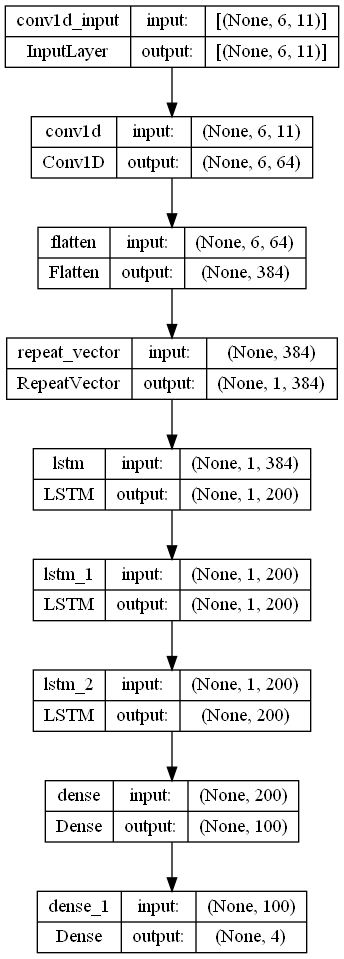

In [ ]:
plot_model(model=model_enc_dec_cnn, show_shapes=True)

In [ ]:
epochs = 100
batch_size = xtrain.shape[0] // 1000
validation = 0.2

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=False, monitor='val_loss',
                                         mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')
rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=3, min_lr=1e-10)

In [ ]:
## 학습

history = model_enc_dec_cnn.fit(xtrain, ytrain, verbose=1, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])

Epoch 1/100
801/801 [==============================] - 36s 29ms/step - loss: 25.2325 - nse: 0.4868 - val_loss: 32.6139 - val_nse: -0.8678 - lr: 0.0100
Epoch 2/100
801/801 [==============================] - 15s 18ms/step - loss: 15.0058 - nse: 0.9006 - val_loss: 15.3824 - val_nse: 0.4907 - lr: 0.0100
Epoch 3/100
801/801 [==============================] - 15s 19ms/step - loss: 10.9921 - nse: 0.9599 - val_loss: 10.6933 - val_nse: 0.7527 - lr: 0.0100
Epoch 4/100
801/801 [==============================] - 15s 19ms/step - loss: 6.9819 - nse: 0.9827 - val_loss: 11.5242 - val_nse: 0.7154 - lr: 0.0100
Epoch 5/100
801/801 [==============================] - 15s 18ms/step - loss: 7.2383 - nse: 0.9816 - val_loss: 8.1153 - val_nse: 0.8449 - lr: 0.0100
Epoch 6/100
801/801 [==============================] - 15s 18ms/step - loss: 6.6236 - nse: 0.9851 - val_loss: 10.8048 - val_nse: 0.7580 - lr: 0.0100
Epoch 7/100
801/801 [==============================] - 15s 19ms/step - loss: 6.0728 - nse: 0.9876 - val

In [ ]:
## 평가

keras_model_best = keras.models.load_model('best_model.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error, 'nse':nse})

yhat = keras_model_best.predict(xtest, verbose=1)

keras_model_best.evaluate(xtest,ytest)

1250/1250 [==============================] - 8s 6ms/step - loss: 56.6705 - nse: -inf


[56.67051696777344, -inf]

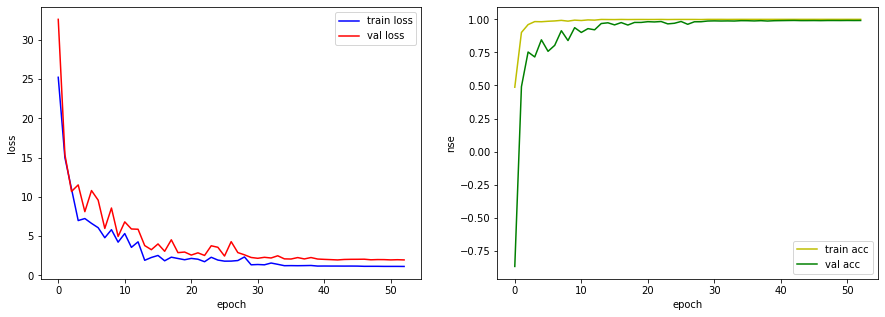

In [ ]:
## 학습 과정 시각화

fig, loss_ax = plt.subplots(1, 2)
fig.set_size_inches((15,5))

loss_ax[0].plot(history.history['loss'], 'b', label='train loss')
loss_ax[0].plot(history.history['val_loss'], 'r', label='val loss')

loss_ax[1].plot(history.history['nse'], 'y', label='train acc')
loss_ax[1].plot(history.history['val_nse'], 'g', label='val acc')

loss_ax[0].set_xlabel('epoch')
loss_ax[0].set_ylabel('loss')
loss_ax[1].set_xlabel('epoch')
loss_ax[1].set_ylabel('nse')

loss_ax[0].legend(loc='upper right')
loss_ax[1].legend(loc='lower right')

plt.show()

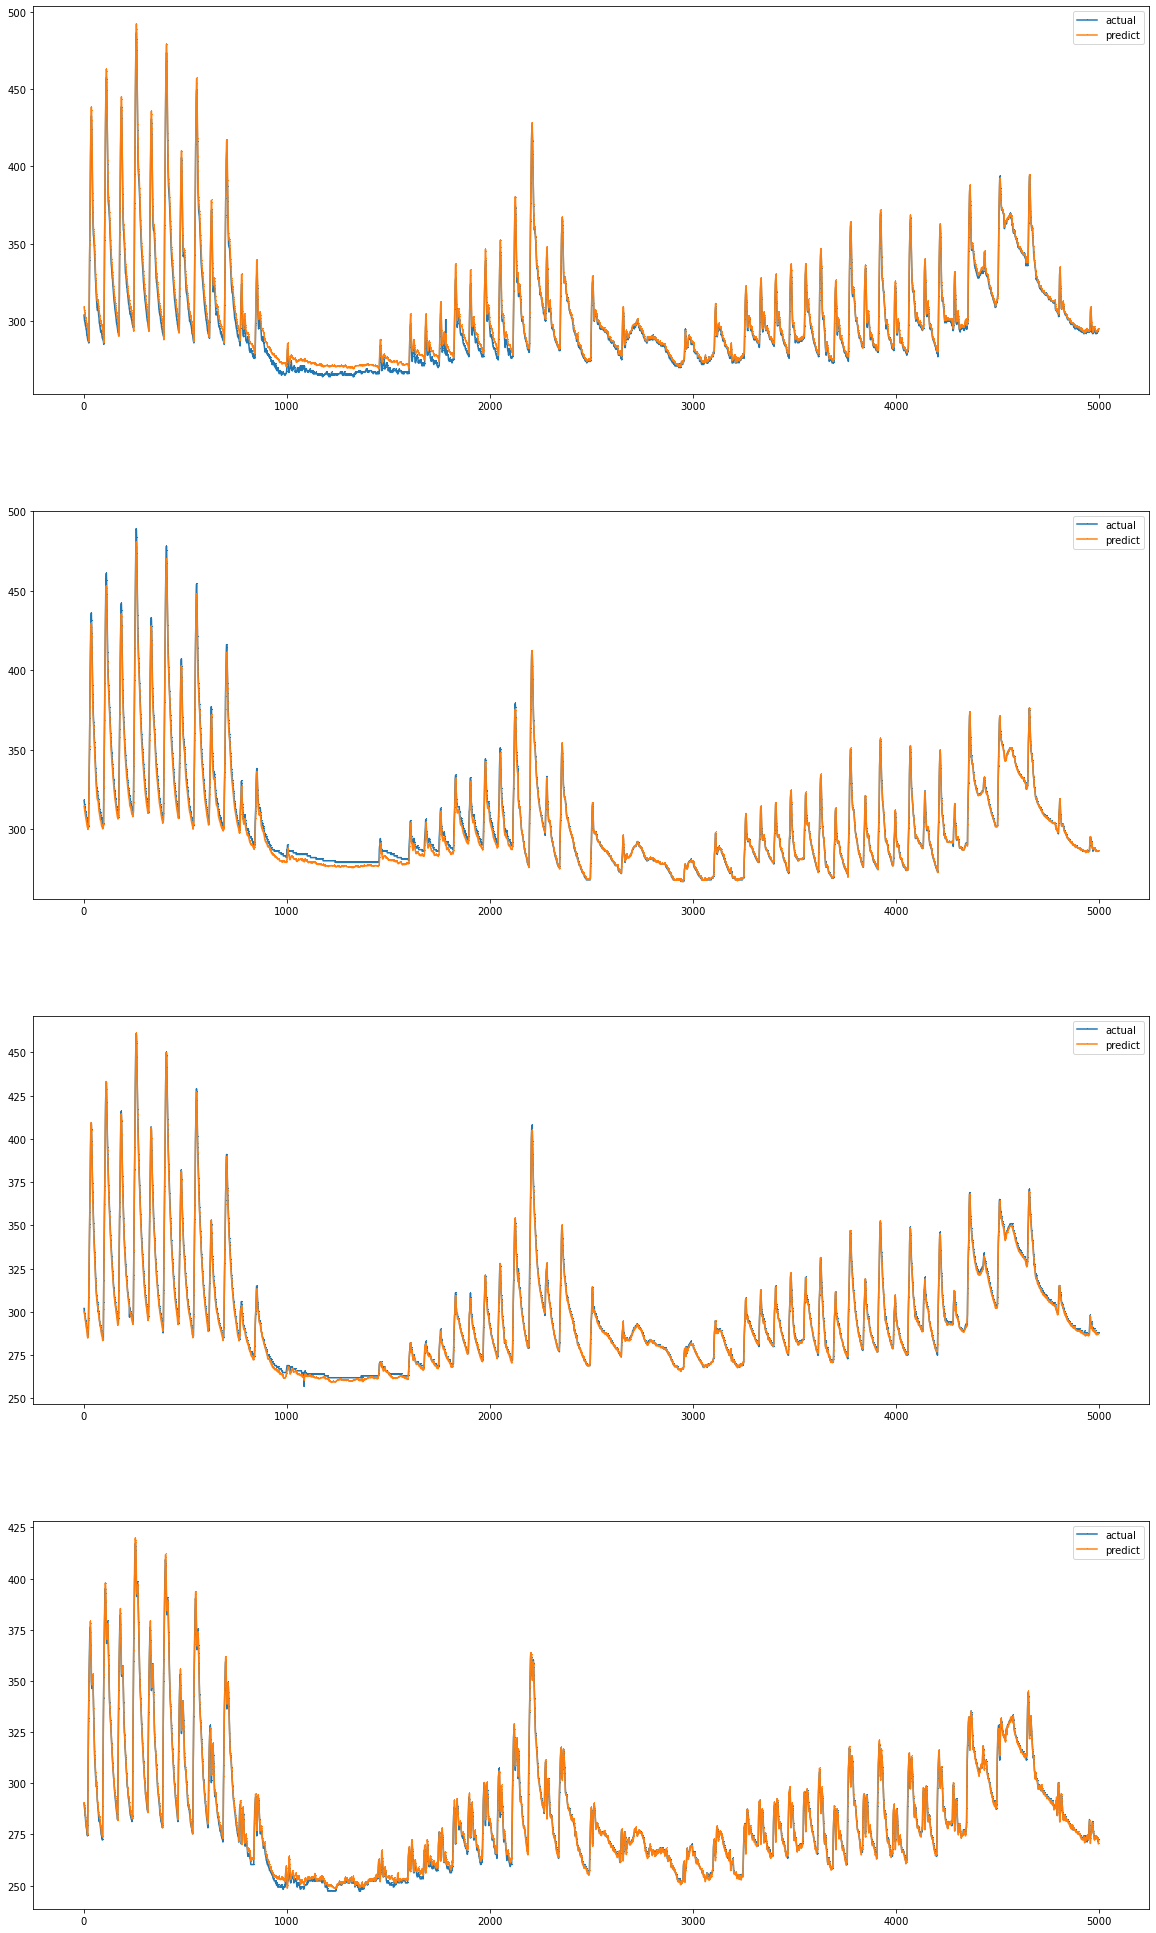

In [ ]:
## 결과 시각화
tl_predict = np.array(yhat)

f, axes = plt.subplots(4, 1)
f.set_size_inches((20, 35))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(4):
    axes[i].plot(ytest.T[i][:5000], marker = ",", label = "actual")
    axes[i].plot(tl_predict.T[i][:5000], marker = ",", label="predict", alpha = 0.98)
    axes[i].legend(prop={'size':10})  

plt.show()

In [ ]:
## 점수 확인
float(root_mean_squared_error(ytest, tl_predict))

137.31236884493953

## 파일 저장

In [ ]:
raw_data2 = pd.read_csv('data/rawdata.csv')
raw_data2 = raw_data2[:-6912]
predict_dataset = raw_data2[['청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']]

In [ ]:
predict_dataset.isnull().sum()

청담대교_수위    59
잠수교_수위     59
한강대교_수위    59
행주대교_수위    59
dtype: int64

In [ ]:
predict_dataset.iloc[nanIndex[2]]

청담대교_수위   NaN
잠수교_수위    NaN
한강대교_수위   NaN
행주대교_수위   NaN
Name: 140615, dtype: float64

In [ ]:
y_real_predict

[array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([nan, nan, nan, nan]),
 array([na

In [ ]:
test_input = np.array(x_real_predict)
y_real_hat = keras_model_best.predict(test_input, verbose=1)

2/2 [==============================] - 0s 7ms/step


In [ ]:
y_real_hat

array([[424.73993, 406.3282 , 404.5109 , 375.35168],
       [420.5452 , 402.14648, 401.31046, 374.877  ],
       [418.32318, 399.58258, 399.20224, 373.61975],
       [416.92227, 397.8596 , 397.35327, 370.80142],
       [415.70172, 395.74542, 395.16537, 368.09332],
       [414.19827, 393.13263, 392.4992 , 365.29272],
       [412.4765 , 390.27866, 389.4913 , 362.25345],
       [410.74026, 387.2948 , 386.40976, 359.11398],
       [408.961  , 384.16974, 383.40512, 355.90372],
       [407.28024, 381.05783, 380.33905, 352.72357],
       [405.55014, 377.95227, 377.232  , 349.8507 ],
       [403.741  , 375.00427, 374.1642 , 346.9614 ],
       [401.80222, 372.06696, 371.13715, 344.12842],
       [399.87466, 369.05707, 368.2017 , 341.4797 ],
       [397.92114, 366.0249 , 365.27   , 339.0295 ],
       [395.9979 , 362.9747 , 362.36676, 336.70166],
       [394.03992, 359.92148, 359.51434, 334.54562],
       [392.03394, 357.12494, 356.712  , 332.55148],
       [389.99493, 354.34445, 353.91977, 330.6

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269424 entries, 0 to 269423
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   청담대교_수위  269365 non-null  float64
 1   잠수교_수위   269365 non-null  float64
 2   한강대교_수위  269365 non-null  float64
 3   행주대교_수위  269365 non-null  float64
dtypes: float64(4)
memory usage: 8.2 MB


In [ ]:
for i in range(len(nanIndex)):
    predict_dataset.iloc[nanIndex[i]] = np.float64(y_real_hat[i])

In [ ]:
addon = pd.read_csv('data/newdata.csv', encoding = 'cp949')
addon.set_index(keys = ['날짜'], inplace = True)
addon.index = pd.to_datetime(addon.index, format = '%Y-%m-%d %H:%M')
add = addon[['청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']][-6912:]
add

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
날짜,,,,
2022-06-01 00:00:00,279.0,276.0,274.0,269.0
2022-06-01 00:10:00,281.0,277.0,274.0,267.0
2022-06-01 00:20:00,284.0,277.0,274.0,264.0
2022-06-01 00:30:00,285.0,277.0,274.0,261.0
2022-06-01 00:40:00,284.0,278.0,274.0,259.0
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


In [ ]:
result = pd.concat([predict_dataset,add], ignore_index=True)
result

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,310.7,300.2,290.0,275.3
1,314.7,300.2,290.0,275.3
2,313.7,301.2,290.0,275.3
3,311.7,301.2,290.0,276.3
4,311.7,301.2,291.0,277.3
...,...,...,...,...
276331,288.0,295.0,299.0,306.0
276332,287.0,303.0,304.0,308.0
276333,299.0,307.0,309.0,310.0
276334,309.0,311.0,314.0,312.0


In [ ]:
result.to_csv('data/수위x4.csv', index = False, encoding = 'cp949', columns = ['청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위'])

# 수위 외 결측치 처리 - 행주대교 유량

In [ ]:
raw_data = pd.read_csv('data/수위x4.csv', encoding = 'cp949')
raw_data

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,310.7,300.2,290.0,275.3
1,314.7,300.2,290.0,275.3
2,313.7,301.2,290.0,275.3
3,311.7,301.2,290.0,276.3
4,311.7,301.2,291.0,277.3
...,...,...,...,...
276331,288.0,295.0,299.0,306.0
276332,287.0,303.0,304.0,308.0
276333,299.0,307.0,309.0,310.0
276334,309.0,311.0,314.0,312.0


In [ ]:
raw_data2 = pd.read_csv('data/newdata.csv', encoding = 'cp949')

In [ ]:
raw_data2

,Unnamed: 0,날짜,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,광진교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,0,2012-05-01 00:00:00,0.0,555.00,445.0,469.05,729.80,540.18,1.20,310.7,300.2,290.0,275.3
1,1,2012-05-01 00:10:00,0.0,562.90,449.0,498.00,731.48,540.18,1.20,314.7,300.2,290.0,275.3
2,2,2012-05-01 00:20:00,0.0,576.40,451.0,490.68,726.42,540.18,1.20,313.7,301.2,290.0,275.3
3,3,2012-05-01 00:30:00,0.0,563.10,452.0,476.21,726.42,552.17,1.20,311.7,301.2,290.0,276.3
4,4,2012-05-01 00:40:00,0.0,576.40,450.0,476.21,707.17,564.29,1.20,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,276331,2022-07-18 23:10:00,0.0,259.23,510.0,319.84,-456.41,974.40,1.12,288.0,295.0,299.0,306.0
276332,276332,2022-07-18 23:20:00,0.0,260.46,492.0,314.01,-717.30,1006.88,1.12,287.0,303.0,304.0,308.0
276333,276333,2022-07-18 23:30:00,0.0,259.37,475.0,387.55,-843.37,1039.90,1.12,299.0,307.0,309.0,310.0
276334,276334,2022-07-18 23:40:00,0.0,259.13,458.0,454.91,-1023.37,1073.46,1.12,309.0,311.0,314.0,312.0


In [ ]:
xdata = pd.concat([raw_data,raw_data2[['강수량(mm)','방류량','강화대교_조위','청담대교_유량','한강대교_유량','행주대교_유량']]], axis = 1)
xdata

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량
0,310.7,300.2,290.0,275.3,0.0,555.00,445.0,469.05,729.80,540.18
1,314.7,300.2,290.0,275.3,0.0,562.90,449.0,498.00,731.48,540.18
2,313.7,301.2,290.0,275.3,0.0,576.40,451.0,490.68,726.42,540.18
3,311.7,301.2,290.0,276.3,0.0,563.10,452.0,476.21,726.42,552.17
4,311.7,301.2,291.0,277.3,0.0,576.40,450.0,476.21,707.17,564.29
...,...,...,...,...,...,...,...,...,...,...
276331,288.0,295.0,299.0,306.0,0.0,259.23,510.0,319.84,-456.41,974.40
276332,287.0,303.0,304.0,308.0,0.0,260.46,492.0,314.01,-717.30,1006.88
276333,299.0,307.0,309.0,310.0,0.0,259.37,475.0,387.55,-843.37,1039.90
276334,309.0,311.0,314.0,312.0,0.0,259.13,458.0,454.91,-1023.37,1073.46


In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

input_x_regular = xdata.copy()

for i in range(len(xdata.columns)):
    scaler = MinMaxScaler()                       #StandardScaler() , MinMaxScaler() , RobustScaler()
    a=np.array(input_x_regular.iloc[:,i])
    tmp_x = scaler.fit_transform(a.reshape(-1,1))
    input_x_regular.iloc[:,i] = tmp_x

In [ ]:
input_x_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량
0,0.049611,0.060000,0.051621,0.056478,0.0,0.057689,0.118382,0.110974,0.147596,0.011070
1,0.053502,0.060000,0.051621,0.056478,0.0,0.057984,0.118713,0.112074,0.147654,0.011070
2,0.052529,0.061111,0.051621,0.056478,0.0,0.058488,0.118878,0.111796,0.147478,0.011070
3,0.050584,0.061111,0.051621,0.058140,0.0,0.057992,0.118961,0.111246,0.147478,0.011475
4,0.050584,0.061111,0.052821,0.059801,0.0,0.058488,0.118795,0.111246,0.146810,0.011883
...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.046645,0.123758,0.105305,0.106425,0.025719
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.046691,0.122269,0.105084,0.097370,0.026815
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.046650,0.120863,0.107878,0.092994,0.027929
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.046642,0.119457,0.110437,0.086747,0.029061


In [ ]:
newdata = pd.read_csv('data/rawdata.csv')
ydata = newdata[['행주대교_유량']]
ydata

,행주대교_유량
0,540.18
1,540.18
2,540.18
3,552.17
4,564.29
...,...
276331,974.40
276332,1006.88
276333,1039.90
276334,1073.46


In [ ]:
input_regular = pd.concat([input_x_regular, ydata], axis = 1)
input_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,행주대교_유량
0,0.049611,0.060000,0.051621,0.056478,0.0,0.057689,0.118382,0.110974,0.147596,0.011070,540.18
1,0.053502,0.060000,0.051621,0.056478,0.0,0.057984,0.118713,0.112074,0.147654,0.011070,540.18
2,0.052529,0.061111,0.051621,0.056478,0.0,0.058488,0.118878,0.111796,0.147478,0.011070,540.18
3,0.050584,0.061111,0.051621,0.058140,0.0,0.057992,0.118961,0.111246,0.147478,0.011475,552.17
4,0.050584,0.061111,0.052821,0.059801,0.0,0.058488,0.118795,0.111246,0.146810,0.011883,564.29
...,...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.046645,0.123758,0.105305,0.106425,0.025719,974.40
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.046691,0.122269,0.105084,0.097370,0.026815,1006.88
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.046650,0.120863,0.107878,0.092994,0.027929,1039.90
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.046642,0.119457,0.110437,0.086747,0.029061,1073.46


In [ ]:
input_regular.isnull().sum()

청담대교_수위     0
잠수교_수위      0
한강대교_수위     0
행주대교_수위     0
강수량(mm)     0
방류량         0
강화대교_조위     0
청담대교_유량     0
한강대교_유량     0
행주대교_유량     0
행주대교_유량    59
dtype: int64

In [ ]:
idx = ydata[ydata['행주대교_유량'].isnull()==True]['행주대교_유량'].index
idx

Int64Index([140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620,
            140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628,
            140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636,
            140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644,
            140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652,
            140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660,
            140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668,
            140669, 140670, 236080],
           dtype='int64')

In [ ]:
nanIndex = idx

In [ ]:
from tqdm import tqdm

xdata = []
ydata = []
xdata_idx = []
ydata_idx = [-1]
for i in range(len(input_regular.columns)-len(ydata_idx)):
    xdata_idx.append(i)

w =  6 #window size

idx = []
for i in range(12):
  idx.append(i*26496)

for i in tqdm(range(11)):
    if i != 10:
        tmp = input_regular[idx[i]:idx[i+1]]
    else:
        tmp = input_regular[idx[i]:]

    for j in range(len(tmp)-w):
        xdata.append(np.array(tmp.iloc[j:j + w, xdata_idx]).astype(float))

    for j in range(w,len(tmp)):
        ydata.append(np.array(tmp.iloc[j, ydata_idx]).astype(float))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:42<00:00,  9.34s/it]


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(276270, 6, 10)
(276270, 1)


In [ ]:
# 나중에 학습된 모델에 이거 넣어서 predict해서 결측치 채우기
x_real_predict = []
y_real_predict = []

for i in range(len(nanIndex)):
    k = nanIndex[-(i+1)]
    
    x_real_predict.insert(0,(xdata[k - w * (k // 26496 + 1)]))
    y_real_predict.insert(0,(ydata[k - w * (k // 26496 + 1)]))
    
    xdata.pop(k - w * (k // 26496 + 1))
    ydata.pop(k - w * (k // 26496 + 1))

In [ ]:
print(np.array(x_real_predict).shape)
print(np.array(y_real_predict).shape)

(59, 6, 10)
(59, 1)


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(276211, 6, 10)
(276211, 1)


In [ ]:
pd.DataFrame(ydata).isnull().sum()

0    0
dtype: int64

In [ ]:
xtrain = np.array(xdata[:-40000])
ytrain = np.array(ydata[:-40000])

xtest = np.array(xdata[-40000:])
ytest = np.array(ydata[-40000:])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(236211, 6, 10)
(236211, 1)
(40000, 6, 10)
(40000, 1)


## 모델 생성

In [ ]:
def nse(y_true, y_pred):
    return (1-(K.sum((y_true-y_pred)**2)/K.sum((y_true-K.mean(y_true))**2)))

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

if 'model_enc_dec_cnn' in locals(): 
    del model_enc_dec_cnn 
if 'history' in locals():
    del history

optimizer = tf.keras.optimizers.Adam(lr=0.01) #기본값 0.001

model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu', input_shape=(w, xtrain.shape[2])))
#model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(MaxPooling1D(pool_size=2))
model_enc_dec_cnn.add(Flatten())

model_enc_dec_cnn.add(RepeatVector(1))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu'))

model_enc_dec_cnn.add(Dense(100, activation='relu'))
model_enc_dec_cnn.add(Dense(1))

model_enc_dec_cnn.compile(loss=root_mean_squared_error, optimizer=optimizer, metrics =[nse])

model_enc_dec_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 6, 64)             1344      
                                                                 
 flatten_5 (Flatten)         (None, 384)               0         
                                                                 
 repeat_vector_5 (RepeatVect  (None, 1, 384)           0         
 or)                                                             
                                                                 
 lstm_15 (LSTM)              (None, 1, 200)            468000    
                                                                 
 lstm_16 (LSTM)              (None, 1, 200)            320800    
                                                                 
 lstm_17 (LSTM)              (None, 200)               320800    
                                                      

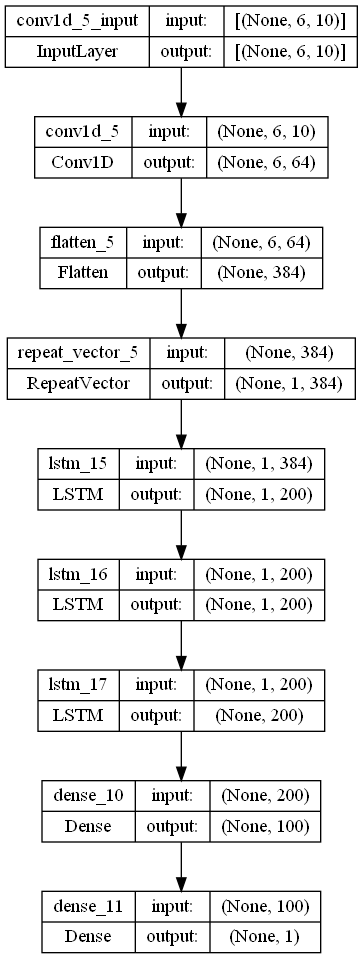

In [ ]:
plot_model(model=model_enc_dec_cnn, show_shapes=True)

In [ ]:
epochs = 100
batch_size = xtrain.shape[0] // 1000
validation = 0.2

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=False, monitor='val_loss',
                                         mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')
rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=3, min_lr=1e-10)

In [ ]:
## 학습

history = model_enc_dec_cnn.fit(xtrain, ytrain, verbose=1, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])

Epoch 1/100
801/801 [==============================] - 18s 18ms/step - loss: 162.4066 - nse: 0.9467 - val_loss: 78.5023 - val_nse: 0.9487 - lr: 0.0100
Epoch 2/100
801/801 [==============================] - 15s 19ms/step - loss: 89.5783 - nse: 0.9913 - val_loss: 115.9510 - val_nse: 0.2958 - lr: 0.0100
Epoch 3/100
801/801 [==============================] - 15s 19ms/step - loss: 71.5440 - nse: 0.9942 - val_loss: 63.2843 - val_nse: 0.6503 - lr: 0.0100
Epoch 4/100
801/801 [==============================] - 15s 19ms/step - loss: 65.0093 - nse: 0.9950 - val_loss: 39.3598 - val_nse: 0.9011 - lr: 0.0100
Epoch 5/100
801/801 [==============================] - 15s 18ms/step - loss: 59.9563 - nse: 0.9959 - val_loss: 59.3411 - val_nse: 0.8528 - lr: 0.0100
Epoch 6/100
801/801 [==============================] - 15s 19ms/step - loss: 58.3447 - nse: 0.9964 - val_loss: 65.5691 - val_nse: 0.9026 - lr: 0.0100
Epoch 7/100
801/801 [==============================] - 15s 19ms/step - loss: 50.1637 - nse: 0.9974

In [ ]:
## 평가

keras_model_best = keras.models.load_model('best_model.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error, 'nse':nse})

yhat = keras_model_best.predict(xtest, verbose=1)

keras_model_best.evaluate(xtest,ytest)

1250/1250 [==============================] - 6s 5ms/step - loss: 14.9694 - nse: -inf


[14.969429969787598, -inf]

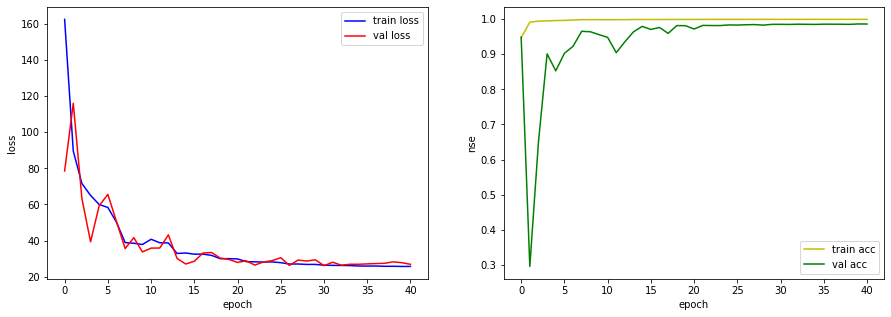

In [ ]:
## 학습 과정 시각화

fig, loss_ax = plt.subplots(1, 2)
fig.set_size_inches((15,5))

loss_ax[0].plot(history.history['loss'], 'b', label='train loss')
loss_ax[0].plot(history.history['val_loss'], 'r', label='val loss')

loss_ax[1].plot(history.history['nse'], 'y', label='train acc')
loss_ax[1].plot(history.history['val_nse'], 'g', label='val acc')

loss_ax[0].set_xlabel('epoch')
loss_ax[0].set_ylabel('loss')
loss_ax[1].set_xlabel('epoch')
loss_ax[1].set_ylabel('nse')

loss_ax[0].legend(loc='upper right')
loss_ax[1].legend(loc='lower right')

plt.show()

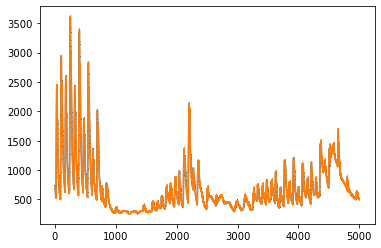

In [ ]:
## 결과 시각화
tl_predict = np.array(yhat)

plt.plot(ytest.T[i][:5000], marker = ",", label = "actual")
plt.plot(tl_predict.T[i][:5000], marker = ",", label="predict", alpha = 0.98)
 

plt.show()

In [ ]:
## 점수 확인
float(root_mean_squared_error(ytest, tl_predict))

17.68385455392392

## 파일 저장

In [ ]:
raw_data2 = pd.read_csv('data/rawdata.csv')
predict_dataset = raw_data2[['행주대교_유량']]

In [ ]:
predict_dataset.isnull().sum()

행주대교_유량    59
dtype: int64

In [ ]:
predict_dataset.iloc[nanIndex[2]]

행주대교_유량   NaN
Name: 140615, dtype: float64

In [ ]:
y_real_predict

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan])]

In [ ]:
test_input = np.array(x_real_predict)
y_real_hat = keras_model_best.predict(test_input, verbose=1)

2/2 [==============================] - 0s 10ms/step


In [ ]:
y_real_hat

array([[2439.838 ],
       [2440.4177],
       [2399.834 ],
       [2345.3313],
       [2272.5444],
       [2224.065 ],
       [2177.336 ],
       [2121.8394],
       [2059.6719],
       [1994.0306],
       [1929.5526],
       [1872.975 ],
       [1818.8434],
       [1766.4023],
       [1716.6526],
       [1669.6415],
       [1624.6776],
       [1583.9279],
       [1546.3085],
       [1511.7831],
       [1483.6405],
       [1456.6698],
       [1428.4672],
       [1403.5266],
       [1378.2181],
       [1344.2498],
       [1323.548 ],
       [1306.8058],
       [1292.2296],
       [1277.3247],
       [1264.3145],
       [1270.3572],
       [1265.8068],
       [1255.3026],
       [1246.2451],
       [1236.8726],
       [1241.9313],
       [1258.9186],
       [1259.5758],
       [1242.0461],
       [1228.9823],
       [1234.1709],
       [1294.7225],
       [1347.2902],
       [1360.8513],
       [1369.8529],
       [1374.5679],
       [1387.0878],
       [1418.1547],
       [1445.493 ],


In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   행주대교_유량  276277 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [ ]:
for i in range(len(nanIndex)):
    predict_dataset.iloc[nanIndex[i]] = np.float64(y_real_hat[i])

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   행주대교_유량  276336 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [ ]:
predict_dataset.to_csv('data/행주대교_유량.csv', index = False, encoding = 'cp949', columns = ['행주대교_유량'])

# 수위 외 결측치 처리 - 방류량

In [ ]:
raw_data3 = pd.read_csv('data/행주대교_유량.csv', encoding = 'cp949')
raw_data3

,행주대교_유량
0,540.18
1,540.18
2,540.18
3,552.17
4,564.29
...,...
276331,974.40
276332,1006.88
276333,1039.90
276334,1073.46


In [ ]:
xdata = pd.concat([raw_data,raw_data2[['강수량(mm)','방류량','강화대교_조위','청담대교_유량','한강대교_유량']],raw_data3], axis = 1)
xdata

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량
0,310.7,300.2,290.0,275.3,0.0,555.00,445.0,469.05,729.80,540.18
1,314.7,300.2,290.0,275.3,0.0,562.90,449.0,498.00,731.48,540.18
2,313.7,301.2,290.0,275.3,0.0,576.40,451.0,490.68,726.42,540.18
3,311.7,301.2,290.0,276.3,0.0,563.10,452.0,476.21,726.42,552.17
4,311.7,301.2,291.0,277.3,0.0,576.40,450.0,476.21,707.17,564.29
...,...,...,...,...,...,...,...,...,...,...
276331,288.0,295.0,299.0,306.0,0.0,259.23,510.0,319.84,-456.41,974.40
276332,287.0,303.0,304.0,308.0,0.0,260.46,492.0,314.01,-717.30,1006.88
276333,299.0,307.0,309.0,310.0,0.0,259.37,475.0,387.55,-843.37,1039.90
276334,309.0,311.0,314.0,312.0,0.0,259.13,458.0,454.91,-1023.37,1073.46


In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

input_x_regular = xdata.copy()

for i in range(len(xdata.columns)):
    scaler = MinMaxScaler()                       #StandardScaler() , MinMaxScaler() , RobustScaler()
    a=np.array(input_x_regular.iloc[:,i])
    tmp_x = scaler.fit_transform(a.reshape(-1,1))
    input_x_regular.iloc[:,i] = tmp_x

In [ ]:
input_x_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량
0,0.049611,0.060000,0.051621,0.056478,0.0,0.057689,0.118382,0.110974,0.147596,0.011070
1,0.053502,0.060000,0.051621,0.056478,0.0,0.057984,0.118713,0.112074,0.147654,0.011070
2,0.052529,0.061111,0.051621,0.056478,0.0,0.058488,0.118878,0.111796,0.147478,0.011070
3,0.050584,0.061111,0.051621,0.058140,0.0,0.057992,0.118961,0.111246,0.147478,0.011475
4,0.050584,0.061111,0.052821,0.059801,0.0,0.058488,0.118795,0.111246,0.146810,0.011883
...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.046645,0.123758,0.105305,0.106425,0.025719
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.046691,0.122269,0.105084,0.097370,0.026815
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.046650,0.120863,0.107878,0.092994,0.027929
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.046642,0.119457,0.110437,0.086747,0.029061


In [ ]:
newdata = pd.read_csv('data/rawdata.csv')
ydata = newdata[['방류량']]
ydata

,방류량
0,555.00
1,562.90
2,576.40
3,563.10
4,576.40
...,...
276331,259.23
276332,260.46
276333,259.37
276334,259.13


In [ ]:
input_regular = pd.concat([input_x_regular, ydata], axis = 1)
input_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,방류량
0,0.049611,0.060000,0.051621,0.056478,0.0,0.057689,0.118382,0.110974,0.147596,0.011070,555.00
1,0.053502,0.060000,0.051621,0.056478,0.0,0.057984,0.118713,0.112074,0.147654,0.011070,562.90
2,0.052529,0.061111,0.051621,0.056478,0.0,0.058488,0.118878,0.111796,0.147478,0.011070,576.40
3,0.050584,0.061111,0.051621,0.058140,0.0,0.057992,0.118961,0.111246,0.147478,0.011475,563.10
4,0.050584,0.061111,0.052821,0.059801,0.0,0.058488,0.118795,0.111246,0.146810,0.011883,576.40
...,...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.046645,0.123758,0.105305,0.106425,0.025719,259.23
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.046691,0.122269,0.105084,0.097370,0.026815,260.46
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.046650,0.120863,0.107878,0.092994,0.027929,259.37
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.046642,0.119457,0.110437,0.086747,0.029061,259.13


In [ ]:
input_regular.isnull().sum()

청담대교_수위      0
잠수교_수위       0
한강대교_수위      0
행주대교_수위      0
강수량(mm)      0
방류량          0
강화대교_조위      0
청담대교_유량      0
한강대교_유량      0
행주대교_유량      0
방류량        743
dtype: int64

In [ ]:
idx = ydata[ydata['방류량'].isnull()==True]['방류량'].index
idx

Int64Index([ 13200,  68081,  68083,  68084,  68085,  68086,  68087,  68089,
             68090,  68091,
            ...
            270533, 270534, 271588, 272215, 272216, 272217, 272218, 272219,
            272220, 272221],
           dtype='int64', length=743)

In [ ]:
nanIndex = idx

In [ ]:
from tqdm import tqdm

xdata = []
ydata = []
xdata_idx = []
ydata_idx = [-1]
for i in range(len(input_regular.columns)-len(ydata_idx)):
    xdata_idx.append(i)

w =  6 #window size

idx = []
for i in range(12):
  idx.append(i*26496)

for i in tqdm(range(11)):
    if i != 10:
        tmp = input_regular[idx[i]:idx[i+1]]
    else:
        tmp = input_regular[idx[i]:]

    for j in range(len(tmp)-w):
        xdata.append(np.array(tmp.iloc[j:j + w, xdata_idx]).astype(float))

    for j in range(w,len(tmp)):
        ydata.append(np.array(tmp.iloc[j, ydata_idx]).astype(float))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [05:25<00:00, 29.58s/it]


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(276270, 6, 10)
(276270, 1)


In [ ]:
# 나중에 학습된 모델에 이거 넣어서 predict해서 결측치 채우기
x_real_predict = []
y_real_predict = []

for i in range(len(nanIndex)):
    k = nanIndex[-(i+1)]
    
    x_real_predict.insert(0,(xdata[k - w * (k // 26496 + 1)]))
    y_real_predict.insert(0,(ydata[k - w * (k // 26496 + 1)]))
    
    xdata.pop(k - w * (k // 26496 + 1))
    ydata.pop(k - w * (k // 26496 + 1))

In [ ]:
print(np.array(x_real_predict).shape)
print(np.array(y_real_predict).shape)

(743, 6, 10)
(743, 1)


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(275527, 6, 10)
(275527, 1)


In [ ]:
pd.DataFrame(ydata).isnull().sum()

0    0
dtype: int64

In [ ]:
xtrain = np.array(xdata[:-40000])
ytrain = np.array(ydata[:-40000])

xtest = np.array(xdata[-40000:])
ytest = np.array(ydata[-40000:])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(235527, 6, 10)
(235527, 1)
(40000, 6, 10)
(40000, 1)


## 모델 생성

In [ ]:
def nse(y_true, y_pred):
    return (1-(K.sum((y_true-y_pred)**2)/K.sum((y_true-K.mean(y_true))**2)))

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

if 'model_enc_dec_cnn' in locals(): 
    del model_enc_dec_cnn 
if 'history' in locals():
    del history

optimizer = tf.keras.optimizers.Adam(lr=0.01) #기본값 0.001

model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu', input_shape=(w, xtrain.shape[2])))
#model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(MaxPooling1D(pool_size=2))
model_enc_dec_cnn.add(Flatten())

model_enc_dec_cnn.add(RepeatVector(1))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu'))

model_enc_dec_cnn.add(Dense(100, activation='relu'))
model_enc_dec_cnn.add(Dense(1))

model_enc_dec_cnn.compile(loss=root_mean_squared_error, optimizer=optimizer, metrics =[nse])

model_enc_dec_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 6, 64)             1344      
                                                                 
 flatten_6 (Flatten)         (None, 384)               0         
                                                                 
 repeat_vector_6 (RepeatVect  (None, 1, 384)           0         
 or)                                                             
                                                                 
 lstm_18 (LSTM)              (None, 1, 200)            468000    
                                                                 
 lstm_19 (LSTM)              (None, 1, 200)            320800    
                                                                 
 lstm_20 (LSTM)              (None, 200)               320800    
                                                      

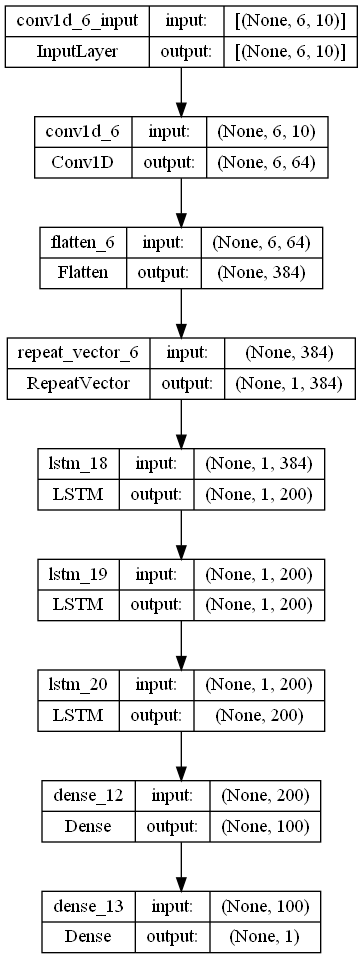

In [ ]:
plot_model(model=model_enc_dec_cnn, show_shapes=True)

In [ ]:
epochs = 100
batch_size = xtrain.shape[0] // 1000
validation = 0.2

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=False, monitor='val_loss',
                                         mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')
rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=3, min_lr=1e-10)

In [ ]:
## 학습

history = model_enc_dec_cnn.fit(xtrain, ytrain, verbose=1, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])

Epoch 1/100
802/802 [==============================] - 51s 51ms/step - loss: 157.9667 - nse: 0.9408 - val_loss: 81.6452 - val_nse: -inf - lr: 0.0100
Epoch 2/100
802/802 [==============================] - 38s 48ms/step - loss: 92.9250 - nse: 0.9829 - val_loss: 66.5269 - val_nse: -inf - lr: 0.0100
Epoch 3/100
802/802 [==============================] - 38s 48ms/step - loss: 89.7982 - nse: 0.9842 - val_loss: 49.3295 - val_nse: -inf - lr: 0.0100
Epoch 4/100
802/802 [==============================] - 38s 48ms/step - loss: 82.8273 - nse: 0.9860 - val_loss: 53.4407 - val_nse: -inf - lr: 0.0100
Epoch 5/100
802/802 [==============================] - 38s 48ms/step - loss: 83.5074 - nse: 0.9884 - val_loss: 44.1566 - val_nse: -inf - lr: 0.0100
Epoch 6/100
802/802 [==============================] - 38s 48ms/step - loss: 74.7018 - nse: 0.9904 - val_loss: 108.7712 - val_nse: -inf - lr: 0.0100
Epoch 7/100
802/802 [==============================] - 38s 48ms/step - loss: 76.5251 - nse: 0.9892 - val_loss:

In [ ]:
## 평가

keras_model_best = keras.models.load_model('best_model.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error, 'nse':nse})

yhat = keras_model_best.predict(xtest, verbose=1)

keras_model_best.evaluate(xtest,ytest)

1250/1250 [==============================] - 13s 10ms/step - loss: 17.5475 - nse: -inf


[17.547462463378906, -inf]

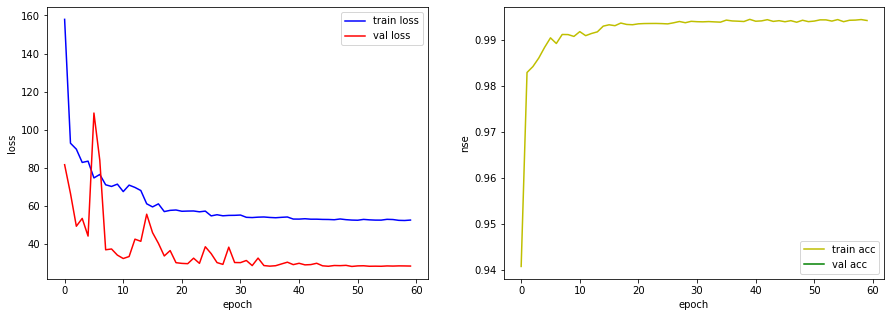

In [ ]:
## 학습 과정 시각화

fig, loss_ax = plt.subplots(1, 2)
fig.set_size_inches((15,5))

loss_ax[0].plot(history.history['loss'], 'b', label='train loss')
loss_ax[0].plot(history.history['val_loss'], 'r', label='val loss')

loss_ax[1].plot(history.history['nse'], 'y', label='train acc')
loss_ax[1].plot(history.history['val_nse'], 'g', label='val acc')

loss_ax[0].set_xlabel('epoch')
loss_ax[0].set_ylabel('loss')
loss_ax[1].set_xlabel('epoch')
loss_ax[1].set_ylabel('nse')

loss_ax[0].legend(loc='upper right')
loss_ax[1].legend(loc='lower right')

plt.show()

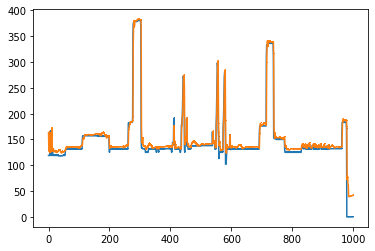

In [ ]:
## 결과 시각화
tl_predict = np.array(yhat)

plt.plot(ytest[:1000], marker = ",", label = "actual")
plt.plot(tl_predict.T[0][:1000], marker = ",", label="predict", alpha = 0.98)


plt.show()

In [ ]:
## 점수 확인
float(root_mean_squared_error(ytest, tl_predict))

120.68124679296139

## 파일 저장

In [ ]:
raw_data2 = pd.read_csv('data/rawdata.csv')
predict_dataset = raw_data2[['방류량']]

In [ ]:
predict_dataset.isnull().sum()

방류량    743
dtype: int64

In [ ]:
predict_dataset.iloc[nanIndex[2]]

방류량   NaN
Name: 68083, dtype: float64

In [ ]:
y_real_predict

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([na

In [ ]:
test_input = np.array(x_real_predict)
y_real_hat = keras_model_best.predict(test_input, verbose=1)

24/24 [==============================] - 2s 19ms/step


In [ ]:
y_real_hat

array([[ 769.33594 ],
       [ 774.1478  ],
       [ 745.366   ],
       [ 752.7827  ],
       [ 763.50586 ],
       [ 777.00964 ],
       [ 789.1633  ],
       [ 754.881   ],
       [ 759.6087  ],
       [ 767.4736  ],
       [ 778.39526 ],
       [ 793.895   ],
       [ 752.56555 ],
       [ 752.2078  ],
       [ 759.113   ],
       [ 768.3668  ],
       [ 788.5124  ],
       [ 469.17084 ],
       [ 354.4933  ],
       [ 298.21512 ],
       [ 248.49124 ],
       [ 126.863205],
       [ 126.880585],
       [ 126.153595],
       [ 126.24713 ],
       [ 127.023605],
       [ 127.84751 ],
       [ 127.664   ],
       [ 127.59753 ],
       [ 311.20105 ],
       [ 127.01094 ],
       [ 122.98786 ],
       [ 111.13416 ],
       [  79.26101 ],
       [ 131.87672 ],
       [ 131.49455 ],
       [ 127.861   ],
       [ 131.13165 ],
       [ 130.95068 ],
       [ 130.46921 ],
       [ 131.98053 ],
       [ 132.45682 ],
       [ 121.01245 ],
       [ 120.839516],
       [ 120.94445 ],
       [ 1

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   방류량     275593 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [ ]:
for i in range(len(nanIndex)):
    predict_dataset.iloc[nanIndex[i]] = np.float64(y_real_hat[i])

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   방류량     276336 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [ ]:
predict_dataset.to_csv('data/방류량.csv', index = False, encoding = 'cp949', columns = ['방류량'])

# 수위 외 결측치 처리 - 한강대교 유량

In [ ]:
raw_data4 = pd.read_csv('data/방류량.csv', encoding = 'cp949')
raw_data4

,방류량
0,555.00
1,562.90
2,576.40
3,563.10
4,576.40
...,...
276331,259.23
276332,260.46
276333,259.37
276334,259.13


In [ ]:
raw_data2 = pd.read_csv('data/newdata.csv', encoding = 'cp949')

In [ ]:
xdata = pd.concat([raw_data,raw_data2[['강수량(mm)','강화대교_조위','청담대교_유량','한강대교_유량']],raw_data3,raw_data4], axis = 1)
xdata

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,방류량
0,310.7,300.2,290.0,275.3,0.0,445.0,469.05,729.80,540.18,555.00
1,314.7,300.2,290.0,275.3,0.0,449.0,498.00,731.48,540.18,562.90
2,313.7,301.2,290.0,275.3,0.0,451.0,490.68,726.42,540.18,576.40
3,311.7,301.2,290.0,276.3,0.0,452.0,476.21,726.42,552.17,563.10
4,311.7,301.2,291.0,277.3,0.0,450.0,476.21,707.17,564.29,576.40
...,...,...,...,...,...,...,...,...,...,...
276331,288.0,295.0,299.0,306.0,0.0,510.0,319.84,-456.41,974.40,259.23
276332,287.0,303.0,304.0,308.0,0.0,492.0,314.01,-717.30,1006.88,260.46
276333,299.0,307.0,309.0,310.0,0.0,475.0,387.55,-843.37,1039.90,259.37
276334,309.0,311.0,314.0,312.0,0.0,458.0,454.91,-1023.37,1073.46,259.13


In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

input_x_regular = xdata.copy()

for i in range(len(xdata.columns)):
    scaler = MinMaxScaler()                       #StandardScaler() , MinMaxScaler() , RobustScaler()
    a=np.array(input_x_regular.iloc[:,i])
    tmp_x = scaler.fit_transform(a.reshape(-1,1))
    input_x_regular.iloc[:,i] = tmp_x

In [ ]:
input_x_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,방류량
0,0.049611,0.060000,0.051621,0.056478,0.0,0.118382,0.110974,0.147596,0.011070,0.057689
1,0.053502,0.060000,0.051621,0.056478,0.0,0.118713,0.112074,0.147654,0.011070,0.057984
2,0.052529,0.061111,0.051621,0.056478,0.0,0.118878,0.111796,0.147478,0.011070,0.058488
3,0.050584,0.061111,0.051621,0.058140,0.0,0.118961,0.111246,0.147478,0.011475,0.057992
4,0.050584,0.061111,0.052821,0.059801,0.0,0.118795,0.111246,0.146810,0.011883,0.058488
...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.123758,0.105305,0.106425,0.025719,0.046645
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.122269,0.105084,0.097370,0.026815,0.046691
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.120863,0.107878,0.092994,0.027929,0.046650
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.119457,0.110437,0.086747,0.029061,0.046642


In [ ]:
newdata = pd.read_csv('data/rawdata.csv')
ydata = newdata[['한강대교_유량']]
ydata

,한강대교_유량
0,729.80
1,731.48
2,726.42
3,726.42
4,707.17
...,...
276331,-456.41
276332,-717.30
276333,-843.37
276334,-1023.37


In [ ]:
input_regular = pd.concat([input_x_regular, ydata], axis = 1)
input_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,방류량,한강대교_유량
0,0.049611,0.060000,0.051621,0.056478,0.0,0.118382,0.110974,0.147596,0.011070,0.057689,729.80
1,0.053502,0.060000,0.051621,0.056478,0.0,0.118713,0.112074,0.147654,0.011070,0.057984,731.48
2,0.052529,0.061111,0.051621,0.056478,0.0,0.118878,0.111796,0.147478,0.011070,0.058488,726.42
3,0.050584,0.061111,0.051621,0.058140,0.0,0.118961,0.111246,0.147478,0.011475,0.057992,726.42
4,0.050584,0.061111,0.052821,0.059801,0.0,0.118795,0.111246,0.146810,0.011883,0.058488,707.17
...,...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.123758,0.105305,0.106425,0.025719,0.046645,-456.41
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.122269,0.105084,0.097370,0.026815,0.046691,-717.30
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.120863,0.107878,0.092994,0.027929,0.046650,-843.37
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.119457,0.110437,0.086747,0.029061,0.046642,-1023.37


In [ ]:
input_regular.isnull().sum()

청담대교_수위       0
잠수교_수위        0
한강대교_수위       0
행주대교_수위       0
강수량(mm)       0
강화대교_조위       0
청담대교_유량       0
한강대교_유량       0
행주대교_유량       0
방류량           0
한강대교_유량    1279
dtype: int64

In [ ]:
idx = ydata[ydata['한강대교_유량'].isnull()==True]['한강대교_유량'].index
idx

Int64Index([ 91352,  91353,  91354,  91355,  91356,  91357,  91358,  91359,
             91360,  91361,
            ...
            262125, 262126, 262127, 262128, 262129, 262130, 262131, 262132,
            262133, 262134],
           dtype='int64', length=1279)

In [ ]:
nanIndex = idx

In [ ]:
from tqdm import tqdm

xdata = []
ydata = []
xdata_idx = []
ydata_idx = [-1]
for i in range(len(input_regular.columns)-len(ydata_idx)):
    xdata_idx.append(i)

w =  6 #window size

idx = []
for i in range(12):
  idx.append(i*26496)

for i in tqdm(range(11)):
    if i != 10:
        tmp = input_regular[idx[i]:idx[i+1]]
    else:
        tmp = input_regular[idx[i]:]

    for j in range(len(tmp)-w):
        xdata.append(np.array(tmp.iloc[j:j + w, xdata_idx]).astype(float))

    for j in range(w,len(tmp)):
        ydata.append(np.array(tmp.iloc[j, ydata_idx]).astype(float))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [03:19<00:00, 18.11s/it]


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(276270, 6, 10)
(276270, 1)


In [ ]:
# 나중에 학습된 모델에 이거 넣어서 predict해서 결측치 채우기
x_real_predict = []
y_real_predict = []

for i in range(len(nanIndex)):
    k = nanIndex[-(i+1)]
    
    x_real_predict.insert(0,(xdata[k - w * (k // 26496 + 1)]))
    y_real_predict.insert(0,(ydata[k - w * (k // 26496 + 1)]))
    
    xdata.pop(k - w * (k // 26496 + 1))
    ydata.pop(k - w * (k // 26496 + 1))

In [ ]:
print(np.array(x_real_predict).shape)
print(np.array(y_real_predict).shape)

(1279, 6, 10)
(1279, 1)


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(274991, 6, 10)
(274991, 1)


In [ ]:
pd.DataFrame(ydata).isnull().sum()

0    0
dtype: int64

In [ ]:
xtrain = np.array(xdata[:-40000])
ytrain = np.array(ydata[:-40000])

xtest = np.array(xdata[-40000:])
ytest = np.array(ydata[-40000:])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(234991, 6, 10)
(234991, 1)
(40000, 6, 10)
(40000, 1)


## 모델 생성

In [ ]:
def nse(y_true, y_pred):
    return (1-(K.sum((y_true-y_pred)**2)/K.sum((y_true-K.mean(y_true))**2)))

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

if 'model_enc_dec_cnn' in locals(): 
    del model_enc_dec_cnn 
if 'history' in locals():
    del history

optimizer = tf.keras.optimizers.Adam(lr=0.01) #기본값 0.001

model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu', input_shape=(w, xtrain.shape[2])))
#model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(MaxPooling1D(pool_size=2))
model_enc_dec_cnn.add(Flatten())

model_enc_dec_cnn.add(RepeatVector(1))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu'))

model_enc_dec_cnn.add(Dense(100, activation='relu'))
model_enc_dec_cnn.add(Dense(1))

model_enc_dec_cnn.compile(loss=root_mean_squared_error, optimizer=optimizer, metrics =[nse])

model_enc_dec_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 6, 64)             1344      
                                                                 
 flatten_7 (Flatten)         (None, 384)               0         
                                                                 
 repeat_vector_7 (RepeatVect  (None, 1, 384)           0         
 or)                                                             
                                                                 
 lstm_21 (LSTM)              (None, 1, 200)            468000    
                                                                 
 lstm_22 (LSTM)              (None, 1, 200)            320800    
                                                                 
 lstm_23 (LSTM)              (None, 200)               320800    
                                                      

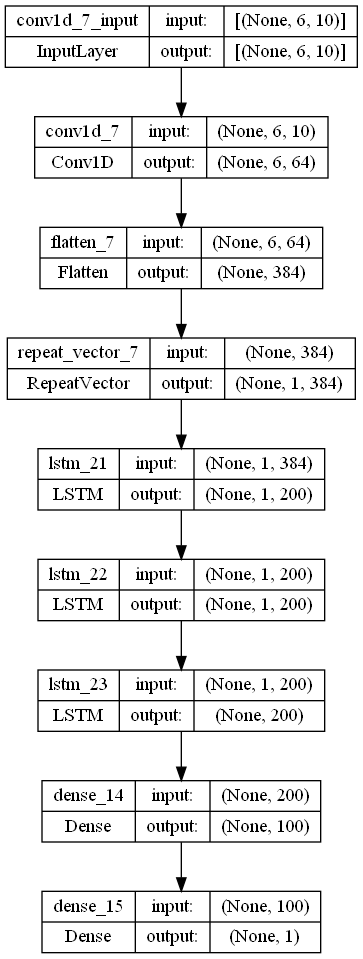

In [ ]:
plot_model(model=model_enc_dec_cnn, show_shapes=True)

In [ ]:
epochs = 100
batch_size = xtrain.shape[0] // 1000
validation = 0.2

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=False, monitor='val_loss',
                                         mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')
rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=3, min_lr=1e-10)

In [ ]:
## 학습

history = model_enc_dec_cnn.fit(xtrain, ytrain, verbose=1, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])

Epoch 1/100
804/804 [==============================] - 25s 26ms/step - loss: 214.1825 - nse: 0.9357 - val_loss: 101.2061 - val_nse: 0.9034 - lr: 0.0100
Epoch 2/100
804/804 [==============================] - 19s 23ms/step - loss: 105.3094 - nse: 0.9893 - val_loss: 92.8842 - val_nse: 0.9095 - lr: 0.0100
Epoch 3/100
804/804 [==============================] - 19s 23ms/step - loss: 86.1457 - nse: 0.9927 - val_loss: 75.9589 - val_nse: 0.9386 - lr: 0.0100
Epoch 4/100
804/804 [==============================] - 19s 23ms/step - loss: 83.8873 - nse: 0.9929 - val_loss: 73.2657 - val_nse: 0.9322 - lr: 0.0100
Epoch 5/100
804/804 [==============================] - 20s 25ms/step - loss: 75.1533 - nse: 0.9945 - val_loss: 119.4786 - val_nse: 0.8204 - lr: 0.0100
Epoch 6/100
804/804 [==============================] - 20s 25ms/step - loss: 72.5261 - nse: 0.9950 - val_loss: 86.4538 - val_nse: 0.8852 - lr: 0.0100
Epoch 7/100
804/804 [==============================] - 19s 23ms/step - loss: 70.0665 - nse: 0.99

In [ ]:
## 평가

keras_model_best = keras.models.load_model('best_model.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error, 'nse':nse})

yhat = keras_model_best.predict(xtest, verbose=1)

keras_model_best.evaluate(xtest,ytest)

1250/1250 [==============================] - 6s 4ms/step - loss: 42.3029 - nse: 0.7637


[42.302894592285156, 0.7636547088623047]

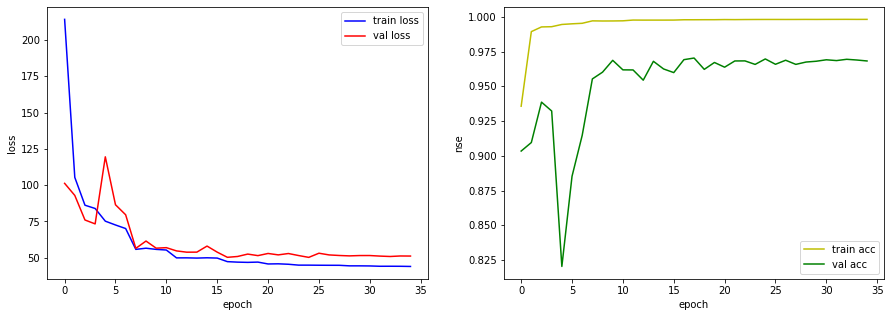

In [ ]:
## 학습 과정 시각화

fig, loss_ax = plt.subplots(1, 2)
fig.set_size_inches((15,5))

loss_ax[0].plot(history.history['loss'], 'b', label='train loss')
loss_ax[0].plot(history.history['val_loss'], 'r', label='val loss')

loss_ax[1].plot(history.history['nse'], 'y', label='train acc')
loss_ax[1].plot(history.history['val_nse'], 'g', label='val acc')

loss_ax[0].set_xlabel('epoch')
loss_ax[0].set_ylabel('loss')
loss_ax[1].set_xlabel('epoch')
loss_ax[1].set_ylabel('nse')

loss_ax[0].legend(loc='upper right')
loss_ax[1].legend(loc='lower right')

plt.show()

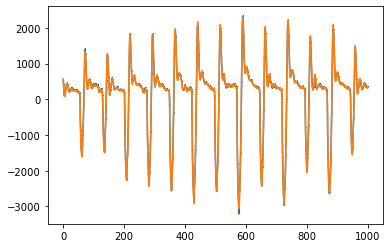

In [ ]:
## 결과 시각화
tl_predict = np.array(yhat)

plt.plot(ytest[:1000], marker = ",", label = "actual")
plt.plot(tl_predict.T[0][:1000], marker = ",", label="predict", alpha = 0.98)


plt.show()

In [ ]:
## 점수 확인
float(root_mean_squared_error(ytest, tl_predict))

46.53521552841579

## 파일 저장

In [ ]:
raw_data2 = pd.read_csv('data/rawdata.csv')
predict_dataset = raw_data2[['한강대교_유량']]

In [ ]:
predict_dataset.isnull().sum()

한강대교_유량    1279
dtype: int64

In [ ]:
predict_dataset.iloc[nanIndex[2]]

한강대교_유량   NaN
Name: 91354, dtype: float64

In [ ]:
y_real_predict

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([na

In [ ]:
test_input = np.array(x_real_predict)
y_real_hat = keras_model_best.predict(test_input, verbose=1)

40/40 [==============================] - 1s 4ms/step


In [ ]:
y_real_hat

array([[-422.4316 ],
       [-407.40195],
       [-338.65375],
       ...,
       [ 608.0371 ],
       [ 610.792  ],
       [ 595.67957]], dtype=float32)

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   한강대교_유량  275057 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [ ]:
for i in range(len(nanIndex)):
    predict_dataset.iloc[nanIndex[i]] = np.float64(y_real_hat[i])

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   한강대교_유량  276336 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [ ]:
predict_dataset.to_csv('data/한강대교_유량.csv', index = False, encoding = 'cp949', columns = ['한강대교_유량'])

# 수위 외 결측치 처리 - 강화대교 조위

In [ ]:
raw_data5 = pd.read_csv('data/한강대교_유량.csv', encoding = 'cp949')
raw_data5

,한강대교_유량
0,729.80
1,731.48
2,726.42
3,726.42
4,707.17
...,...
276331,-456.41
276332,-717.30
276333,-843.37
276334,-1023.37


In [ ]:
raw_data2 = pd.read_csv('data/newdata.csv', encoding = 'cp949')

In [ ]:
xdata = pd.concat([raw_data,raw_data2[['강수량(mm)','강화대교_조위','청담대교_유량']],raw_data3,raw_data4, raw_data5], axis = 1)
xdata

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),강화대교_조위,청담대교_유량,행주대교_유량,방류량,한강대교_유량
0,310.7,300.2,290.0,275.3,0.0,445.0,469.05,540.18,555.00,729.80
1,314.7,300.2,290.0,275.3,0.0,449.0,498.00,540.18,562.90,731.48
2,313.7,301.2,290.0,275.3,0.0,451.0,490.68,540.18,576.40,726.42
3,311.7,301.2,290.0,276.3,0.0,452.0,476.21,552.17,563.10,726.42
4,311.7,301.2,291.0,277.3,0.0,450.0,476.21,564.29,576.40,707.17
...,...,...,...,...,...,...,...,...,...,...
276331,288.0,295.0,299.0,306.0,0.0,510.0,319.84,974.40,259.23,-456.41
276332,287.0,303.0,304.0,308.0,0.0,492.0,314.01,1006.88,260.46,-717.30
276333,299.0,307.0,309.0,310.0,0.0,475.0,387.55,1039.90,259.37,-843.37
276334,309.0,311.0,314.0,312.0,0.0,458.0,454.91,1073.46,259.13,-1023.37


In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

input_x_regular = xdata.copy()

for i in range(len(xdata.columns)):
    scaler = MinMaxScaler()                       #StandardScaler() , MinMaxScaler() , RobustScaler()
    a=np.array(input_x_regular.iloc[:,i])
    tmp_x = scaler.fit_transform(a.reshape(-1,1))
    input_x_regular.iloc[:,i] = tmp_x

In [ ]:
input_x_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),강화대교_조위,청담대교_유량,행주대교_유량,방류량,한강대교_유량
0,0.049611,0.060000,0.051621,0.056478,0.0,0.118382,0.110974,0.011070,0.057689,0.147596
1,0.053502,0.060000,0.051621,0.056478,0.0,0.118713,0.112074,0.011070,0.057984,0.147654
2,0.052529,0.061111,0.051621,0.056478,0.0,0.118878,0.111796,0.011070,0.058488,0.147478
3,0.050584,0.061111,0.051621,0.058140,0.0,0.118961,0.111246,0.011475,0.057992,0.147478
4,0.050584,0.061111,0.052821,0.059801,0.0,0.118795,0.111246,0.011883,0.058488,0.146810
...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.123758,0.105305,0.025719,0.046645,0.106425
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.122269,0.105084,0.026815,0.046691,0.097370
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.120863,0.107878,0.027929,0.046650,0.092994
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.119457,0.110437,0.029061,0.046642,0.086747


In [ ]:
newdata = pd.read_csv('data/rawdata.csv')
ydata = newdata[['강화대교_조위']]
ydata

,강화대교_조위
0,445.0
1,449.0
2,451.0
3,452.0
4,450.0
...,...
276331,510.0
276332,492.0
276333,475.0
276334,458.0


In [ ]:
input_regular = pd.concat([input_x_regular, ydata], axis = 1)
input_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),강화대교_조위,청담대교_유량,행주대교_유량,방류량,한강대교_유량,강화대교_조위
0,0.049611,0.060000,0.051621,0.056478,0.0,0.118382,0.110974,0.011070,0.057689,0.147596,445.0
1,0.053502,0.060000,0.051621,0.056478,0.0,0.118713,0.112074,0.011070,0.057984,0.147654,449.0
2,0.052529,0.061111,0.051621,0.056478,0.0,0.118878,0.111796,0.011070,0.058488,0.147478,451.0
3,0.050584,0.061111,0.051621,0.058140,0.0,0.118961,0.111246,0.011475,0.057992,0.147478,452.0
4,0.050584,0.061111,0.052821,0.059801,0.0,0.118795,0.111246,0.011883,0.058488,0.146810,450.0
...,...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.123758,0.105305,0.025719,0.046645,0.106425,510.0
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.122269,0.105084,0.026815,0.046691,0.097370,492.0
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.120863,0.107878,0.027929,0.046650,0.092994,475.0
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.119457,0.110437,0.029061,0.046642,0.086747,458.0


In [ ]:
input_regular.isnull().sum()

청담대교_수위       0
잠수교_수위        0
한강대교_수위       0
행주대교_수위       0
강수량(mm)       0
강화대교_조위       0
청담대교_유량       0
행주대교_유량       0
방류량           0
한강대교_유량       0
강화대교_조위    4927
dtype: int64

In [ ]:
idx = ydata[ydata['강화대교_조위'].isnull()==True]['강화대교_조위'].index
idx

Int64Index([   193,    307,   1359,   1377,   1378,   1379,   1380,   1381,
              1382,   1383,
            ...
            265027, 265028, 265029, 266199, 266290, 267172, 270004, 270383,
            272504, 274258],
           dtype='int64', length=4927)

In [ ]:
nanIndex = idx

In [ ]:
from tqdm import tqdm

xdata = []
ydata = []
xdata_idx = []
ydata_idx = [-1]
for i in range(len(input_regular.columns)-len(ydata_idx)):
    xdata_idx.append(i)

w =  6 #window size

idx = []
for i in range(12):
  idx.append(i*26496)

for i in tqdm(range(11)):
    if i != 10:
        tmp = input_regular[idx[i]:idx[i+1]]
    else:
        tmp = input_regular[idx[i]:]

    for j in range(len(tmp)-w):
        xdata.append(np.array(tmp.iloc[j:j + w, xdata_idx]).astype(float))

    for j in range(w,len(tmp)):
        ydata.append(np.array(tmp.iloc[j, ydata_idx]).astype(float))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:37<00:00,  8.85s/it]


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(276270, 6, 10)
(276270, 1)


In [ ]:
# 나중에 학습된 모델에 이거 넣어서 predict해서 결측치 채우기
x_real_predict = []
y_real_predict = []

for i in range(len(nanIndex)):
    k = nanIndex[-(i+1)]
    
    x_real_predict.insert(0,(xdata[k - w * (k // 26496 + 1)]))
    y_real_predict.insert(0,(ydata[k - w * (k // 26496 + 1)]))
    
    xdata.pop(k - w * (k // 26496 + 1))
    ydata.pop(k - w * (k // 26496 + 1))

In [ ]:
print(np.array(x_real_predict).shape)
print(np.array(y_real_predict).shape)

(4927, 6, 10)
(4927, 1)


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(271343, 6, 10)
(271343, 1)


In [ ]:
pd.DataFrame(ydata).isnull().sum()

0    0
dtype: int64

In [ ]:
xtrain = np.array(xdata[:-40000])
ytrain = np.array(ydata[:-40000])

xtest = np.array(xdata[-40000:])
ytest = np.array(ydata[-40000:])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(231343, 6, 10)
(231343, 1)
(40000, 6, 10)
(40000, 1)


## 모델 생성

In [ ]:
def nse(y_true, y_pred):
    return (1-(K.sum((y_true-y_pred)**2)/K.sum((y_true-K.mean(y_true))**2)))

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

if 'model_enc_dec_cnn' in locals(): 
    del model_enc_dec_cnn 
if 'history' in locals():
    del history

optimizer = tf.keras.optimizers.Adam(lr=0.01) #기본값 0.001

model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu', input_shape=(w, xtrain.shape[2])))
#model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(MaxPooling1D(pool_size=2))
model_enc_dec_cnn.add(Flatten())

model_enc_dec_cnn.add(RepeatVector(1))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu'))

model_enc_dec_cnn.add(Dense(100, activation='relu'))
model_enc_dec_cnn.add(Dense(1))

model_enc_dec_cnn.compile(loss=root_mean_squared_error, optimizer=optimizer, metrics =[nse])

model_enc_dec_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 6, 64)             1344      
                                                                 
 flatten_8 (Flatten)         (None, 384)               0         
                                                                 
 repeat_vector_8 (RepeatVect  (None, 1, 384)           0         
 or)                                                             
                                                                 
 lstm_24 (LSTM)              (None, 1, 200)            468000    
                                                                 
 lstm_25 (LSTM)              (None, 1, 200)            320800    
                                                                 
 lstm_26 (LSTM)              (None, 200)               320800    
                                                      

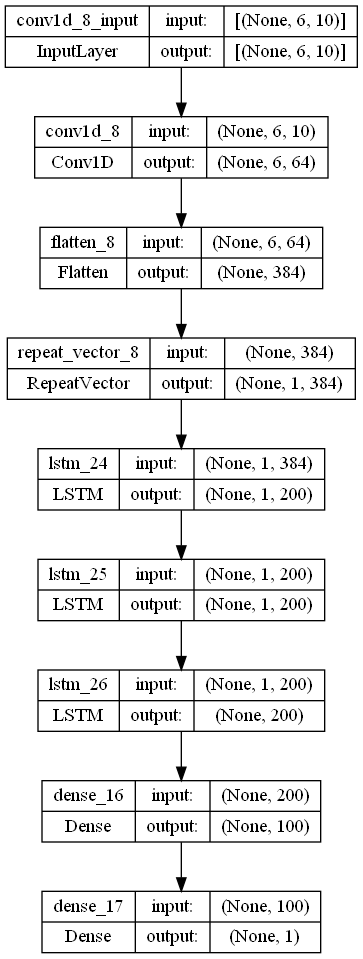

In [ ]:
plot_model(model=model_enc_dec_cnn, show_shapes=True)

In [ ]:
epochs = 100
batch_size = xtrain.shape[0] // 1000
validation = 0.2

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=False, monitor='val_loss',
                                         mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')
rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=3, min_lr=1e-10)

In [ ]:
## 학습

history = model_enc_dec_cnn.fit(xtrain, ytrain, verbose=1, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])

Epoch 1/100
802/802 [==============================] - 29s 31ms/step - loss: 64.6723 - nse: 0.7618 - val_loss: 26.9530 - val_nse: 0.9645 - lr: 0.0100
Epoch 2/100
802/802 [==============================] - 24s 29ms/step - loss: 30.0847 - nse: 0.9567 - val_loss: 37.4487 - val_nse: 0.9418 - lr: 0.0100
Epoch 3/100
802/802 [==============================] - 24s 29ms/step - loss: 23.7450 - nse: 0.9738 - val_loss: 74.3478 - val_nse: 0.7902 - lr: 0.0100
Epoch 4/100
802/802 [==============================] - 23s 29ms/step - loss: 18.5828 - nse: 0.9853 - val_loss: 26.9859 - val_nse: 0.9685 - lr: 0.0100
Epoch 5/100
802/802 [==============================] - 24s 29ms/step - loss: 9.5178 - nse: 0.9960 - val_loss: 7.2704 - val_nse: 0.9969 - lr: 0.0050
Epoch 6/100
802/802 [==============================] - 23s 29ms/step - loss: 9.0440 - nse: 0.9961 - val_loss: 5.4825 - val_nse: 0.9985 - lr: 0.0050
Epoch 7/100
802/802 [==============================] - 23s 29ms/step - loss: 11.2377 - nse: 0.9943 - val

In [ ]:
## 평가

keras_model_best = keras.models.load_model('best_model.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error, 'nse':nse})

yhat = keras_model_best.predict(xtest, verbose=1)

keras_model_best.evaluate(xtest,ytest)

1250/1250 [==============================] - 6s 5ms/step - loss: 2.1634 - nse: 0.9992


[2.163403272628784, 0.9991748929023743]

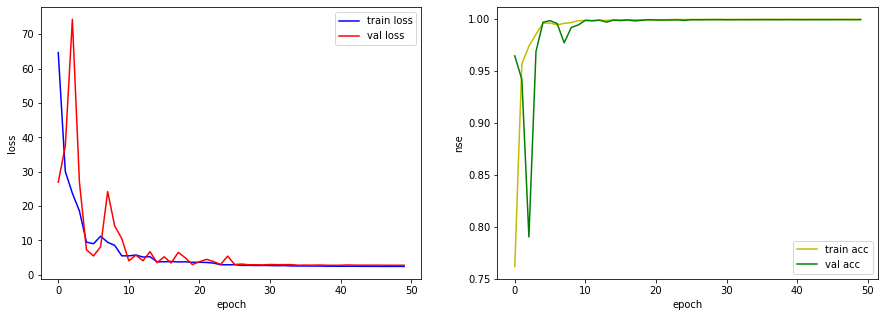

In [ ]:
## 학습 과정 시각화

fig, loss_ax = plt.subplots(1, 2)
fig.set_size_inches((15,5))

loss_ax[0].plot(history.history['loss'], 'b', label='train loss')
loss_ax[0].plot(history.history['val_loss'], 'r', label='val loss')

loss_ax[1].plot(history.history['nse'], 'y', label='train acc')
loss_ax[1].plot(history.history['val_nse'], 'g', label='val acc')

loss_ax[0].set_xlabel('epoch')
loss_ax[0].set_ylabel('loss')
loss_ax[1].set_xlabel('epoch')
loss_ax[1].set_ylabel('nse')

loss_ax[0].legend(loc='upper right')
loss_ax[1].legend(loc='lower right')

plt.show()

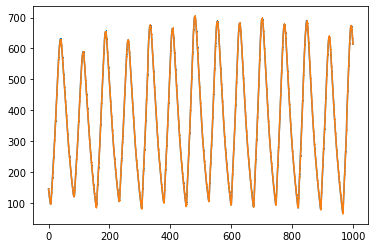

In [ ]:
## 결과 시각화
tl_predict = np.array(yhat)

plt.plot(ytest[:1000], marker = ",", label = "actual")
plt.plot(tl_predict.T[0][:1000], marker = ",", label="predict", alpha = 0.98)


plt.show()

In [ ]:
## 점수 확인
float(root_mean_squared_error(ytest, tl_predict))

2.4342167323209174

## 파일 저장

In [ ]:
raw_data2 = pd.read_csv('data/rawdata.csv')
predict_dataset = raw_data2[['강화대교_조위']]

In [ ]:
predict_dataset.isnull().sum()

강화대교_조위    4927
dtype: int64

In [ ]:
predict_dataset.iloc[nanIndex[2]]

강화대교_조위   NaN
Name: 1359, dtype: float64

In [ ]:
y_real_predict

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([na

In [ ]:
test_input = np.array(x_real_predict)
y_real_hat = keras_model_best.predict(test_input, verbose=1)

154/154 [==============================] - 1s 5ms/step


In [ ]:
y_real_hat

array([[131.65527],
       [556.96875],
       [582.6185 ],
       ...,
       [235.86409],
       [326.25107],
       [277.9791 ]], dtype=float32)

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   강화대교_조위  271409 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [ ]:
for i in range(len(nanIndex)):
    predict_dataset.iloc[nanIndex[i]] = np.float64(y_real_hat[i])

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   강화대교_조위  276336 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [ ]:
predict_dataset.to_csv('data/강화대교_조위.csv', index = False, encoding = 'cp949', columns = ['강화대교_조위'])

# 수위 외 결측치 처리 - 청담대교 유량

In [ ]:
raw_data6 = pd.read_csv('data/강화대교_조위.csv', encoding = 'cp949')
raw_data6

,강화대교_조위
0,445.0
1,449.0
2,451.0
3,452.0
4,450.0
...,...
276331,510.0
276332,492.0
276333,475.0
276334,458.0


In [ ]:
raw_data2 = pd.read_csv('data/newdata.csv', encoding = 'cp949')

In [ ]:
xdata = pd.concat([raw_data,raw_data2[['강수량(mm)','청담대교_유량']],raw_data3,raw_data4, raw_data5,raw_data6], axis = 1)
xdata

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),청담대교_유량,행주대교_유량,방류량,한강대교_유량,강화대교_조위
0,310.7,300.2,290.0,275.3,0.0,469.05,540.18,555.00,729.80,445.0
1,314.7,300.2,290.0,275.3,0.0,498.00,540.18,562.90,731.48,449.0
2,313.7,301.2,290.0,275.3,0.0,490.68,540.18,576.40,726.42,451.0
3,311.7,301.2,290.0,276.3,0.0,476.21,552.17,563.10,726.42,452.0
4,311.7,301.2,291.0,277.3,0.0,476.21,564.29,576.40,707.17,450.0
...,...,...,...,...,...,...,...,...,...,...
276331,288.0,295.0,299.0,306.0,0.0,319.84,974.40,259.23,-456.41,510.0
276332,287.0,303.0,304.0,308.0,0.0,314.01,1006.88,260.46,-717.30,492.0
276333,299.0,307.0,309.0,310.0,0.0,387.55,1039.90,259.37,-843.37,475.0
276334,309.0,311.0,314.0,312.0,0.0,454.91,1073.46,259.13,-1023.37,458.0


In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

input_x_regular = xdata.copy()

for i in range(len(xdata.columns)):
    scaler = MinMaxScaler()                       #StandardScaler() , MinMaxScaler() , RobustScaler()
    a=np.array(input_x_regular.iloc[:,i])
    tmp_x = scaler.fit_transform(a.reshape(-1,1))
    input_x_regular.iloc[:,i] = tmp_x

In [ ]:
input_x_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),청담대교_유량,행주대교_유량,방류량,한강대교_유량,강화대교_조위
0,0.049611,0.060000,0.051621,0.056478,0.0,0.110974,0.011070,0.057689,0.147596,0.374042
1,0.053502,0.060000,0.051621,0.056478,0.0,0.112074,0.011070,0.057984,0.147654,0.377714
2,0.052529,0.061111,0.051621,0.056478,0.0,0.111796,0.011070,0.058488,0.147478,0.379550
3,0.050584,0.061111,0.051621,0.058140,0.0,0.111246,0.011475,0.057992,0.147478,0.380468
4,0.050584,0.061111,0.052821,0.059801,0.0,0.111246,0.011883,0.058488,0.146810,0.378632
...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.105305,0.025719,0.046645,0.106425,0.433715
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.105084,0.026815,0.046691,0.097370,0.417190
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.107878,0.027929,0.046650,0.092994,0.401583
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.110437,0.029061,0.046642,0.086747,0.385976


In [ ]:
newdata = pd.read_csv('data/rawdata.csv')
ydata = newdata[['청담대교_유량']]
ydata

,청담대교_유량
0,469.05
1,498.00
2,490.68
3,476.21
4,476.21
...,...
276331,319.84
276332,314.01
276333,387.55
276334,454.91


In [ ]:
input_regular = pd.concat([input_x_regular, ydata], axis = 1)
input_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),청담대교_유량,행주대교_유량,방류량,한강대교_유량,강화대교_조위,청담대교_유량
0,0.049611,0.060000,0.051621,0.056478,0.0,0.110974,0.011070,0.057689,0.147596,0.374042,469.05
1,0.053502,0.060000,0.051621,0.056478,0.0,0.112074,0.011070,0.057984,0.147654,0.377714,498.00
2,0.052529,0.061111,0.051621,0.056478,0.0,0.111796,0.011070,0.058488,0.147478,0.379550,490.68
3,0.050584,0.061111,0.051621,0.058140,0.0,0.111246,0.011475,0.057992,0.147478,0.380468,476.21
4,0.050584,0.061111,0.052821,0.059801,0.0,0.111246,0.011883,0.058488,0.146810,0.378632,476.21
...,...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.105305,0.025719,0.046645,0.106425,0.433715,319.84
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.105084,0.026815,0.046691,0.097370,0.417190,314.01
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.107878,0.027929,0.046650,0.092994,0.401583,387.55
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.110437,0.029061,0.046642,0.086747,0.385976,454.91


In [ ]:
input_regular.isnull().sum()

청담대교_수위        0
잠수교_수위         0
한강대교_수위        0
행주대교_수위        0
강수량(mm)        0
청담대교_유량        0
행주대교_유량        0
방류량            0
한강대교_유량        0
강화대교_조위        0
청담대교_유량    16380
dtype: int64

In [ ]:
idx = ydata[ydata['청담대교_유량'].isnull()==True]['청담대교_유량'].index
idx

Int64Index([ 80994,  80995,  80996,  80997,  80998,  80999,  81000,  81001,
             81002,  81003,
            ...
            273770, 273771, 273772, 273773, 273774, 273775, 273776, 273777,
            273778, 273779],
           dtype='int64', length=16380)

In [ ]:
nanIndex = idx

In [ ]:
from tqdm import tqdm

xdata = []
ydata = []
xdata_idx = []
ydata_idx = [-1]
for i in range(len(input_regular.columns)-len(ydata_idx)):
    xdata_idx.append(i)

w =  6 #window size

idx = []
for i in range(12):
  idx.append(i*26496)

for i in tqdm(range(11)):
    if i != 10:
        tmp = input_regular[idx[i]:idx[i+1]]
    else:
        tmp = input_regular[idx[i]:]

    for j in range(len(tmp)-w):
        xdata.append(np.array(tmp.iloc[j:j + w, xdata_idx]).astype(float))

    for j in range(w,len(tmp)):
        ydata.append(np.array(tmp.iloc[j, ydata_idx]).astype(float))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:39<00:00,  9.06s/it]


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(276270, 6, 10)
(276270, 1)


In [ ]:
# 나중에 학습된 모델에 이거 넣어서 predict해서 결측치 채우기
x_real_predict = []
y_real_predict = []

for i in range(len(nanIndex)):
    k = nanIndex[-(i+1)]
    
    x_real_predict.insert(0,(xdata[k - w * (k // 26496 + 1)]))
    y_real_predict.insert(0,(ydata[k - w * (k // 26496 + 1)]))
    
    xdata.pop(k - w * (k // 26496 + 1))
    ydata.pop(k - w * (k // 26496 + 1))

In [ ]:
print(np.array(x_real_predict).shape)
print(np.array(y_real_predict).shape)

(16380, 6, 10)
(16380, 1)


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(259890, 6, 10)
(259890, 1)


In [ ]:
pd.DataFrame(ydata).isnull().sum()

0    0
dtype: int64

In [ ]:
xtrain = np.array(xdata[:-40000])
ytrain = np.array(ydata[:-40000])

xtest = np.array(xdata[-40000:])
ytest = np.array(ydata[-40000:])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(219890, 6, 10)
(219890, 1)
(40000, 6, 10)
(40000, 1)


## 모델 생성

In [ ]:
def nse(y_true, y_pred):
    return (1-(K.sum((y_true-y_pred)**2)/K.sum((y_true-K.mean(y_true))**2)))

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

if 'model_enc_dec_cnn' in locals(): 
    del model_enc_dec_cnn 
if 'history' in locals():
    del history

optimizer = tf.keras.optimizers.Adam(lr=0.01) #기본값 0.001

model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu', input_shape=(w, xtrain.shape[2])))
#model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(MaxPooling1D(pool_size=2))
model_enc_dec_cnn.add(Flatten())

model_enc_dec_cnn.add(RepeatVector(1))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu'))

model_enc_dec_cnn.add(Dense(100, activation='relu'))
model_enc_dec_cnn.add(Dense(1))

model_enc_dec_cnn.compile(loss=root_mean_squared_error, optimizer=optimizer, metrics =[nse])

model_enc_dec_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 6, 64)             1344      
                                                                 
 flatten_9 (Flatten)         (None, 384)               0         
                                                                 
 repeat_vector_9 (RepeatVect  (None, 1, 384)           0         
 or)                                                             
                                                                 
 lstm_27 (LSTM)              (None, 1, 200)            468000    
                                                                 
 lstm_28 (LSTM)              (None, 1, 200)            320800    
                                                                 
 lstm_29 (LSTM)              (None, 200)               320800    
                                                      

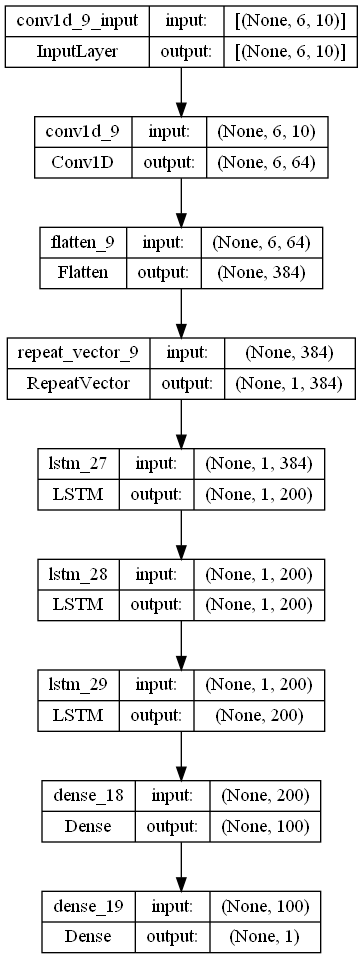

In [ ]:
plot_model(model=model_enc_dec_cnn, show_shapes=True)

In [ ]:
epochs = 100
batch_size = xtrain.shape[0] // 1000
validation = 0.2

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=False, monitor='val_loss',
                                         mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')
rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=3, min_lr=1e-10)

In [ ]:
## 학습

history = model_enc_dec_cnn.fit(xtrain, ytrain, verbose=1, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])

Epoch 1/100
804/804 [==============================] - 38s 40ms/step - loss: 134.6102 - nse: 0.9553 - val_loss: 68.7916 - val_nse: 0.8104 - lr: 0.0100
Epoch 2/100
804/804 [==============================] - 32s 39ms/step - loss: 85.0335 - nse: 0.9877 - val_loss: 92.4545 - val_nse: -0.5450 - lr: 0.0100
Epoch 3/100
804/804 [==============================] - 31s 39ms/step - loss: 67.4624 - nse: 0.9919 - val_loss: 40.3458 - val_nse: 0.9007 - lr: 0.0100
Epoch 4/100
804/804 [==============================] - 31s 39ms/step - loss: 61.2774 - nse: 0.9936 - val_loss: 63.5854 - val_nse: 0.3779 - lr: 0.0100
Epoch 5/100
804/804 [==============================] - 32s 39ms/step - loss: 55.4871 - nse: 0.9947 - val_loss: 55.0550 - val_nse: 0.5842 - lr: 0.0100
Epoch 6/100
804/804 [==============================] - 32s 40ms/step - loss: 50.2955 - nse: 0.9960 - val_loss: 23.9326 - val_nse: 0.9459 - lr: 0.0100
Epoch 7/100
804/804 [==============================] - 31s 39ms/step - loss: 50.0083 - nse: 0.9957

In [ ]:
## 평가

keras_model_best = keras.models.load_model('best_model.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error, 'nse':nse})

yhat = keras_model_best.predict(xtest, verbose=1)

keras_model_best.evaluate(xtest,ytest)

1250/1250 [==============================] - 26s 19ms/step - loss: 15.6026 - nse: 0.3410


[15.602566719055176, 0.34102684259414673]

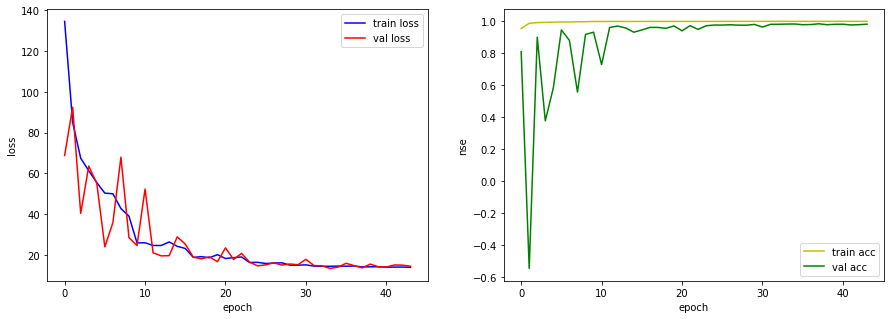

In [ ]:
## 학습 과정 시각화

fig, loss_ax = plt.subplots(1, 2)
fig.set_size_inches((15,5))

loss_ax[0].plot(history.history['loss'], 'b', label='train loss')
loss_ax[0].plot(history.history['val_loss'], 'r', label='val loss')

loss_ax[1].plot(history.history['nse'], 'y', label='train acc')
loss_ax[1].plot(history.history['val_nse'], 'g', label='val acc')

loss_ax[0].set_xlabel('epoch')
loss_ax[0].set_ylabel('loss')
loss_ax[1].set_xlabel('epoch')
loss_ax[1].set_ylabel('nse')

loss_ax[0].legend(loc='upper right')
loss_ax[1].legend(loc='lower right')

plt.show()

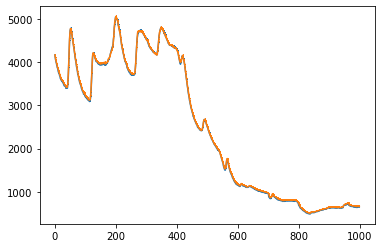

In [ ]:
## 결과 시각화
tl_predict = np.array(yhat)

plt.plot(ytest[:1000], marker = ",", label = "actual")
plt.plot(tl_predict.T[0][:1000], marker = ",", label="predict", alpha = 0.98)


plt.show()

In [ ]:
## 점수 확인
float(root_mean_squared_error(ytest, tl_predict))

31.51980254935077

## 파일 저장

In [ ]:
raw_data2 = pd.read_csv('data/rawdata.csv')
predict_dataset = raw_data2[['청담대교_유량']]

In [ ]:
predict_dataset.isnull().sum()

청담대교_유량    16380
dtype: int64

In [ ]:
predict_dataset.iloc[nanIndex[2]]

청담대교_유량   NaN
Name: 80996, dtype: float64

In [ ]:
y_real_predict

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([na

In [ ]:
test_input = np.array(x_real_predict)
y_real_hat = keras_model_best.predict(test_input, verbose=1)

512/512 [==============================] - 11s 18ms/step


In [ ]:
y_real_hat

array([[  245.97386],
       [  244.71916],
       [  244.81357],
       ...,
       [14273.685  ],
       [14277.601  ],
       [14279.1875 ]], dtype=float32)

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   청담대교_유량  259956 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [ ]:
for i in range(len(nanIndex)):
    predict_dataset.iloc[nanIndex[i]] = np.float64(y_real_hat[i])

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   청담대교_유량  276336 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [ ]:
predict_dataset.to_csv('data/청담대교_유량.csv', index = False, encoding = 'cp949', columns = ['청담대교_유량'])

# 수위 외 결측치 처리 - 광진교 수위

In [ ]:
raw_data7 = pd.read_csv('data/청담대교_유량.csv', encoding = 'cp949')
raw_data7

In [ ]:
raw_data2 = pd.read_csv('data/newdata.csv', encoding = 'cp949')

In [ ]:
xdata = pd.concat([raw_data,raw_data2[['강수량(mm)','광진교_수위']],raw_data3,raw_data4, raw_data5,raw_data6,raw_data7], axis = 1)
xdata

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),광진교_수위,행주대교_유량,방류량,한강대교_유량,강화대교_조위,청담대교_유량
0,310.7,300.2,290.0,275.3,0.0,1.20,540.18,555.00,729.80,445.0,469.05
1,314.7,300.2,290.0,275.3,0.0,1.20,540.18,562.90,731.48,449.0,498.00
2,313.7,301.2,290.0,275.3,0.0,1.20,540.18,576.40,726.42,451.0,490.68
3,311.7,301.2,290.0,276.3,0.0,1.20,552.17,563.10,726.42,452.0,476.21
4,311.7,301.2,291.0,277.3,0.0,1.20,564.29,576.40,707.17,450.0,476.21
...,...,...,...,...,...,...,...,...,...,...,...
276331,288.0,295.0,299.0,306.0,0.0,1.12,974.40,259.23,-456.41,510.0,319.84
276332,287.0,303.0,304.0,308.0,0.0,1.12,1006.88,260.46,-717.30,492.0,314.01
276333,299.0,307.0,309.0,310.0,0.0,1.12,1039.90,259.37,-843.37,475.0,387.55
276334,309.0,311.0,314.0,312.0,0.0,1.12,1073.46,259.13,-1023.37,458.0,454.91


In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

input_x_regular = xdata.copy()

for i in range(len(xdata.columns)):
    scaler = MinMaxScaler()                       #StandardScaler() , MinMaxScaler() , RobustScaler()
    a=np.array(input_x_regular.iloc[:,i])
    tmp_x = scaler.fit_transform(a.reshape(-1,1))
    input_x_regular.iloc[:,i] = tmp_x

In [ ]:
input_x_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),광진교_수위,행주대교_유량,방류량,한강대교_유량,강화대교_조위,청담대교_유량
0,0.049611,0.060000,0.051621,0.056478,0.0,0.056452,0.011070,0.057689,0.147596,0.374042,0.017323
1,0.053502,0.060000,0.051621,0.056478,0.0,0.056452,0.011070,0.057984,0.147654,0.377714,0.019365
2,0.052529,0.061111,0.051621,0.056478,0.0,0.056452,0.011070,0.058488,0.147478,0.379550,0.018849
3,0.050584,0.061111,0.051621,0.058140,0.0,0.056452,0.011475,0.057992,0.147478,0.380468,0.017828
4,0.050584,0.061111,0.052821,0.059801,0.0,0.056452,0.011883,0.058488,0.146810,0.378632,0.017828
...,...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.045699,0.025719,0.046645,0.106425,0.433715,0.006797
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.045699,0.026815,0.046691,0.097370,0.417190,0.006386
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.045699,0.027929,0.046650,0.092994,0.401583,0.011574
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.045699,0.029061,0.046642,0.086747,0.385976,0.016326


In [ ]:
newdata = pd.read_csv('data/외부데이터/광진교_수위.csv', encoding = 'cp949')
ydata = newdata[['광진교_수위']]
ydata

,광진교_수위
0,1.2
1,1.2
2,1.2
3,1.2
4,1.2
...,...
276331,1.12
276332,1.12
276333,1.12
276334,1.12


In [ ]:
idx = ydata[ydata['광진교_수위'] == '-']['광진교_수위'].index
idx

Int64Index([140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620,
            140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628,
            140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636,
            140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644,
            140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652,
            140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660,
            140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668,
            140669, 140670, 236080],
           dtype='int64')

In [ ]:
import numpy as np
for i in idx:
    ydata.loc[i,'광진교_수위']=np.NaN
ydata

,광진교_수위
0,1.2
1,1.2
2,1.2
3,1.2
4,1.2
...,...
276331,1.12
276332,1.12
276333,1.12
276334,1.12


In [ ]:
input_regular = pd.concat([input_x_regular, ydata], axis = 1)
input_regular

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,강수량(mm),광진교_수위,행주대교_유량,방류량,한강대교_유량,강화대교_조위,청담대교_유량,광진교_수위
0,0.049611,0.060000,0.051621,0.056478,0.0,0.056452,0.011070,0.057689,0.147596,0.374042,0.017323,1.2
1,0.053502,0.060000,0.051621,0.056478,0.0,0.056452,0.011070,0.057984,0.147654,0.377714,0.019365,1.2
2,0.052529,0.061111,0.051621,0.056478,0.0,0.056452,0.011070,0.058488,0.147478,0.379550,0.018849,1.2
3,0.050584,0.061111,0.051621,0.058140,0.0,0.056452,0.011475,0.057992,0.147478,0.380468,0.017828,1.2
4,0.050584,0.061111,0.052821,0.059801,0.0,0.056452,0.011883,0.058488,0.146810,0.378632,0.017828,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
276331,0.027529,0.054222,0.062425,0.107475,0.0,0.045699,0.025719,0.046645,0.106425,0.433715,0.006797,1.12
276332,0.026556,0.063111,0.068427,0.110797,0.0,0.045699,0.026815,0.046691,0.097370,0.417190,0.006386,1.12
276333,0.038230,0.067556,0.074430,0.114120,0.0,0.045699,0.027929,0.046650,0.092994,0.401583,0.011574,1.12
276334,0.047957,0.072000,0.080432,0.117442,0.0,0.045699,0.029061,0.046642,0.086747,0.385976,0.016326,1.12


In [ ]:
input_regular.isnull().sum()

청담대교_수위     0
잠수교_수위      0
한강대교_수위     0
행주대교_수위     0
강수량(mm)     0
광진교_수위      0
행주대교_유량     0
방류량         0
한강대교_유량     0
강화대교_조위     0
청담대교_유량     0
광진교_수위     59
dtype: int64

In [ ]:
idx = ydata[ydata['광진교_수위'].isnull()==True]['광진교_수위'].index
idx

Int64Index([140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620,
            140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628,
            140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636,
            140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644,
            140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652,
            140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660,
            140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668,
            140669, 140670, 236080],
           dtype='int64')

In [ ]:
nanIndex = idx

In [ ]:
from tqdm import tqdm

xdata = []
ydata = []
xdata_idx = []
ydata_idx = [-1]
for i in range(len(input_regular.columns)-len(ydata_idx)):
    xdata_idx.append(i)

w =  6 #window size

idx = []
for i in range(12):
  idx.append(i*26496)

for i in tqdm(range(11)):
    if i != 10:
        tmp = input_regular[idx[i]:idx[i+1]]
    else:
        tmp = input_regular[idx[i]:]

    for j in range(len(tmp)-w):
        xdata.append(np.array(tmp.iloc[j:j + w, xdata_idx]).astype(float))

    for j in range(w,len(tmp)):
        ydata.append(np.array(tmp.iloc[j, ydata_idx]).astype(float))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:37<00:00,  8.82s/it]


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(276270, 6, 11)
(276270, 1)


In [ ]:
# 나중에 학습된 모델에 이거 넣어서 predict해서 결측치 채우기
x_real_predict = []
y_real_predict = []

for i in range(len(nanIndex)):
    k = nanIndex[-(i+1)]
    
    x_real_predict.insert(0,(xdata[k - w * (k // 26496 + 1)]))
    y_real_predict.insert(0,(ydata[k - w * (k // 26496 + 1)]))
    
    xdata.pop(k - w * (k // 26496 + 1))
    ydata.pop(k - w * (k // 26496 + 1))

In [ ]:
print(np.array(x_real_predict).shape)
print(np.array(y_real_predict).shape)

(59, 6, 11)
(59, 1)


In [ ]:
print(np.array(xdata).shape)
print(np.array(ydata).shape)

(276211, 6, 11)
(276211, 1)


In [ ]:
pd.DataFrame(ydata).isnull().sum()

0    0
dtype: int64

In [ ]:
xtrain = np.array(xdata[:-40000])
ytrain = np.array(ydata[:-40000])

xtest = np.array(xdata[-40000:])
ytest = np.array(ydata[-40000:])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(236211, 6, 11)
(236211, 1)
(40000, 6, 11)
(40000, 1)


## 모델 생성

In [ ]:
def nse(y_true, y_pred):
    return (1-(K.sum((y_true-y_pred)**2)/K.sum((y_true-K.mean(y_true))**2)))

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

if 'model_enc_dec_cnn' in locals(): 
    del model_enc_dec_cnn 
if 'history' in locals():
    del history

optimizer = tf.keras.optimizers.Adam(lr=0.01) #기본값 0.001

model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu', input_shape=(w, xtrain.shape[2])))
#model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(MaxPooling1D(pool_size=2))
model_enc_dec_cnn.add(Flatten())

model_enc_dec_cnn.add(RepeatVector(1))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu'))

model_enc_dec_cnn.add(Dense(100, activation='relu'))
model_enc_dec_cnn.add(Dense(1))

model_enc_dec_cnn.compile(loss=root_mean_squared_error, optimizer=optimizer, metrics =[nse])

model_enc_dec_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             1472      
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 384)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 1, 200)            468000    
                                                                 
 lstm_1 (LSTM)               (None, 1, 200)            320800    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                        

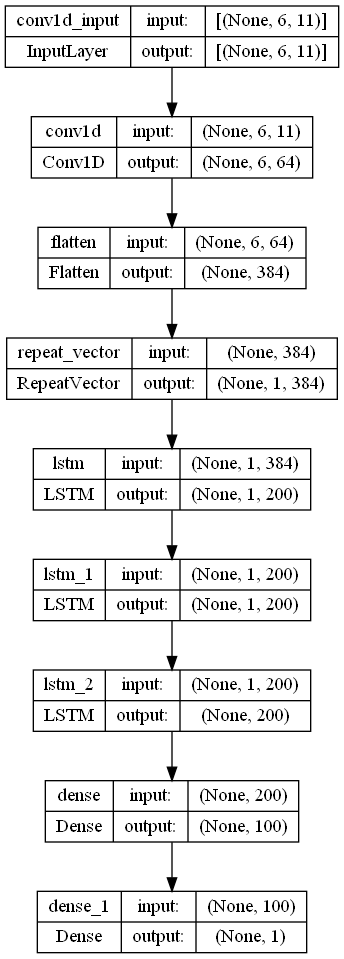

In [ ]:
plot_model(model=model_enc_dec_cnn, show_shapes=True)

In [ ]:
epochs = 100
batch_size = xtrain.shape[0] // 1000
validation = 0.2

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=False, monitor='val_loss',
                                         mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')
rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=3, min_lr=1e-10)

In [ ]:
## 학습

history = model_enc_dec_cnn.fit(xtrain, ytrain, verbose=1, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])

Epoch 1/100
801/801 [==============================] - 20s 19ms/step - loss: 0.0648 - nse: 0.7086 - val_loss: 0.0255 - val_nse: -61586028.0000 - lr: 0.0100
Epoch 2/100
801/801 [==============================] - 17s 22ms/step - loss: 0.0259 - nse: 0.9853 - val_loss: 0.0900 - val_nse: -2324682240.0000 - lr: 0.0100
Epoch 3/100
801/801 [==============================] - 20s 25ms/step - loss: 0.0200 - nse: 0.9911 - val_loss: 0.0226 - val_nse: -102228240.0000 - lr: 0.0100
Epoch 4/100
801/801 [==============================] - 19s 24ms/step - loss: 0.0190 - nse: 0.9920 - val_loss: 0.0239 - val_nse: -31176648.0000 - lr: 0.0100
Epoch 5/100
801/801 [==============================] - 19s 24ms/step - loss: 0.0172 - nse: 0.9930 - val_loss: 0.0173 - val_nse: -5375788.0000 - lr: 0.0100
Epoch 6/100
801/801 [==============================] - 19s 24ms/step - loss: 0.0144 - nse: 0.9954 - val_loss: 0.0172 - val_nse: -94623416.0000 - lr: 0.0100
Epoch 7/100
801/801 [==============================] - 19s 24m

In [ ]:
## 평가

keras_model_best = keras.models.load_model('best_model.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error, 'nse':nse})

yhat = keras_model_best.predict(xtest, verbose=1)

keras_model_best.evaluate(xtest,ytest)

1250/1250 [==============================] - 7s 5ms/step - loss: 0.0065 - nse: -inf


[0.006504676770418882, -inf]

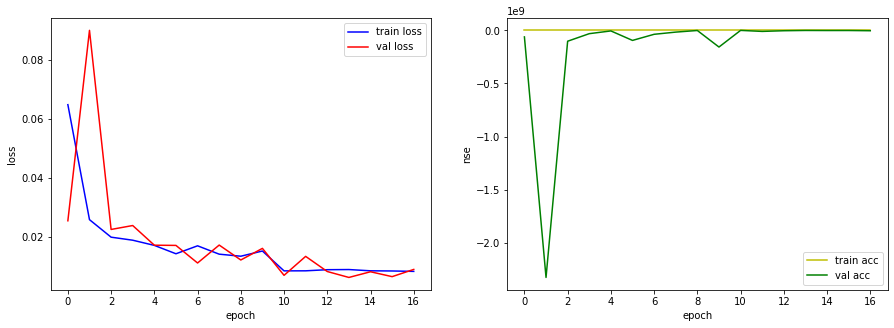

In [ ]:
## 학습 과정 시각화

fig, loss_ax = plt.subplots(1, 2)
fig.set_size_inches((15,5))

loss_ax[0].plot(history.history['loss'], 'b', label='train loss')
loss_ax[0].plot(history.history['val_loss'], 'r', label='val loss')

loss_ax[1].plot(history.history['nse'], 'y', label='train acc')
loss_ax[1].plot(history.history['val_nse'], 'g', label='val acc')

loss_ax[0].set_xlabel('epoch')
loss_ax[0].set_ylabel('loss')
loss_ax[1].set_xlabel('epoch')
loss_ax[1].set_ylabel('nse')

loss_ax[0].legend(loc='upper right')
loss_ax[1].legend(loc='lower right')

plt.show()

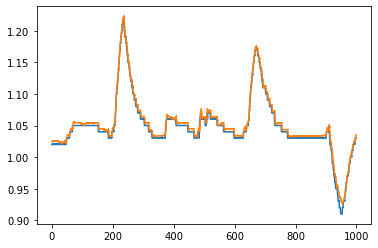

In [ ]:
## 결과 시각화
tl_predict = np.array(yhat)

plt.plot(ytest[:1000], marker = ",", label = "actual")
plt.plot(tl_predict.T[0][:1000], marker = ",", label="predict", alpha = 0.98)


plt.show()

In [ ]:
## 점수 확인
float(root_mean_squared_error(ytest, tl_predict))

0.009270081071076755

## 파일 저장

In [ ]:
newdata = pd.read_csv('data/외부데이터/광진교_수위.csv', encoding = 'cp949')
predict_dataset = newdata[['광진교_수위']]

idx = newdata[newdata['광진교_수위'] == '-']['광진교_수위'].index

import numpy as np
for i in idx:
    newdata.loc[i,'광진교_수위']=np.NaN
predict_dataset = newdata[['광진교_수위']]

In [ ]:
predict_dataset.isnull().sum()

광진교_수위    59
dtype: int64

In [ ]:
predict_dataset.iloc[nanIndex[2]]

광진교_수위    NaN
Name: 140615, dtype: object

In [ ]:
y_real_predict

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan])]

In [ ]:
test_input = np.array(x_real_predict)
y_real_hat = keras_model_best.predict(test_input, verbose=1)

2/2 [==============================] - 0s 5ms/step


In [ ]:
y_real_hat

array([[0.9816177 ],
       [0.981897  ],
       [0.9819056 ],
       [0.9815781 ],
       [0.98090386],
       [0.97997886],
       [0.97936314],
       [0.9789423 ],
       [0.97874296],
       [0.9783783 ],
       [0.9780024 ],
       [0.9777158 ],
       [0.97739613],
       [0.977113  ],
       [0.97690934],
       [0.9767588 ],
       [0.9766209 ],
       [0.9766004 ],
       [0.9764542 ],
       [0.9762924 ],
       [0.97614694],
       [0.97586054],
       [0.97556746],
       [0.975381  ],
       [0.9750755 ],
       [0.97468185],
       [0.9744627 ],
       [0.97433597],
       [0.9741786 ],
       [0.97408134],
       [0.9740828 ],
       [0.97409546],
       [0.9740062 ],
       [0.97396016],
       [0.97424084],
       [0.9747415 ],
       [0.97536933],
       [0.9758918 ],
       [0.97619647],
       [0.97642684],
       [0.97664857],
       [0.9770886 ],
       [0.9777279 ],
       [0.97848225],
       [0.97914463],
       [0.97980076],
       [0.98081374],
       [0.981

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   광진교_수위  276277 non-null  object
dtypes: object(1)
memory usage: 2.1+ MB


In [ ]:
for i in range(len(nanIndex)):
    predict_dataset.iloc[nanIndex[i]] = np.float64(y_real_hat[i])

In [ ]:
predict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   광진교_수위  276336 non-null  object
dtypes: object(1)
memory usage: 2.1+ MB


In [ ]:
predict_dataset.to_csv('data/광진교_수위.csv', index = False, encoding = 'cp949', columns = ['광진교_수위'])

# < Chapter 4 >모델 생성 및 학습

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

import time
from glob import glob
from tqdm import tqdm
from permetrics.regression import RegressionMetric

import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras import backend as K
from keras.utils import plot_model
from tensorflow.keras.layers import InputLayer

from keras.layers import Activation, Dense, LSTM, GRU, Bidirectional, AveragePooling1D, GlobalAveragePooling1D, Dropout, Flatten, BatchNormalization, TimeDistributed, Input, Reshape, RepeatVector, Concatenate, GlobalMaxPooling1D 
from keras.layers.convolutional import Conv1D, MaxPooling1D, AveragePooling1D
from sklearn.metrics import r2_score

#GPU 자원이 부족
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
#최종 data 만들기
rawdata = pd.read_csv('data/rawdata_arima.csv', encoding = 'cp949')
rawdata

,Unnamed: 0,날짜,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,광진교_수위
0,0,2012-05-01 00:00:00,0.0,555.00,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,1.20
1,1,2012-05-01 00:10:00,0.0,562.90,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,1.20
2,2,2012-05-01 00:20:00,0.0,576.40,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,1.20
3,3,2012-05-01 00:30:00,0.0,563.10,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,1.20
4,4,2012-05-01 00:40:00,0.0,576.40,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,276331,2022-07-18 23:10:00,0.0,259.23,510.0,319.84,-456.41,974.40,0.0,0.0,0.0,0.0,1.12
276332,276332,2022-07-18 23:20:00,0.0,260.46,492.0,314.01,-717.30,1006.88,0.0,0.0,0.0,0.0,1.12
276333,276333,2022-07-18 23:30:00,0.0,259.37,475.0,387.55,-843.37,1039.90,0.0,0.0,0.0,0.0,1.12
276334,276334,2022-07-18 23:40:00,0.0,259.13,458.0,454.91,-1023.37,1073.46,0.0,0.0,0.0,0.0,1.12


In [ ]:
방류량 = pd.read_csv('data/방류량.csv', encoding = 'cp949')
강화대교_조위 = pd.read_csv('data/강화대교_조위.csv', encoding = 'cp949')
청담대교_유량 = pd.read_csv('data/청담대교_유량.csv', encoding = 'cp949')
한강대교_유량 = pd.read_csv('data/한강대교_유량.csv', encoding = 'cp949')
행주대교_유량 = pd.read_csv('data/행주대교_유량.csv', encoding = 'cp949')
광진교_수위 = pd.read_csv('data/광진교_수위.csv', encoding = 'cp949')
수위 = pd.read_csv('data/수위x4.csv', encoding = 'cp949')

In [ ]:
raw_data = pd.concat([rawdata[['강수량(mm)']],방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,광진교_수위,수위], axis = 1)
raw_data

,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,광진교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,0.0,555.00,445.0,469.05,729.80,540.18,1.20,310.7,300.2,290.0,275.3
1,0.0,562.90,449.0,498.00,731.48,540.18,1.20,314.7,300.2,290.0,275.3
2,0.0,576.40,451.0,490.68,726.42,540.18,1.20,313.7,301.2,290.0,275.3
3,0.0,563.10,452.0,476.21,726.42,552.17,1.20,311.7,301.2,290.0,276.3
4,0.0,576.40,450.0,476.21,707.17,564.29,1.20,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...
276331,0.0,259.23,510.0,319.84,-456.41,974.40,1.12,288.0,295.0,299.0,306.0
276332,0.0,260.46,492.0,314.01,-717.30,1006.88,1.12,287.0,303.0,304.0,308.0
276333,0.0,259.37,475.0,387.55,-843.37,1039.90,1.12,299.0,307.0,309.0,310.0
276334,0.0,259.13,458.0,454.91,-1023.37,1073.46,1.12,309.0,311.0,314.0,312.0


In [ ]:
# x y 나누기
input_y = raw_data[['청담대교_수위','잠수교_수위','한강대교_수위','행주대교_수위']]
input_x = raw_data

# 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

input_x_regular = input_x.copy()

for i in range(len(input_x.columns)):
    scaler = MinMaxScaler()                       #StandardScaler() , MinMaxScaler() , RobustScaler()
    a=np.array(input_x_regular.iloc[:,i])
    tmp_x = scaler.fit_transform(a.reshape(-1,1))
    input_x_regular.iloc[:,i] = tmp_x

input_regular = pd.concat([input_x_regular, input_y], axis = 1)
input_regular

,강수량(mm),방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,광진교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,0.0,0.057689,0.374042,0.017323,0.147596,0.011070,0.056452,0.049611,0.060000,0.051621,0.056478,310.7,300.2,290.0,275.3
1,0.0,0.057984,0.377714,0.019365,0.147654,0.011070,0.056452,0.053502,0.060000,0.051621,0.056478,314.7,300.2,290.0,275.3
2,0.0,0.058488,0.379550,0.018849,0.147478,0.011070,0.056452,0.052529,0.061111,0.051621,0.056478,313.7,301.2,290.0,275.3
3,0.0,0.057992,0.380468,0.017828,0.147478,0.011475,0.056452,0.050584,0.061111,0.051621,0.058140,311.7,301.2,290.0,276.3
4,0.0,0.058488,0.378632,0.017828,0.146810,0.011883,0.056452,0.050584,0.061111,0.052821,0.059801,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,0.0,0.046645,0.433715,0.006797,0.106425,0.025719,0.045699,0.027529,0.054222,0.062425,0.107475,288.0,295.0,299.0,306.0
276332,0.0,0.046691,0.417190,0.006386,0.097370,0.026815,0.045699,0.026556,0.063111,0.068427,0.110797,287.0,303.0,304.0,308.0
276333,0.0,0.046650,0.401583,0.011574,0.092994,0.027929,0.045699,0.038230,0.067556,0.074430,0.114120,299.0,307.0,309.0,310.0
276334,0.0,0.046642,0.385976,0.016326,0.086747,0.029061,0.045699,0.047957,0.072000,0.080432,0.117442,309.0,311.0,314.0,312.0


# 모델1

In [ ]:
## train / test data 생성

xdata = []
ydata = []
xdata_idx = []
ydata_idx = [-4,-3,-2,-1]
for i in range(len(input_regular.columns)-4):
    xdata_idx.append(i)

w =  6 #window size

idx = []
for i in range(12):
  idx.append(i*26496)

for i in tqdm(range(11)):
    if i != 10:
        tmp = input_regular[idx[i]:idx[i+1]]
    else:
        tmp = input_regular[idx[i]:]

    for j in range(len(tmp)-w):
        xdata.append(np.array(tmp.iloc[j:j + w, xdata_idx]).astype(float))

    for j in range(w,len(tmp)):
        ydata.append(np.array(tmp.iloc[j, ydata_idx]).astype(float))

xdata_ = np.array(xdata)
ydata_ = np.array(ydata)

xtrain = xdata_[:-6912]
ytrain = ydata_[:-6912]
xtest = xdata_[-6912:]
ytest = ydata_[-6912:]

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:04<00:00,  5.89s/it]


(269358, 6, 11)
(269358, 4)
(6912, 6, 11)
(6912, 4)


In [ ]:
## 모델 정의

def nse(y_true, y_pred):
    return (1-(K.sum((y_true-y_pred)**2)/K.sum((y_true-K.mean(y_true))**2)))

def root_mean_squared_error(y_true, y_pred):
    return (K.sqrt(K.mean(K.square(y_pred - y_true))))

if 'model_enc_dec_cnn' in locals(): 
    del model_enc_dec_cnn 
if 'history' in locals():
    del history

optimizer = tf.keras.optimizers.Adam(lr=0.01) #기본값 0.001

model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(InputLayer(input_shape=(w, xtrain.shape[2])))
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(BatchNormalization())
#model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(MaxPooling1D(pool_size=2))
model_enc_dec_cnn.add(Flatten())

model_enc_dec_cnn.add(RepeatVector(1))
model_enc_dec_cnn.add(GRU(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(GRU(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(GRU(200, activation='relu'))

model_enc_dec_cnn.add(Dense(100, activation='relu'))
model_enc_dec_cnn.add(Dense(4))

model_enc_dec_cnn.compile(loss=root_mean_squared_error, optimizer=optimizer, metrics =[nse])

model_enc_dec_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             1472      
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 384)           0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 1, 200)            351600    
                                                                 
 gru_1 (GRU)                 (None, 1, 200)            241200    
                                                                 
 gru_2 (GRU)                 (None, 200)               241200    
                                                        

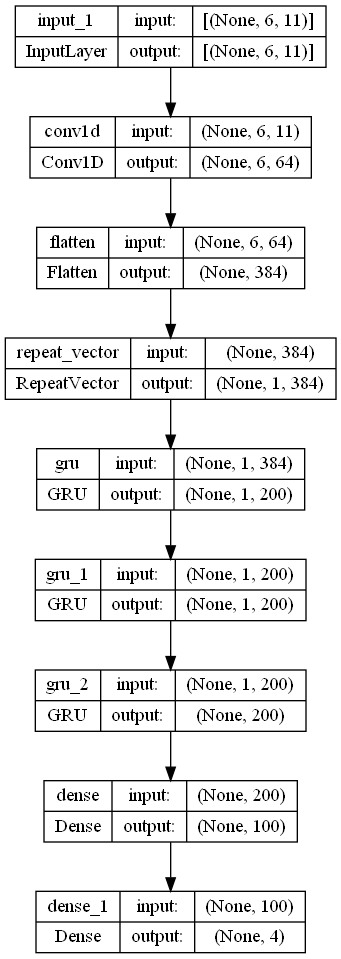

In [ ]:
plot_model(model=model_enc_dec_cnn, show_shapes=True)

In [ ]:
epochs = 100
batch_size = xtrain.shape[0] // 1000
validation = 0.2

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=False, monitor='val_loss',
                                         mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')
rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=3, min_lr=1e-10)

In [ ]:
## 학습

history = model_enc_dec_cnn.fit(xtrain, ytrain, verbose=1, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])


Epoch 1/100
802/802 [==============================] - 18s 19ms/step - loss: 23.3417 - nse: 0.5572 - val_loss: 9.7662 - val_nse: 0.7748 - lr: 0.0100
Epoch 2/100
802/802 [==============================] - 15s 18ms/step - loss: 7.2500 - nse: 0.9802 - val_loss: 8.2261 - val_nse: 0.8110 - lr: 0.0100
Epoch 3/100
802/802 [==============================] - 15s 18ms/step - loss: 8.2881 - nse: 0.9737 - val_loss: 9.1707 - val_nse: 0.7785 - lr: 0.0100
Epoch 4/100
802/802 [==============================] - 15s 19ms/step - loss: 4.9207 - nse: 0.9909 - val_loss: 7.8153 - val_nse: 0.8340 - lr: 0.0100
Epoch 5/100
802/802 [==============================] - 15s 19ms/step - loss: 4.8079 - nse: 0.9912 - val_loss: 7.0220 - val_nse: 0.8591 - lr: 0.0100
Epoch 6/100
802/802 [==============================] - 14s 18ms/step - loss: 5.3303 - nse: 0.9896 - val_loss: 9.0104 - val_nse: 0.7907 - lr: 0.0100
Epoch 7/100
802/802 [==============================] - 14s 18ms/step - loss: 3.6671 - nse: 0.9950 - val_loss: 5

In [ ]:
## 평가
    
ytest_ = ytest
ytest = np.array(ytest).T

keras_model_best = keras.models.load_model('best_model.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error, 'nse': nse})

yhat = keras_model_best.predict(xtest, verbose=1)

216/216 [==============================] - 1s 2ms/step


In [ ]:
keras_model_best.evaluate(xtest,ytest_)

216/216 [==============================] - 1s 2ms/step - loss: 1.2210 - nse: 0.9886


[1.2210097312927246, 0.9885666370391846]

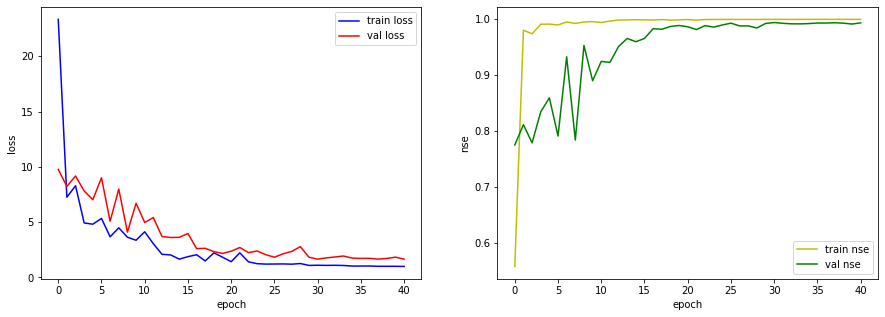

In [ ]:
## 학습 과정 시각화

fig, loss_ax = plt.subplots(1, 2)
fig.set_size_inches((15,5))

loss_ax[0].plot(history.history['loss'], 'b', label='train loss')
loss_ax[0].plot(history.history['val_loss'], 'r', label='val loss')

loss_ax[1].plot(history.history['nse'], 'y', label='train nse')
loss_ax[1].plot(history.history['val_nse'], 'g', label='val nse')

loss_ax[0].set_xlabel('epoch')
loss_ax[0].set_ylabel('loss')
loss_ax[1].set_xlabel('epoch')
loss_ax[1].set_ylabel('nse')

loss_ax[0].legend(loc='upper right')
loss_ax[1].legend(loc='lower right')

plt.show()

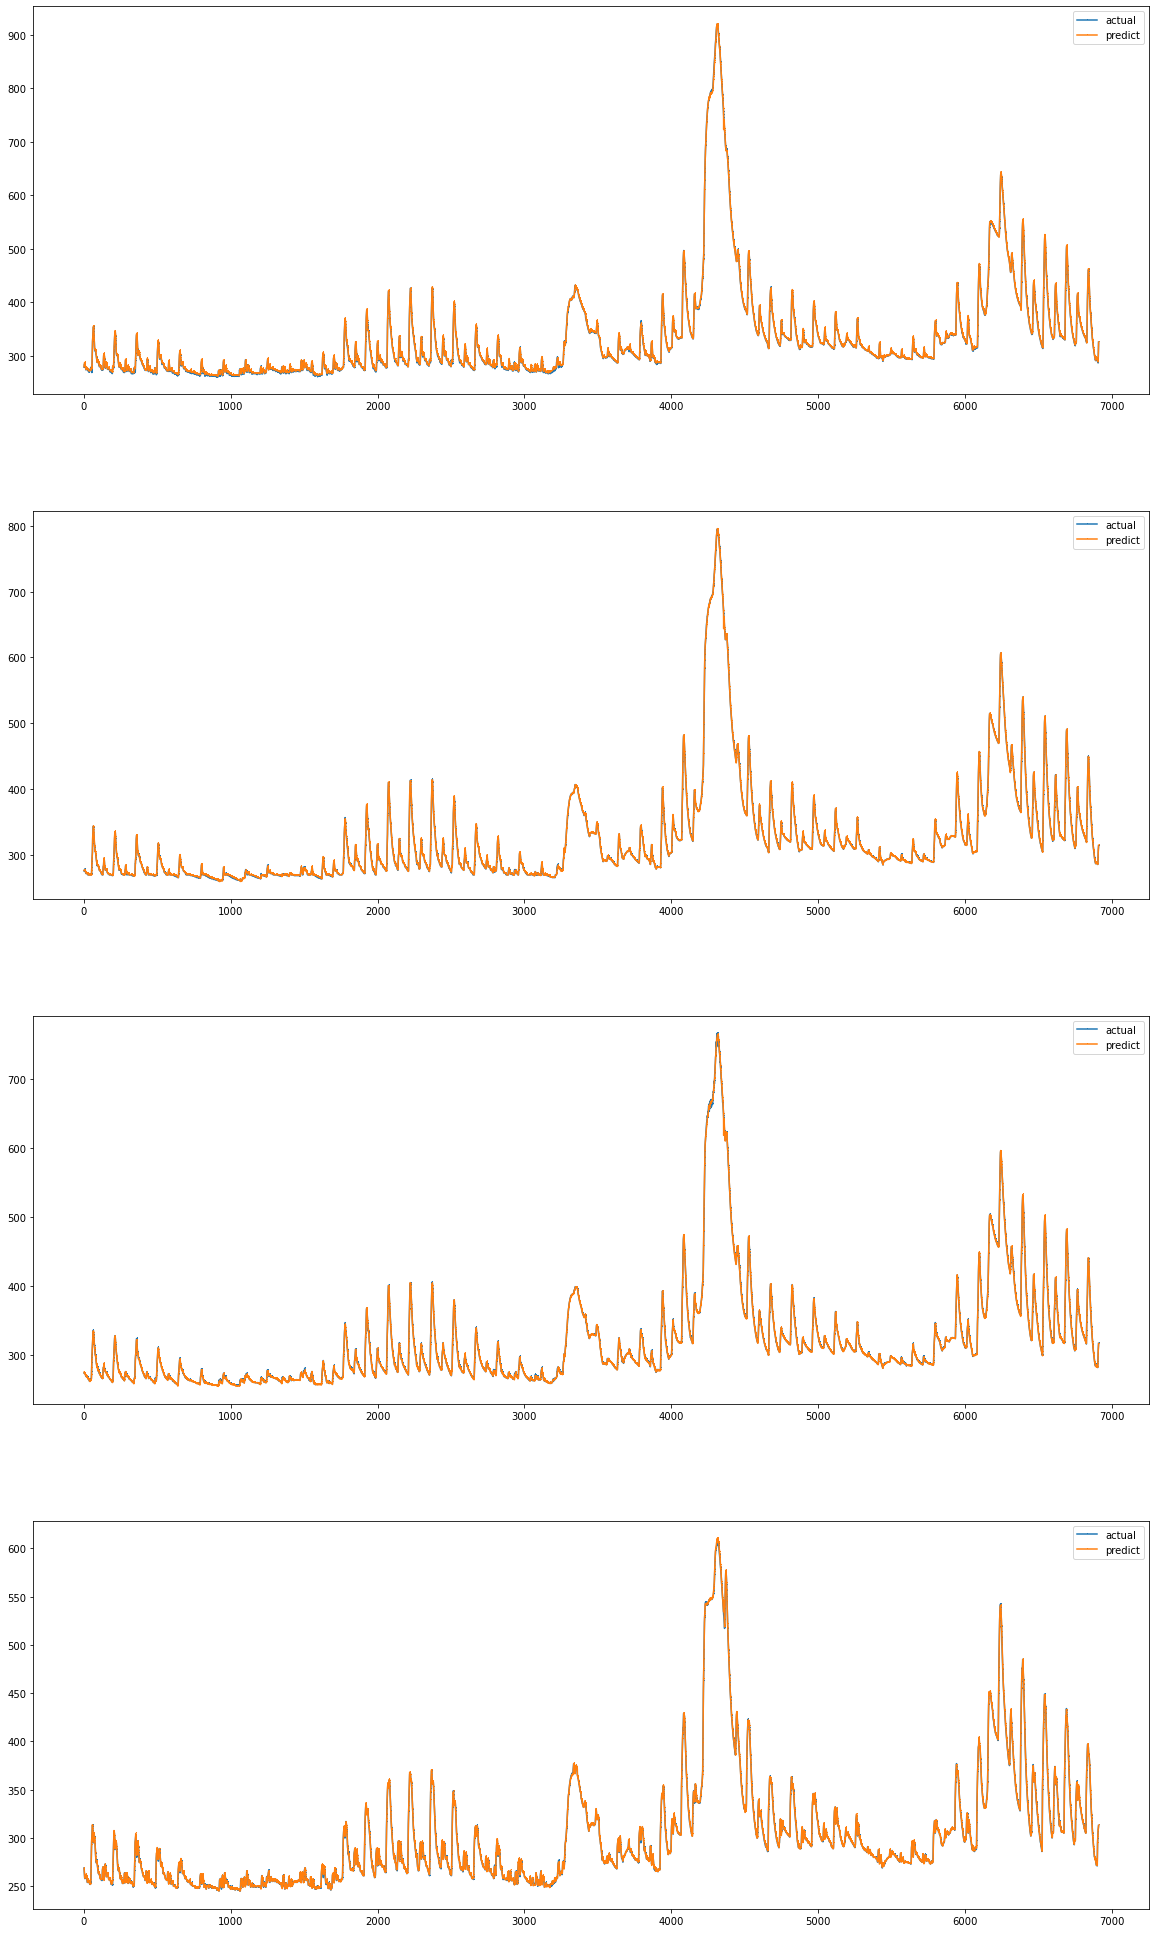

In [ ]:
## 결과 시각화

tl_predict = np.array(yhat).T

f, axes = plt.subplots(4, 1)
f.set_size_inches((20, 35))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(4):
    axes[i].plot(ytest[i], marker = ",", label = "actual")
    axes[i].plot(tl_predict[i], marker = ",", label="predict")
    axes[i].legend(prop={'size':10})  

plt.show()

In [ ]:
## 점수 확인

score = []
for i in range(4):
    print(root_mean_squared_error(ytest[i], tl_predict[i])  / r2_score(ytest[i], tl_predict[i]))
    score.append(root_mean_squared_error(ytest[i], tl_predict[i]) / r2_score(ytest[i], tl_predict[i]))
    
print("최종점수: ", np.mean(score))

tf.Tensor(1.7684402095636687, shape=(), dtype=float64)
tf.Tensor(1.0054791624980481, shape=(), dtype=float64)
tf.Tensor(1.2058495134136682, shape=(), dtype=float64)
tf.Tensor(1.2363032343195306, shape=(), dtype=float64)
최종점수:  1.304018029948729


In [ ]:
## 파일 제출

sample_submission = pd.read_csv("data/sample_submission.csv")

sample_submission["wl_1018662"] = tl_predict[0]
sample_submission["wl_1018680"] = tl_predict[1]
sample_submission["wl_1018683"] = tl_predict[2]
sample_submission["wl_1019630"] = tl_predict[3]

sample_submission.to_csv("data/모델1.csv", index = False)

# 모델2

In [ ]:
## train / test data 생성

xdata = []
ydata = []
xdata_idx = []
ydata_idx = [-4,-3,-2,-1]
for i in range(len(input_regular.columns)-4):
    xdata_idx.append(i)

w =  6 #window size

idx = []
for i in range(12):
  idx.append(i*26496)

for i in tqdm(range(11)):
    if i != 10:
        tmp = input_regular[idx[i]:idx[i+1]]
    else:
        tmp = input_regular[idx[i]:]

    for j in range(len(tmp)-w):
        xdata.append(np.array(tmp.iloc[j:j + w, xdata_idx]).astype(float))

    for j in range(w,len(tmp)):
        ydata.append(np.array(tmp.iloc[j, ydata_idx]).astype(float))

xdata_ = np.array(xdata)
ydata_ = np.array(ydata)

xtrain = xdata_[:-6912]
ytrain = ydata_[:-6912]
xtest = xdata_[-6912:]
ytest = ydata_[-6912:]

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:18<00:00,  7.12s/it]


(269358, 6, 11)
(269358, 4)
(6912, 6, 11)
(6912, 4)


In [ ]:
## 모델 정의

def nse(y_true, y_pred):
    return (1-(K.sum((y_true-y_pred)**2)/K.sum((y_true-K.mean(y_true))**2)))

def root_mean_squared_error(y_true, y_pred):
    return (K.sqrt(K.mean(K.square(y_pred - y_true))))

if 'model_enc_dec_cnn' in locals(): 
    del model_enc_dec_cnn 
if 'history' in locals():
    del history

optimizer = tf.keras.optimizers.Adam(lr=0.01) #기본값 0.001

model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(InputLayer(input_shape=(w, xtrain.shape[2])))
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(BatchNormalization())
#model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=2, padding = 'causal', activation='relu'))
#model_enc_dec_cnn.add(MaxPooling1D(pool_size=2))
model_enc_dec_cnn.add(Flatten())

model_enc_dec_cnn.add(RepeatVector(1))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
#model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(LSTM(200, activation='relu'))

model_enc_dec_cnn.add(Dense(100, activation='relu'))
model_enc_dec_cnn.add(Dense(4))

model_enc_dec_cnn.compile(loss=root_mean_squared_error, optimizer=optimizer, metrics =[nse])

model_enc_dec_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             1472      
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 384)           0         
 or)                                                             
                                                                 
 lstm (LSTM)                 (None, 1, 200)            468000    
                                                                 
 lstm_1 (LSTM)               (None, 1, 200)            320800    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                      

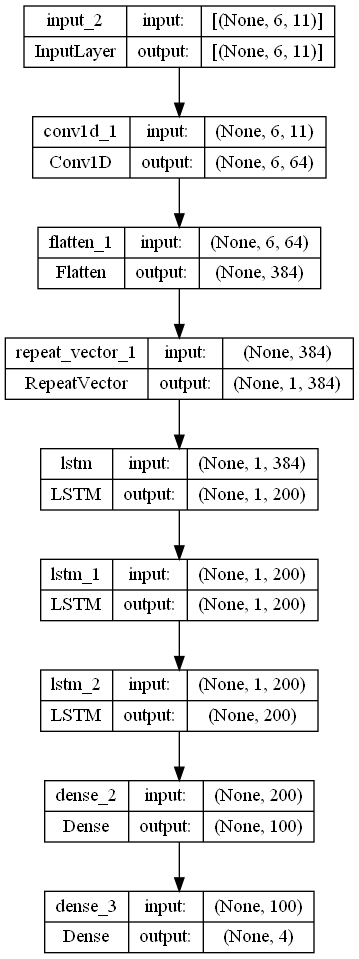

In [ ]:
plot_model(model=model_enc_dec_cnn, show_shapes=True)

In [ ]:
epochs = 100
batch_size = xtrain.shape[0] // 1000
validation = 0.2

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=False, monitor='val_loss',
                                         mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')
rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=3, min_lr=1e-10)

In [ ]:
## 학습

history = model_enc_dec_cnn.fit(xtrain, ytrain, verbose=1, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])


Epoch 1/100
802/802 [==============================] - 24s 26ms/step - loss: 24.3241 - nse: 0.3363 - val_loss: 12.1885 - val_nse: 0.6395 - lr: 0.0100
Epoch 2/100
802/802 [==============================] - 19s 23ms/step - loss: 14.7090 - nse: 0.9045 - val_loss: 11.1940 - val_nse: 0.6689 - lr: 0.0100
Epoch 3/100
802/802 [==============================] - 20s 24ms/step - loss: 8.8663 - nse: 0.9694 - val_loss: 10.5129 - val_nse: 0.6973 - lr: 0.0100
Epoch 4/100
802/802 [==============================] - 20s 25ms/step - loss: 6.7025 - nse: 0.9806 - val_loss: 9.4850 - val_nse: 0.7480 - lr: 0.0100
Epoch 5/100
802/802 [==============================] - 20s 25ms/step - loss: 6.4595 - nse: 0.9845 - val_loss: 7.0046 - val_nse: 0.8609 - lr: 0.0100
Epoch 6/100
802/802 [==============================] - 19s 24ms/step - loss: 6.6026 - nse: 0.9835 - val_loss: 8.2293 - val_nse: 0.8048 - lr: 0.0100
Epoch 7/100
802/802 [==============================] - 19s 24ms/step - loss: 3.9033 - nse: 0.9945 - val_los

In [ ]:
## 평가
    
ytest_ = ytest
ytest = np.array(ytest).T

keras_model_best = keras.models.load_model('best_model.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error, 'nse': nse})

yhat = keras_model_best.predict(xtest, verbose=1)

216/216 [==============================] - 1s 2ms/step


In [ ]:
keras_model_best.evaluate(xtest,ytest_)

216/216 [==============================] - 1s 2ms/step - loss: 1.1724 - nse: 0.9905


[1.1723712682724, 0.9904720783233643]

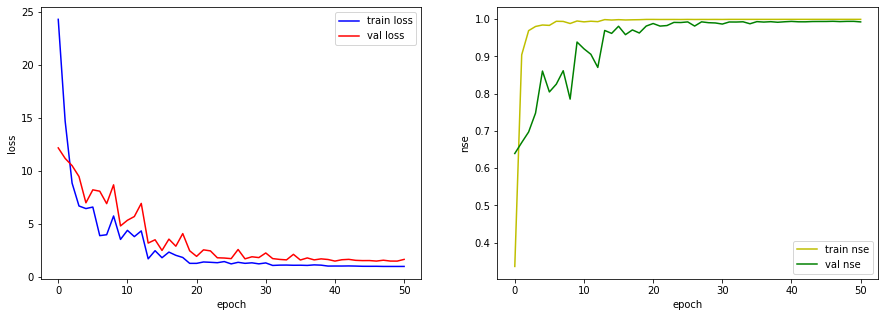

In [ ]:
## 학습 과정 시각화

fig, loss_ax = plt.subplots(1, 2)
fig.set_size_inches((15,5))

loss_ax[0].plot(history.history['loss'], 'b', label='train loss')
loss_ax[0].plot(history.history['val_loss'], 'r', label='val loss')

loss_ax[1].plot(history.history['nse'], 'y', label='train nse')
loss_ax[1].plot(history.history['val_nse'], 'g', label='val nse')

loss_ax[0].set_xlabel('epoch')
loss_ax[0].set_ylabel('loss')
loss_ax[1].set_xlabel('epoch')
loss_ax[1].set_ylabel('nse')

loss_ax[0].legend(loc='upper right')
loss_ax[1].legend(loc='lower right')

plt.show()

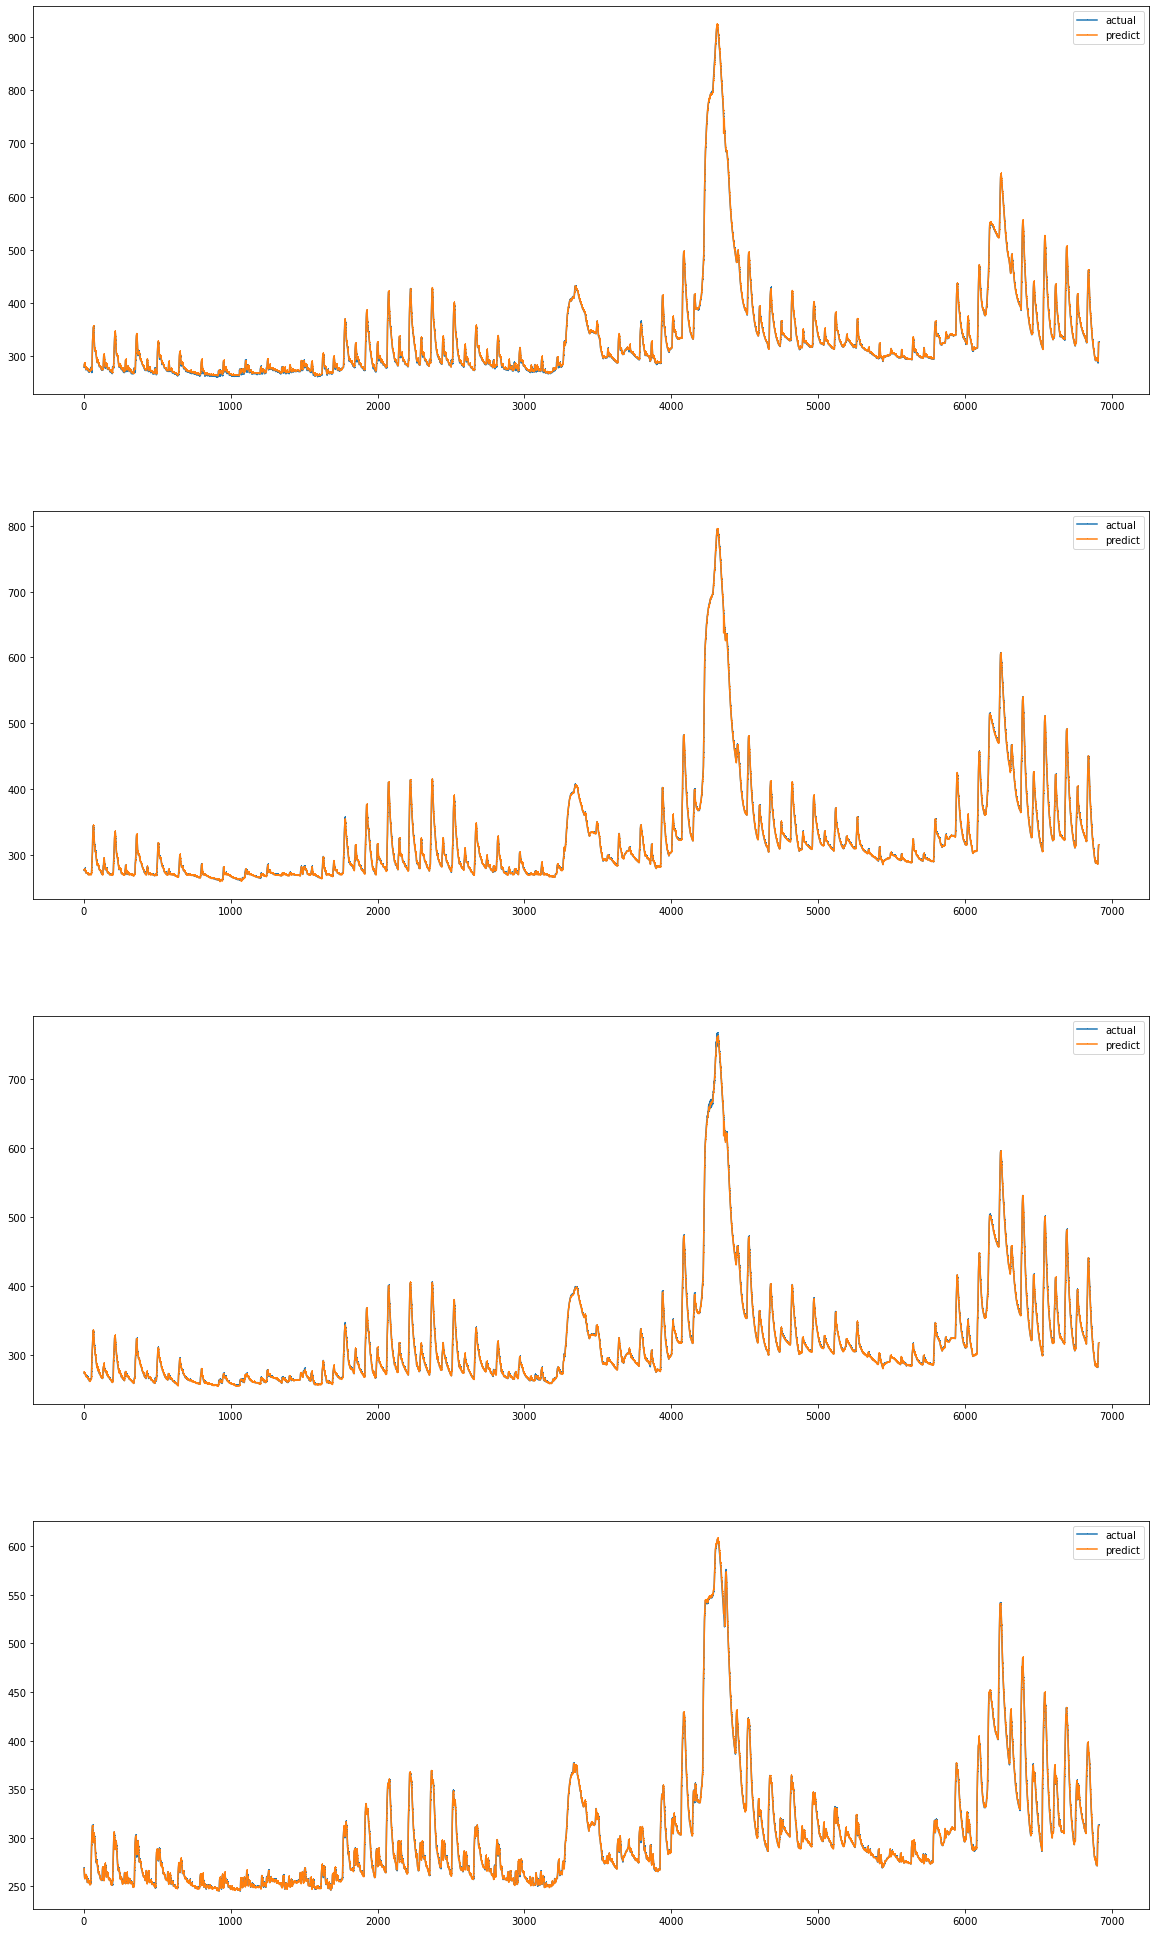

In [ ]:
## 결과 시각화

tl_predict = np.array(yhat).T

f, axes = plt.subplots(4, 1)
f.set_size_inches((20, 35))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(4):
    axes[i].plot(ytest[i], marker = ",", label = "actual")
    axes[i].plot(tl_predict[i], marker = ",", label="predict")
    axes[i].legend(prop={'size':10})  

plt.show()

In [ ]:
## 점수 확인

score = []
for i in range(4):
    print(root_mean_squared_error(ytest[i], tl_predict[i])  / r2_score(ytest[i], tl_predict[i]))
    score.append(root_mean_squared_error(ytest[i], tl_predict[i]) / r2_score(ytest[i], tl_predict[i]))
    
print("최종점수: ", np.mean(score))

tf.Tensor(1.5905593977630144, shape=(), dtype=float64)
tf.Tensor(0.9854278682585434, shape=(), dtype=float64)
tf.Tensor(1.2958850451346133, shape=(), dtype=float64)
tf.Tensor(1.2778261233975063, shape=(), dtype=float64)
최종점수:  1.2874246086384193


In [ ]:
## 파일 제출

sample_submission = pd.read_csv("data/sample_submission.csv")

sample_submission["wl_1018662"] = tl_predict[0]
sample_submission["wl_1018680"] = tl_predict[1]
sample_submission["wl_1018683"] = tl_predict[2]
sample_submission["wl_1019630"] = tl_predict[3]

sample_submission.to_csv("data/모델2.csv", index = False)

# 제출 파일 만들기

In [ ]:
모델1 = pd.read_csv('data/모델1.csv', usecols=[0,2])
모델2 = pd.read_csv('data/모델2.csv', usecols=[1,3,4])

wl_1018662 = pd.read_csv('data/모델2.csv', usecols=[0,1])
wl_1018680 = pd.read_csv('data/모델1.csv', usecols=[2])
wl_1018683 = pd.read_csv('data/모델2.csv', usecols=[3])
wl_1019630 = pd.read_csv('data/모델2.csv', usecols=[4])

result = pd.concat([wl_1018662, wl_1018680, wl_1018683, wl_1019630], axis = 1)
result

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,280.55786,276.53827,275.58917,268.30682
1,2022-06-01 00:10,282.05100,276.31650,273.84430,266.33470
2,2022-06-01 00:20,283.97153,276.87990,273.19974,264.23346
3,2022-06-01 00:30,286.19492,277.48935,273.21063,260.99716
4,2022-06-01 00:40,286.46725,277.62357,273.92026,258.62122
...,...,...,...,...,...
6907,2022-07-18 23:10,289.90054,294.48773,296.45300,305.88620
6908,2022-07-18 23:20,290.14178,302.22885,303.07623,307.69520
6909,2022-07-18 23:30,300.38528,307.63696,306.59750,309.26498
6910,2022-07-18 23:40,311.64706,311.75327,311.11392,312.09488


In [ ]:
result.to_csv('data/최종제출파일.csv', index = False)